<font color="red" size="6"> In this notebook i offer proof to demonstrate that this dataset is corrupt and it's use should be avoided.</font>

<font color="blue" size="6"> Information given by the creator/owner of the dataset..</font>

**English:**

The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).

The first column shows time and date range (from march of 2017 until September of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base or more.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab.
Target is to predict the last column, which is the % of silica in the iron ore concentrate.

<font color="blue" size="6">Objectives & Value</font>

• Building a supervised learning/timeseries model to predict the percentage of silica present in the concentrate after the flotation process. This would allow metallurgical or process engineers to take corrective/preventive measures early on, instead of waiting for laboratory results to know the exact % of silica present in the concentrate. A machine learning model could provide a good approximation of this value quickly, which would help increase the business value and reduce penalties in the selling price due to the presence of silica impurities in the concentrate.

• Identifying the most relevant variables that influence obtaining a concentrate with a higher or lower percentage of silica impurities. This way, the engineers involved in the process will have greater clarity about which explanatory variables should intervene in the flotation process to modify the result of the percentage of silica present in the concentrate. This would affect, as mentioned above, the business value.



<font color="blue" size="6">Original Variables Information</font>

• **Date**: Measurement date. (2017-03-10 1:00:00 to 2017-09-09 23:00:00) (DateTime64ns)

• **% Iron Feed**: Percentage of iron in the slurry being fed to the flotation cells (0-100%). (Min 42.74%, max 65.78%) (Float64)

• **% Silica Feed**: Percentage of silica in the slurry being fed to the flotation cells. (0-100%). (Min 1.31%, max 33.4%) (Float64)

• **Starch Flow**: Flow rate of starch (reactive) measured in m3/h. (min 0.002026 m3/h, max 6300.23 m3/h) (Float64)

• **Amine Flow**: Flow rate of amine (reactive) measured in m3/h. (min 241.669 m3/h, max 739.538 m3/h) (Float64)

• **Ore Pulp Flow**: Feed flow rate of pulp measured in t/h. (min 376.249 t/h, max 418.641 m3/h) (Float64)

• **Ore Pulp pH**: pH of the pulp, scale from 0 to 14. (min 8.7533 ph, max 10.808ph) (Float64)

• **Ore Pulp Density**: Density of the pulp measured in kg/cm³. (min 1.519 kg/cm3, max 1.853 kg/cm3) (Float64)

• **Flotation Column Air Flow (1)**: Air flow rate entering flotation cell 1, measured in Nm³/h. (min 175.510 Nm3/h, max 373.871 Nm3/h) (Float64)

• **Flotation Column Air Flow (2)**: Air flow rate entering flotation cell 2, measured in Nm³/h. (min 175.156 Nm3/h, max 375.992 Nm3/h) (Float64)

• **Flotation Column Air Flow (3)**: Air flow rate entering flotation cell 3, measured in Nm³/h. (min 176.469 Nm3/h, max 364.346 Nm3/h) (Float64)

• **Flotation Column Air Flow (4)**: Air flow rate entering flotation cell 4, measured in Nm³/h. (min 292.195 Nm3/h, max 305.871 Nm3/h) (Float64)

• **Flotation Column Air Flow (5)**: Air flow rate entering flotation cell 5, measured in Nm³/h. (min 286.295 Nm3/h, max 310.27 Nm3/h) (Float64)

• **Flotation Column Air Flow (6)**: Air flow rate entering flotation cell 6, measured in Nm³/h. (min 189.928 Nm3/h, max 370.91 Nm3/h) (Float64)

• **Flotation Column Air Flow (7)**: Air flow rate entering flotation cell 7, measured in Nm³/h. (min 185.962 Nm3/h, max 371.593 Nm3/h) (Float64)

• **Flotation Column Level (1)**: Height of the bubble layer at the top of flotation cell 1, measured in mm. (min 149.2 mm, max 862.2 mm) (Float64)

• **Flotation Column Level (2)**: Height of the bubble layer at the top of flotation cell 2, measured in mm. (min 210.7 mm, max 828.9 mm) (Float64)

• **Flotation Column Level (3)**: Height of the bubble layer at the top of flotation cell 3, measured in mm. (min 126.2 mm, max 886.8 mm) (Float64)

• **Flotation Column Level (4)**: Height of the bubble layer at the top of flotation cell 4, measured in mm. (min 162.2 mm, max 680.3 mm) (Float64)

• **Flotation Column Level (5)**: Height of the bubble layer at the top of flotation cell 5, measured in mm. (min 166.9 mm, max 675.6 mm) (Float64)

• **Flotation Column Level (6)**: Height of the bubble layer at the top of flotation cell 6, measured in mm. (min 155.8 mm, max 698.8 mm) (Float64)

• **Flotation Column Level (7)**: Height of the bubble layer at the top of flotation cell 7, measured in mm. (min 175.3 mm, max 659.9 mm) (Float64)




**<font color="red">Target Variables</font>:**

• **% Iron Concentrate:** Percentage of iron in the concentrate at the end of the flotation process (%), obtained through subsequent laboratory analysis. (min 62.05%, max 68.01%) (Float64)

• **% Silica Concentrate:** Percentage of silica in the concentrate at the end of the flotation process (%), obtained through subsequent laboratory analysis. (min 0.6%, max 5.63%) (Float64) (<font color="red">**THIS IS THE TARGET VAR OF THIS NOTEBOOK**</font>)


<font color="blue" size="6">IMPORTS</font>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

#from sklearnex import patch_sklearn # no funciona bien con TSNE
#patch_sklearn()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

import shap
import tensorflow as tf

import optuna
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import KFold
from optuna.samplers import TPESampler
from lightgbm import LGBMRegressor
import lightgbm

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.special import inv_boxcox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
pd.options.display.max_columns = None

sns.set_style("darkgrid")
sns.set(font_scale=1.1)

# Loading data, cleaning, preprocessing, feature engineering, and some EDA when applicable.

**Loading the dataset as a Pandas DataFrame and setting the date/time column as the index with the correct data type.**

In [5]:
df = pd.read_csv("../../../../courses&datasets/kaggle_datasets/MiningProcess/MiningProcess_Flotation_Plant_Database.csv",
                 decimal=",",parse_dates=["date"], index_col="date")

**Use a function to reduce memory usage of the dataframe by modifying the datatypes.**

In [6]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                       df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
df = reduce_mem_usage(df)

Mem. usage decreased to 70.33 Mb (47.9% reduction)


In [8]:
df.tail()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-09-09 23:00:00        49.75      23.200001  2710.939941  441.052002   
2017-09-09 23:00:00        49.75      23.200001  2692.010010  473.436005   
2017-09-09 23:00:00        49.75      23.200001  2692.199951  500.488007   
2017-09-09 23:00:00        49.75      23.200001  1164.119995  491.548004   
2017-09-09 23:00:00        49.75      23.200001  1164.119995  468.019012   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-09-09 23:00:00     386.570007      9.62129           1.65365   
2017-09-09 23:00:00     384.938995      9.62063           1.65352   
2017-09-09 23:00:00     383.496002      9.61874           1.65338   
2017-09-09 23:00:00     384.976013      9.61686           1.65324   
2017-09-09 23:00:00     384.800995      9.61497           1.65310   

                     Flotation Column 01 Air Flow  \
date                                                
2017-09-09 23:00:00                    302.343994   
2017-09-09 23:00:00                    303.013000   
2017-09-09 23:00:00                    303.661987   
2017-09-09 23:00:00                    302.549988   
2017-09-09 23:00:00                    300.355011   

                     Flotation Column 02 Air Flow  \
date                                                
2017-09-09 23:00:00                    298.786011   
2017-09-09 23:00:00                    301.878998   
2017-09-09 23:00:00                    307.397003   
2017-09-09 23:00:00                    301.959015   
2017-09-09 23:00:00                    292.864990   

                     Flotation Column 03 Air Flow  \
date                                                
2017-09-09 23:00:00                    299.162994   
2017-09-09 23:00:00                    299.487000   
2017-09-09 23:00:00                    299.487000   
2017-09-09 23:00:00                    298.045013   
2017-09-09 23:00:00                    298.625000   

                     Flotation Column 04 Air Flow  \
date                                                
2017-09-09 23:00:00                    299.920013   
2017-09-09 23:00:00                    299.709991   
2017-09-09 23:00:00                    299.927002   
2017-09-09 23:00:00                    299.372009   
2017-09-09 23:00:00                    298.717010   

                     Flotation Column 05 Air Flow  \
date                                                
2017-09-09 23:00:00                    299.622986   
2017-09-09 23:00:00                    300.464996   
2017-09-09 23:00:00                    299.707001   
2017-09-09 23:00:00                    298.819000   
2017-09-09 23:00:00                    297.394989   

                     Flotation Column 06 Air Flow  \
date                                                
2017-09-09 23:00:00                    346.794006   
2017-09-09 23:00:00                    330.023010   
2017-09-09 23:00:00                    329.589996   
2017-09-09 23:00:00                    351.453003   
2017-09-09 23:00:00                    362.463989   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date                                                                           
2017-09-09 23:00:00                    313.695007                 392.160004   
2017-09-09 23:00:00                    236.699997                 401.505005   
2017-09-09 23:00:00                    225.878998                 408.898987   
2017-09-09 23:00:00                    308.114990                 405.106995   
2017-09-09 23:00:00                    308.114990                 413.753998   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date                                                                        
2017-09-09 23:00:00                 430.701996           

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float32
 1   % Silica Feed                 737453 non-null  float32
 2   Starch Flow                   737453 non-null  float32
 3   Amina Flow                    737453 non-null  float32
 4   Ore Pulp Flow                 737453 non-null  float32
 5   Ore Pulp pH                   737453 non-null  float32
 6   Ore Pulp Density              737453 non-null  float32
 7   Flotation Column 01 Air Flow  737453 non-null  float32
 8   Flotation Column 02 Air Flow  737453 non-null  float32
 9   Flotation Column 03 Air Flow  737453 non-null  float32
 10  Flotation Column 04 Air Flow  737453 non-null  float32
 11  Flotation Column 05 Air Flow  737453 non-null  float32
 12  Flotation 

**There are 1171 duplicates observed.** (I will see what to do with this later)

In [10]:
df.duplicated().sum()

1171

**No missing/NaN data is observed for any of the columns.**

In [11]:
total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
% Iron Feed                       0      0.0
% Silica Feed                     0      0.0
Starch Flow                       0      0.0
Amina Flow                        0      0.0
Ore Pulp Flow                     0      0.0
Ore Pulp pH                       0      0.0
Ore Pulp Density                  0      0.0
Flotation Column 01 Air Flow      0      0.0
Flotation Column 02 Air Flow      0      0.0
Flotation Column 03 Air Flow      0      0.0
Flotation Column 04 Air Flow      0      0.0
Flotation Column 05 Air Flow      0      0.0
Flotation Column 06 Air Flow      0      0.0
Flotation Column 07 Air Flow      0      0.0
Flotation Column 01 Level         0      0.0
Flotation Column 02 Level         0      0.0
Flotation Column 03 Level         0      0.0
Flotation Column 04 Level         0      0.0
Flotation Column 05 Level         0      0.0
Flotation Column 06 Level         0      0.0
Flotation Column 07 Level         0      0.0
% Iron Concentrate                0      0.0
% Silica Concentrate              0      0.0

**Although the previous table shows no missing/NaN values, it is also vital to analyze the time factor and ensure that there is <font color="red">temporal continuity</font> in the data, especially if one intends to create a time series model.**

**By looking at the output below, we can verify that there is a temporal inconsistency; there are missing hours in the dataset between 2017-03-16 06:00:00 and 2017-03-29 11:00:00. It is possible that the plant may have undergone maintenance during these dates.**

In [12]:
all_hours = pd.Series(data=pd.date_range(start=df.index.min(), end=df.index.max(), freq='H'))
mask = all_hours.isin(df.index.values)
all_hours[~mask]

149   2017-03-16 06:00:00
150   2017-03-16 07:00:00
151   2017-03-16 08:00:00
152   2017-03-16 09:00:00
153   2017-03-16 10:00:00
              ...        
462   2017-03-29 07:00:00
463   2017-03-29 08:00:00
464   2017-03-29 09:00:00
465   2017-03-29 10:00:00
466   2017-03-29 11:00:00
Length: 318, dtype: datetime64[ns]

**We clean the dataset by removing dates before "2017-03-29 12:00:00", as from this date onwards the dataset does not present inconsistencies in hourly frequency.**

In [13]:
df = df.loc["2017-03-29 12:00:00":]

In [14]:
df.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-29 12:00:00        60.18           9.34  2044.989990  349.911011   
2017-03-29 12:00:00        60.18           9.34  2020.550049  353.063995   
2017-03-29 12:00:00        60.18           9.34  2012.839966  356.217010   
2017-03-29 12:00:00        60.18           9.34  2007.670044  359.371002   
2017-03-29 12:00:00        60.18           9.34  2003.920044  362.523987   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-29 12:00:00     405.625000      9.74604          1.649650   
2017-03-29 12:00:00     404.402008      9.74169          1.643469   
2017-03-29 12:00:00     403.179993      9.73733          1.637289   
2017-03-29 12:00:00     401.957001      9.73298          1.631108   
2017-03-29 12:00:00     400.734985      9.72862          1.624928   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-29 12:00:00                    200.393005   
2017-03-29 12:00:00                    200.130997   
2017-03-29 12:00:00                    199.869003   
2017-03-29 12:00:00                    199.606995   
2017-03-29 12:00:00                    199.345001   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-29 12:00:00                    195.733994   
2017-03-29 12:00:00                    196.475998   
2017-03-29 12:00:00                    197.218994   
2017-03-29 12:00:00                    197.960999   
2017-03-29 12:00:00                    198.703003   

                     Flotation Column 03 Air Flow  \
date                                                
2017-03-29 12:00:00                    201.826004   
2017-03-29 12:00:00                    200.908997   
2017-03-29 12:00:00                    199.992004   
2017-03-29 12:00:00                    199.074997   
2017-03-29 12:00:00                    198.158005   

                     Flotation Column 04 Air Flow  \
date                                                
2017-03-29 12:00:00                    295.096008   
2017-03-29 12:00:00                    295.096008   
2017-03-29 12:00:00                    295.096008   
2017-03-29 12:00:00                    295.096008   
2017-03-29 12:00:00                    295.096008   

                     Flotation Column 05 Air Flow  \
date                                                
2017-03-29 12:00:00                    306.399994   
2017-03-29 12:00:00                    306.399994   
2017-03-29 12:00:00                    306.399994   
2017-03-29 12:00:00                    306.399994   
2017-03-29 12:00:00                    306.399994   

                     Flotation Column 06 Air Flow  \
date                                                
2017-03-29 12:00:00                    250.600998   
2017-03-29 12:00:00                    250.207993   
2017-03-29 12:00:00                    249.815002   
2017-03-29 12:00:00                    249.421997   
2017-03-29 12:00:00                    249.029007   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date                                                                           
2017-03-29 12:00:00                    251.001999                 555.264465   
2017-03-29 12:00:00                    250.828003                 557.839905   
2017-03-29 12:00:00                    250.653000                 560.415405   
2017-03-29 12:00:00                    250.477997                 562.990845   
2017-03-29 12:00:00                    250.304001                 565.566345   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date                                                                        
2017-03-29 12:00:00                 552.255554           

**We observe that not much data was lost percentage-wise, considering that the original number of rows was 737,453.**

In [15]:
print(f"the dataset after cleaning has {round(df.shape[0]/737453 * 100,2)}% of the rows") , df.shape

the dataset after cleaning has 96.36% of the rows


(None, (710639, 23))

**The measurement frequency of most rows in the dataset is every 20 seconds according to what the publisher/author of the dataset mentions. This would imply that there should be 180 measurements in each hour if this information is correct.**

In [16]:
segundos_en_1_minuto = 60
minutos_en_1_hora = 60
intervalo_de_medicion_df = 20  # segundos

segundos_en_1_minuto * minutos_en_1_hora / intervalo_de_medicion_df

180.0

In [17]:
df.groupby(df.index).count()["% Silica Concentrate"].value_counts()

180    3947
179       1
Name: % Silica Concentrate, dtype: int64

**It is observed that there is simply one measurement missing at the timestamp ['2017-04-10'].**

In [18]:
df.groupby(df.index).count()["% Silica Concentrate"][df.groupby(df.index).count()["% Silica Concentrate"] < 180]

date
2017-04-10    179
Name: % Silica Concentrate, dtype: int64

**We observe that the missing value occurs at 00:00:00 hour on ['2017-04-10']**

In [19]:
df.loc['2017-04-10'].groupby(df.loc['2017-04-10'].index).count().head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-04-10 00:00:00          179            179          179         179   
2017-04-10 01:00:00          180            180          180         180   
2017-04-10 02:00:00          180            180          180         180   
2017-04-10 03:00:00          180            180          180         180   
2017-04-10 04:00:00          180            180          180         180   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-04-10 00:00:00            179          179               179   
2017-04-10 01:00:00            180          180               180   
2017-04-10 02:00:00            180          180               180   
2017-04-10 03:00:00            180          180               180   
2017-04-10 04:00:00            180          180               180   

                     Flotation Column 01 Air Flow  \
date                                                
2017-04-10 00:00:00                           179   
2017-04-10 01:00:00                           180   
2017-04-10 02:00:00                           180   
2017-04-10 03:00:00                           180   
2017-04-10 04:00:00                           180   

                     Flotation Column 02 Air Flow  \
date                                                
2017-04-10 00:00:00                           179   
2017-04-10 01:00:00                           180   
2017-04-10 02:00:00                           180   
2017-04-10 03:00:00                           180   
2017-04-10 04:00:00                           180   

                     Flotation Column 03 Air Flow  \
date                                                
2017-04-10 00:00:00                           179   
2017-04-10 01:00:00                           180   
2017-04-10 02:00:00                           180   
2017-04-10 03:00:00                           180   
2017-04-10 04:00:00                           180   

                     Flotation Column 04 Air Flow  \
date                                                
2017-04-10 00:00:00                           179   
2017-04-10 01:00:00                           180   
2017-04-10 02:00:00                           180   
2017-04-10 03:00:00                           180   
2017-04-10 04:00:00                           180   

                     Flotation Column 05 Air Flow  \
date                                                
2017-04-10 00:00:00                           179   
2017-04-10 01:00:00                           180   
2017-04-10 02:00:00                           180   
2017-04-10 03:00:00                           180   
2017-04-10 04:00:00                           180   

                     Flotation Column 06 Air Flow  \
date                                                
2017-04-10 00:00:00                           179   
2017-04-10 01:00:00                           180   
2017-04-10 02:00:00                           180   
2017-04-10 03:00:00                           180   
2017-04-10 04:00:00                           180   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date                                                                           
2017-04-10 00:00:00                           179                        179   
2017-04-10 01:00:00                           180                        180   
2017-04-10 02:00:00                           180                        180   
2017-04-10 03:00:00                           180                        180   
2017-04-10 04:00:00                           180                        180   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date                                                                        
2017-04-10 00:00:00                        179           

To solve the problem of having 179 measurements instead of 180 measurements for the hour 00:00:00 of '2017-04-10', I will duplicate the last value of the hour 00:00:00. I did this based on my own criteria since many time series problems have an autocorrelated behavior factor, and I thought it was more appropriate than creating a row with the mean/median values of the hour&date in question.

Also, within this code cell, I solve the problem that the date column does not contain seconds, I solve this with some feature engineering. <font color="red">(Later on, it is appreciated that part of what I did in this cell was unnecessary since I performed an hourly frequency resampling of the data later on)</font>

In [20]:
df_cut = df.copy()
df_before = df.copy().loc[:'2017-04-10 00:00:00']
df_after = df.copy().loc['2017-04-10 01:00:00':]
new_date = pd.to_datetime('2017-04-10 00:00:00')
new_data = pd.DataFrame(df_before[-1:].values, index=[new_date], columns=df_before.columns)
df_before = pd.concat([df_before,new_data],axis=0)

df = pd.concat([df_before, df_after])
df.reset_index(allow_duplicates=True, inplace=True)

df["duration"] = 20
df.loc[0,"duration"] = 0
df.duration = df.duration.cumsum()

df['Date_with_seconds'] = pd.Timestamp("2017-03-29 12:00:00") + pd.to_timedelta(df['duration'], unit='s')

df = df.set_index("Date_with_seconds")

In [21]:
df

index  % Iron Feed  % Silica Feed  \
Date_with_seconds                                                     
2017-03-29 12:00:00 2017-03-29 12:00:00        60.18       9.340000   
2017-03-29 12:00:20 2017-03-29 12:00:00        60.18       9.340000   
2017-03-29 12:00:40 2017-03-29 12:00:00        60.18       9.340000   
2017-03-29 12:01:00 2017-03-29 12:00:00        60.18       9.340000   
2017-03-29 12:01:20 2017-03-29 12:00:00        60.18       9.340000   
...                                 ...          ...            ...   
2017-09-09 23:58:20 2017-09-09 23:00:00        49.75      23.200001   
2017-09-09 23:58:40 2017-09-09 23:00:00        49.75      23.200001   
2017-09-09 23:59:00 2017-09-09 23:00:00        49.75      23.200001   
2017-09-09 23:59:20 2017-09-09 23:00:00        49.75      23.200001   
2017-09-09 23:59:40 2017-09-09 23:00:00        49.75      23.200001   

                     Starch Flow  Amina Flow  Ore Pulp Flow  Ore Pulp pH  \
Date_with_seconds                                                          
2017-03-29 12:00:00  2044.989990  349.911011     405.625000      9.74604   
2017-03-29 12:00:20  2020.550049  353.063995     404.402008      9.74169   
2017-03-29 12:00:40  2012.839966  356.217010     403.179993      9.73733   
2017-03-29 12:01:00  2007.670044  359.371002     401.957001      9.73298   
2017-03-29 12:01:20  2003.920044  362.523987     400.734985      9.72862   
...                          ...         ...            ...          ...   
2017-09-09 23:58:20  2710.939941  441.052002     386.570007      9.62129   
2017-09-09 23:58:40  2692.010010  473.436005     384.938995      9.62063   
2017-09-09 23:59:00  2692.199951  500.488007     383.496002      9.61874   
2017-09-09 23:59:20  1164.119995  491.548004     384.976013      9.61686   
2017-09-09 23:59:40  1164.119995  468.019012     384.800995      9.61497   

                     Ore Pulp Density  Flotation Column 01 Air Flow  \
Date_with_seconds                                                     
2017-03-29 12:00:00          1.649650                    200.393005   
2017-03-29 12:00:20          1.643469                    200.130997   
2017-03-29 12:00:40          1.637289                    199.869003   
2017-03-29 12:01:00          1.631108                    199.606995   
2017-03-29 12:01:20          1.624928                    199.345001   
...                               ...                           ...   
2017-09-09 23:58:20          1.653650                    302.343994   
2017-09-09 23:58:40          1.653520                    303.013000   
2017-09-09 23:59:00          1.653380                    303.661987   
2017-09-09 23:59:20          1.653240                    302.549988   
2017-09-09 23:59:40          1.653100                    300.355011   

                     Flotation Column 02 Air Flow  \
Date_with_seconds                                   
2017-03-29 12:00:00                    195.733994   
2017-03-29 12:00:20                    196.475998   
2017-03-29 12:00:40                    197.218994   
2017-03-29 12:01:00                    197.960999   
2017-03-29 12:01:20                    198.703003   
...                                           ...   
2017-09-09 23:58:20                    298.786011   
2017-09-09 23:58:40                    301.878998   
2017-09-09 23:59:00                    307.397003   
2017-09-09 23:59:20                    301.959015   
2017-09-09 23:59:40                    292.864990   

                     Flotation Column 03 Air Flow  \
Date_with_seconds                                   
2017-03-29 12:00:00                    201.826004   
2017-03-29 12:00:20                    200.908997   
2017-03-29 12:00:40                    199.992004   
2017-03-29 12:01:00                    199.074997   
2017-03-29 12:01:20                    198.158005   
...                                           ...   
2017-09-09 23:58:20                    299.162994   
2017-09-09 23:58:40           

**I delete the initial date columns to keep my version that contains the seconds of the measurements and also delete the duration column that I created to add the seconds.**

In [22]:
df = df.drop(["index","duration"],axis=1)

**We Confirm that each hour of the dataset contains 180 measurements. For example, between 2017-03-29 12:00:00 and 2017-03-29 12:59:40, there are 180 measurements.**

In [23]:
df.groupby(df.index.strftime('%Y-%m-%d %H')).count()["% Silica Concentrate"].value_counts()

180    3948
Name: % Silica Concentrate, dtype: int64

**Observing the 2 graphs and the table formulated below, we observe some anomalies. The target variables <font color="red">(% Silica Concentrate and % Iron Concentrate)</font> are updated on average 15 and 11 times per hour, respectively. This contradicts what the dataset author specifies, which is that these columns are updated once per hour. After some manipulation of the dataset, we created a table that indicates that in most cases, the value is actually updated every hour. However, there are some hours where these values are updated every 20 seconds, which is 180 times per hour. This explains why the average is giving 15 and 11 for these columns. This leads us to think that the dataset was intervened/modified in these hours, and an interpolation was attempted for these two variables in some specific hours.**

**We also observe that the columns that speak of the feed material grade <font color="red">(% Silica Feed and % Iron Feed)</font> are updated on average 3 times per day, which is once every 8 hours.**

**The rest of the variables <font color="red">'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01-07 Air Flow', 'Flotation Column 01-07 Level'</font> are updated every 20 seconds, which is 180 times per hour. Although in the hourly frequency graph below, we see that the values are slightly lower than 180 for these variables, this is perfectly understandable/plausible as there may be repeated values between one measurement and another within the same hour, given such a short measurement interval of 20 seconds.**.

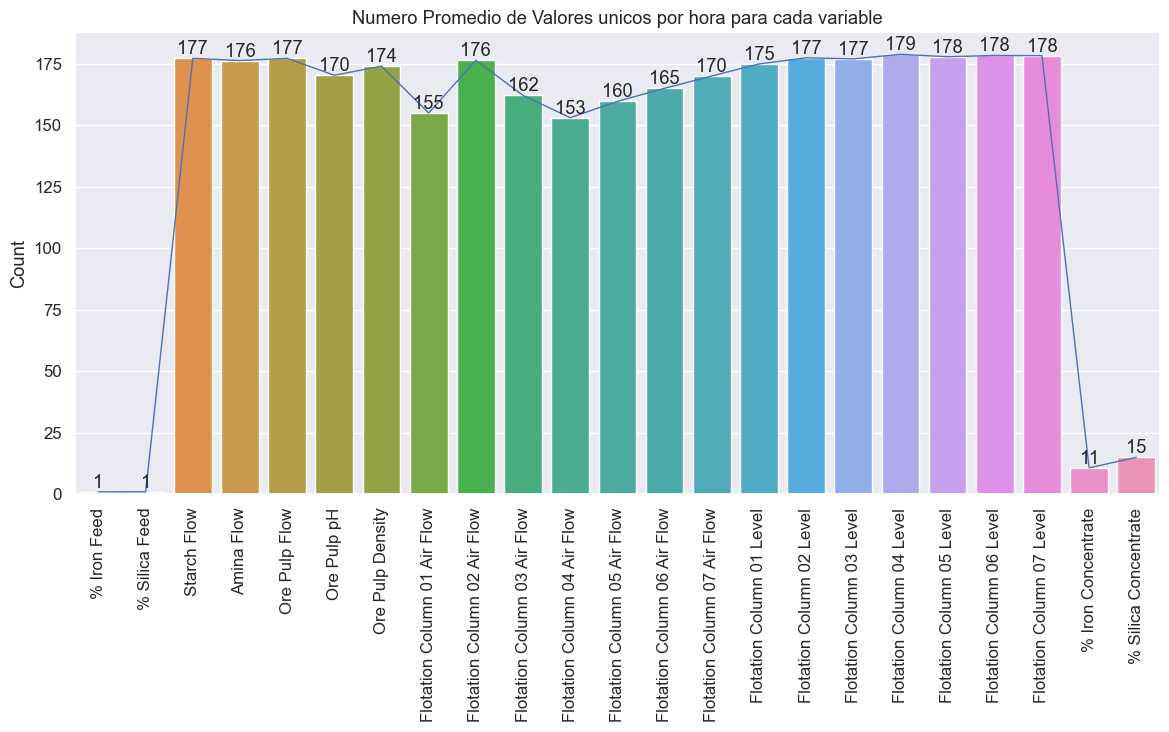

In [24]:
x = df.groupby(df.index.strftime('%Y-%m-%d %H')).nunique().mean()

plt.figure(figsize=(14,6),dpi=100)
sns.lineplot(x = x.index, y=x.values, lw=1)
ax = sns.barplot(x = x.index, y=x.values)
plt.title("Numero Promedio de Valores unicos por hora para cada variable")
plt.ylabel('Count')
plt.xticks(rotation=90);

for c in ax.containers:
        labels = [f"{round(h,0):.0f}" if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

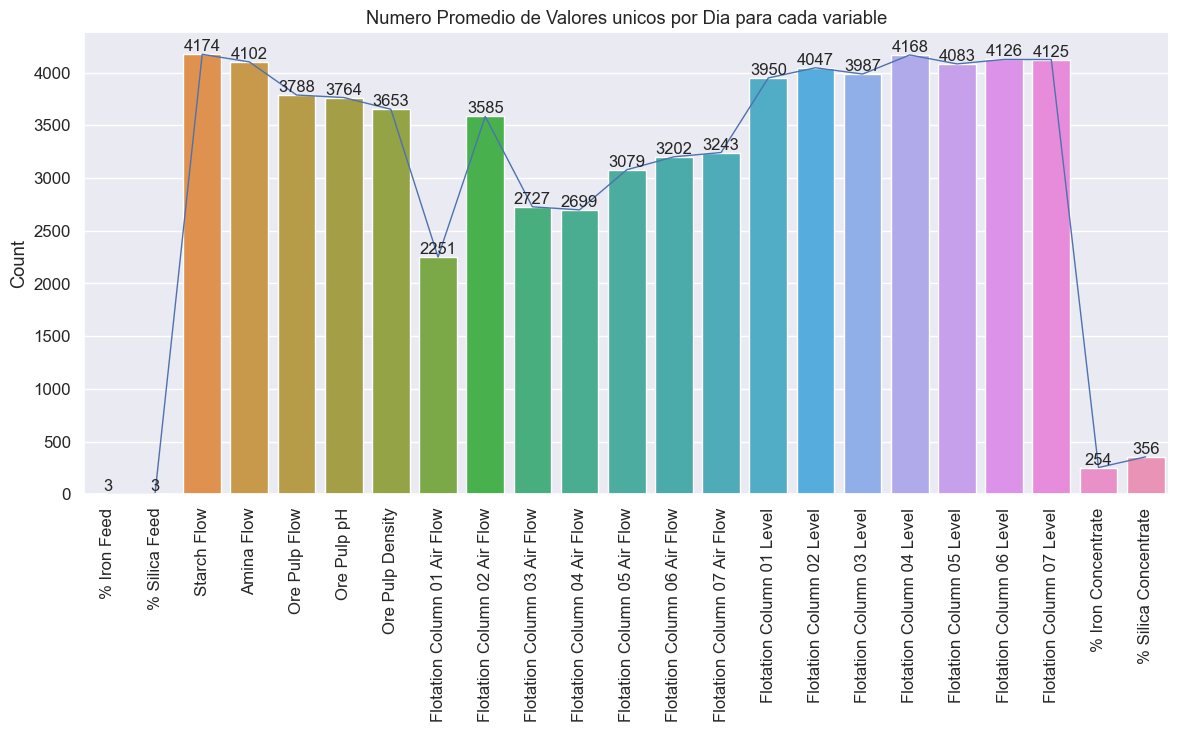

In [25]:
x = df.groupby(df.index.strftime('%Y-%m-%d')).nunique().mean()

plt.figure(figsize=(14,6),dpi=100)
sns.lineplot(x = x.index, y=x.values, lw=1)
ax = sns.barplot(x = x.index, y=x.values)
plt.title("Numero Promedio de Valores unicos por Dia para cada variable")
plt.ylabel('Count')
plt.xticks(rotation=90);

for c in ax.containers:
        labels = [f"{round(h,0):.0f}" if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', **{"size":12});

**We confirm that the target variable is updated for the most part every 1 hour.**

In [26]:
x = df.groupby(df.index.strftime('%Y-%m-%d %H')).nunique()["% Silica Concentrate"]
x.value_counts()

1      3639
180     309
Name: % Silica Concentrate, dtype: int64

**Based on the information presented in this notebook and considering mainly that my target variable of interest (% Silica Concentrate), is updated once per hour (not considering the previously mentioned anomaly), I have decided to <font color="red">resample the dataset with a frequency of 1 hour, taking only the first value of each hour</font>. It does not make sense to have almost 700,000 rows if my target variable is not experiencing variations since its measurement frequency is low, while most of the explanatory variables vary since they have a much higher measurement/update frequency..**

**The best time to do the resampling within the hour is at minute 0 and second 0. The table below indicates that this is the time when there are fewer identical values of the target variable compared to the immediate previous measurement.**

In [27]:
a = pd.DataFrame()
a["not_equal_to_last"] = df["% Silica Concentrate"] - df["% Silica Concentrate"].shift(1)
a = pd.DataFrame(a[a["not_equal_to_last"] != 0]["not_equal_to_last"])
a = a.groupby([a.index.minute, a.index.second]).count().sort_values(by="not_equal_to_last", ascending=False)
a.index = a.index.rename(["Minutos","segundos"])
a

not_equal_to_last
Minutos segundos                   
0       0                      3517
37      40                      309
38      20                      309
        40                      309
39      0                       309
...                             ...
20      20                      309
        40                      309
21      0                       309
        20                      309
59      40                      309

[180 rows x 1 columns]

In [25]:
#tendria que haber usado esta funcion si es que el mejor tiempo no fuera a la primera medicion de la hora, me ahorre el trabajo ya que tuve que solo ocupar
#.first()

# def custom_resampler(array):
#     #if array.index.minute == 2 and array.index.second == 20:
#     s = array.loc[(array.index.minute == 2) & (array.index.second == 20)]
#     return s


# x = df.resample("1H").apply(custom_resampler)
# x.index = x.index + pd.Timedelta(value=140, unit="s")

In [29]:
df_h = df.resample('H').first()
df_h.index.names = ['Date']

**We observe that after resampling, there are no more duplicate rows as previously detected.**

In [30]:
df_h.duplicated().sum()

0

**I verify that there are no missing values after resampling.**

In [31]:
total = df_h.isnull().sum().sort_values(ascending=False)
percent = (df_h.isnull().sum()/df_h.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
% Iron Feed                       0      0.0
Flotation Column 06 Air Flow      0      0.0
% Iron Concentrate                0      0.0
Flotation Column 07 Level         0      0.0
Flotation Column 06 Level         0      0.0
Flotation Column 05 Level         0      0.0
Flotation Column 04 Level         0      0.0
Flotation Column 03 Level         0      0.0
Flotation Column 02 Level         0      0.0
Flotation Column 01 Level         0      0.0
Flotation Column 07 Air Flow      0      0.0
Flotation Column 05 Air Flow      0      0.0
% Silica Feed                     0      0.0
Flotation Column 04 Air Flow      0      0.0
Flotation Column 03 Air Flow      0      0.0
Flotation Column 02 Air Flow      0      0.0
Flotation Column 01 Air Flow      0      0.0
Ore Pulp Density                  0      0.0
Ore Pulp pH                       0      0.0
Ore Pulp Flow                     0      0.0
Amina Flow                        0      0.0
Starch Flow                       0      0.0
% Silica Concentrate              0      0.0

**General information of the RESAMPLED dataset: All variables are continuous with a dtype of float64 (with the exception of the index which is a datetime64 dtype). The dataset spans temporally and has an hourly frequency between (2017-03-29 12:00:00 to 2017-09-09 23:00:00), it contains 3948 rows and 23 columns..**

In [32]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3948 entries, 2017-03-29 12:00:00 to 2017-09-09 23:00:00
Freq: H
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3948 non-null   float32
 1   % Silica Feed                 3948 non-null   float32
 2   Starch Flow                   3948 non-null   float32
 3   Amina Flow                    3948 non-null   float32
 4   Ore Pulp Flow                 3948 non-null   float32
 5   Ore Pulp pH                   3948 non-null   float32
 6   Ore Pulp Density              3948 non-null   float32
 7   Flotation Column 01 Air Flow  3948 non-null   float32
 8   Flotation Column 02 Air Flow  3948 non-null   float32
 9   Flotation Column 03 Air Flow  3948 non-null   float32
 10  Flotation Column 04 Air Flow  3948 non-null   float32
 11  Flotation Column 05 Air Flow  3948 non-null   float32
 12  Flotation Column 0

**Here we observe that our target variable (% Silica Concentrate) is updated with a daily frequency (close (20) but not exact (24)) to the rest of the explanatory variables, with also have the exception of our feed variables % Iron Feed and % Silica Feed that we know have an update frequency of 3 times per day or once every 8 hours.**

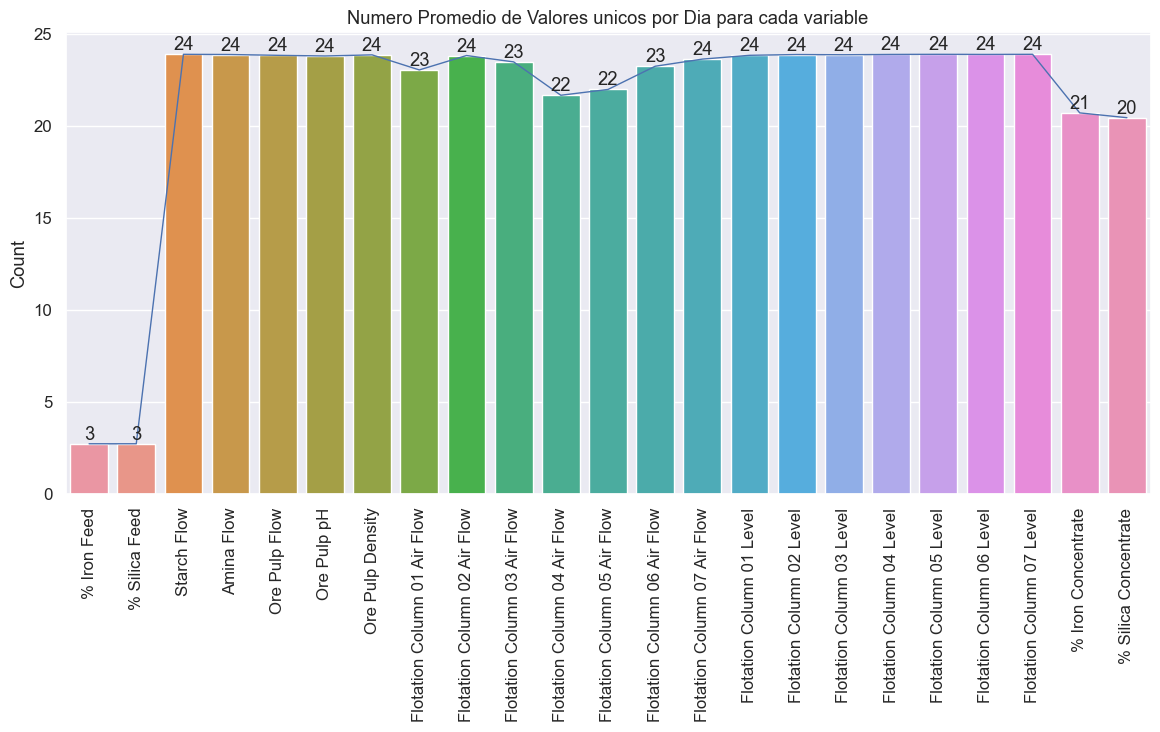

In [33]:
x = df_h.groupby(df_h.index.strftime('%Y-%m-%d')).nunique().mean()

plt.figure(figsize=(14,6),dpi=100)
sns.lineplot(x = x.index, y=x.values, lw=1)
ax = sns.barplot(x = x.index, y=x.values)
plt.title("Numero Promedio de Valores unicos por Dia para cada variable")
plt.ylabel('Count')
plt.xticks(rotation=90);

for c in ax.containers:
        labels = [f"{round(h,0):.0f}" if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge');

**Here we observe with great satisfaction that our target variable (% Silica Concentrate) is updated with a daily frequency (close but not exact) to the rest of the explanatory variables, except for our feed variables % Iron feed and % Silica Feed which we know have an update frequency of 3 times per day or once every 8 hours.**

**Here we observe in this small table that there are 342 rows in which % Silica Concentrate is not updated with respect to TWO previous measurements (2 hours difference) and the value is repeated. The same happens when I set a difference of TWENTY-FOUR MEASUREMENTS (1 day or 24 hours difference), there are 88 values that remain exactly the same as the previous day at the same time.**

**In my opinion, this is still a problem that deserves to be analyzed (ideally the update frequency of my target variable should be the same compared to my explanatory variables). I do not consider extrapolating the target variable to be a valid option to remedy this. From the data I have available, I cannot do anything more to solve this specific problem. It would be ideal to talk to the people who constructed this dataset and also the people who operated the flotation plant, and try to understand the causes of this anomaly and see how it could be robustly solved.**

**I will create a line plot and visually indicate with red vertical lines the time intervals (more evident) that have these problems of "non-updating" of the target variable to make it clearer.**

In [34]:
df_h[df_h["% Silica Concentrate"].diff(2) == 0].shape[0] , df_h[df_h["% Silica Concentrate"].diff(24) == 0].shape[0] 

(342, 88)

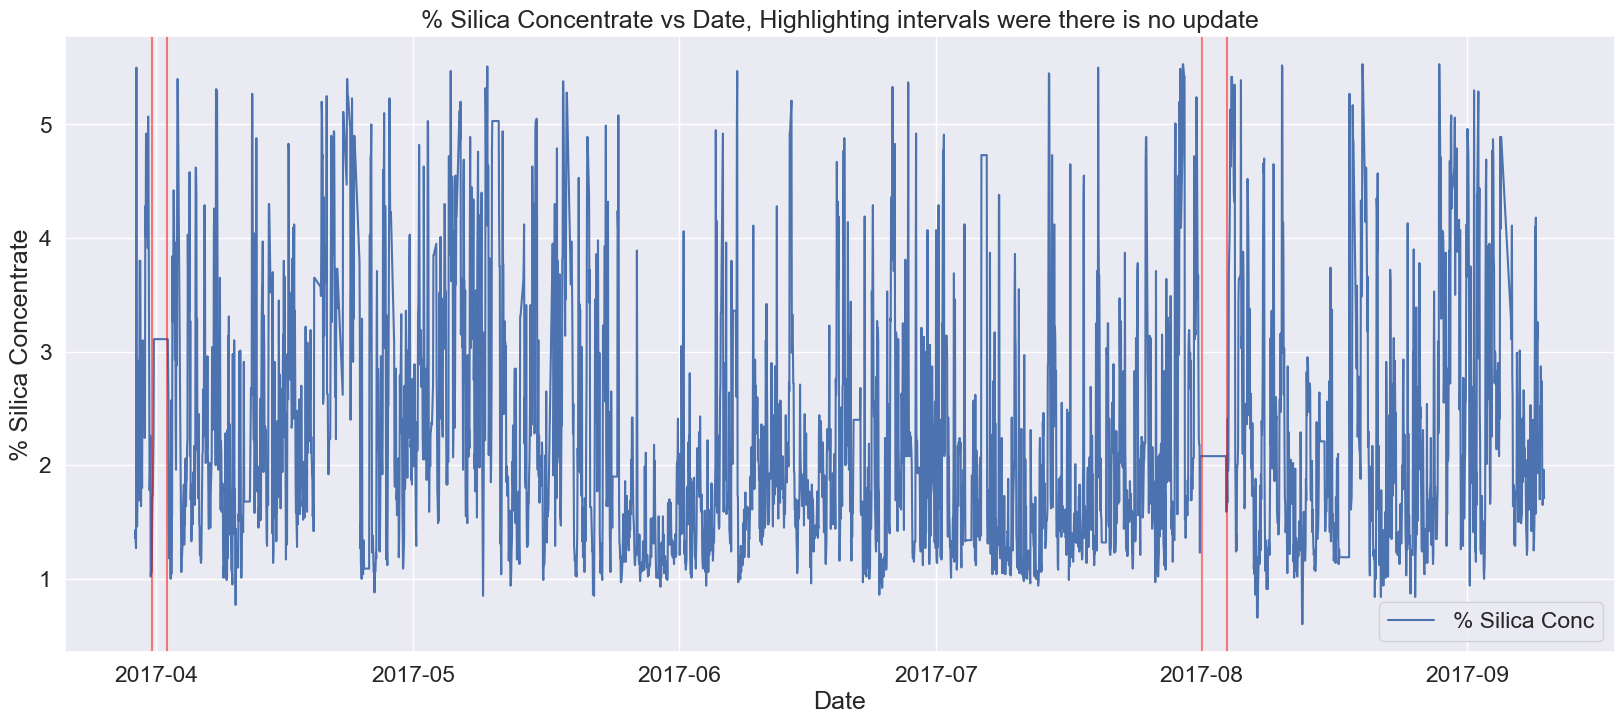

In [36]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20,8),dpi=100)
sns.lineplot(x=df_h.index,y=df_h["% Silica Concentrate"],ax=ax,label="% Silica Conc")
plt.ylabel("% Silica Concentrate");
plt.axvline(x=pd.to_datetime(1.49096e18), ymin=0, ymax=6, color="red",alpha=0.5);
plt.axvline(x=pd.to_datetime(1.49111e18), ymin=0, ymax=6, color="red",alpha=0.5);
plt.axvline(x=pd.to_datetime(1.501552e18), ymin=0, ymax=6, color="red",alpha=0.5);
plt.axvline(x=pd.to_datetime(1.5018e18), ymin=0, ymax=6, color="red",alpha=0.5);
plt.title("% Silica Concentrate vs Date, Highlighting intervals were there is no update");
sns.set(font_scale=1.1)

**Here I will create a couple of feature engineering columns related to time. I will create 2 columns, one indicating the hour of the measurement and another indicating the day of the week. I will also create another pair of columns with transformations for each of these two newly created variables, in order to capture the "cyclicity" of both the day of the week and the hour. Since I cannot directly feed the ML algorithms the numerical value of the "hour", for example (0,1,2...23), even though the hour is ordinal, this does not hold true for the case where 0 comes after 23. I need to find a way to tell my algorithm the hour and day of the week in a cyclical format.**

**Various articles suggest that a solution to this problem is to apply 2 transformations based on sine and cosine and create 2 dimensions (columns) based on the original non-cyclic ordinal temporal variable.**

**For example, in the case of having the numerical ordinal variable of the hour (0,1,2,3....23):**

**I must create 2 columns with the following transformations:**

df['sin_hour'] = np.sin(2 x np.pi x df[hour]/24)<br>
df['cos_hour'] = np.cos(2 x np.pi x df[hour]/24)

**These two columns serve the purpose of representing my hour variable in a cyclic format that can be fed to the ML algorithms.**

**This would also save me the problem of creating 24 dummy variables to represent the hour in categorical format. With this method, I only need to create two new columns.**

**For more information, please refer to these articles.<br>**
[Articulo_1](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/) <br>
[Articulo_2](https://stats.stackexchange.com/questions/126230/optimal-construction-of-day-feature-in-neural-networks)<br>

In [37]:
df_h["hora"] = df_h.index.hour
df_h['sin_hora'] = np.sin(2 * np.pi * df_h["hora"]/24)
df_h['cos_hora'] = np.cos(2 * np.pi * df_h["hora"]/24)

# Days of week  Monday = 0, sunday = 6
df_h["dia_de_la_semana"] = df_h.index.day_of_week
df_h['sin_dia_de_la_semana'] = np.sin(2 * np.pi * df_h["dia_de_la_semana"]/7)
df_h['cos_dia_de_la_semana'] = np.cos(2 * np.pi * df_h["dia_de_la_semana"]/7)

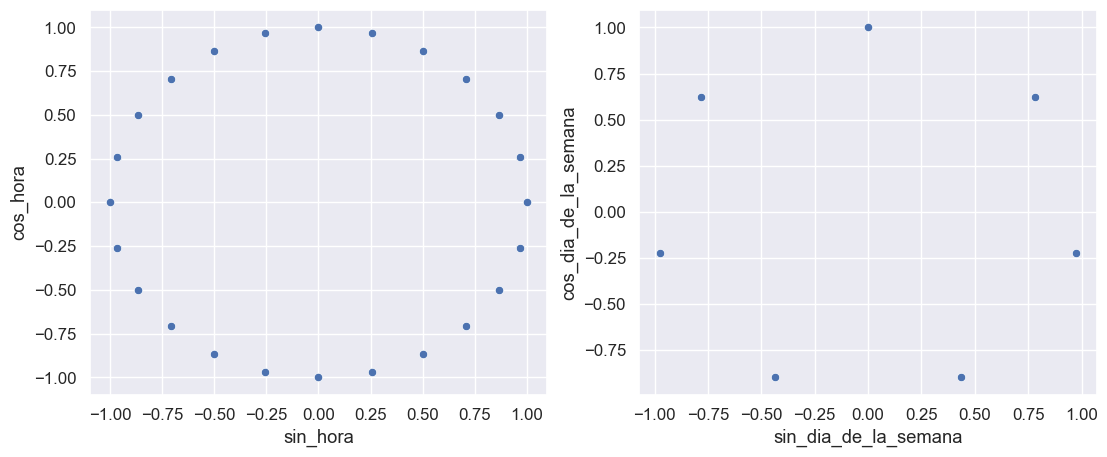

In [38]:
plt.figure(figsize=(13, 5), dpi=100)
plt.subplot(1,2,1)
ax = sns.scatterplot(data=df_h.sample(200), x='sin_hora', y='cos_hora')
plt.subplot(1,2,2)
ax = ax = sns.scatterplot(data=df_h.sample(200), x='sin_dia_de_la_semana', y='cos_dia_de_la_semana')

In [39]:
feat_eng_vars = ['sin_hora','cos_hora','sin_dia_de_la_semana','cos_dia_de_la_semana']
feat_eng_df = df_h[feat_eng_vars]

**Here I make a list of the variables created with Feature engineering so far.**

**I must remove the "hour" and "day_of_week" variables before running any algorithm, I should only keep their sin and cos versions.**

**I will better remove the "hour" and "day_of_week" variables immediately to avoid confusion. If I need these original variables later in the EDA, I can simply call them using df_h.index.hour, for example.****

In [40]:
df_h = df_h.drop(["hora","dia_de_la_semana"],axis=1)

**As a final step to conclude the preprocessing, I will remove the variable (% Iron Concentrate), since it cannot be used as an explanatory variable for my target variable (% Silica Concentrate), as both are known simultaneously after the flotation process through laboratory tests, so including it as an explanatory variable would lead to "data leakage". (perhaps I should have removed this variable much earlier to avoid confusion, but it doesn't matter).**

In [41]:
df_h = df_h.drop("% Iron Concentrate",axis=1)

In [42]:
df_h.duplicated().sum()

0

In [43]:
df_h.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
Date                                                                       
2017-03-29 12:00:00    60.180000           9.34  2044.989990  349.911011   
2017-03-29 13:00:00    60.180000           9.34  2510.360107  306.635010   
2017-03-29 14:00:00    60.180000           9.34  2138.229980  435.199005   
2017-03-29 15:00:00    60.180000           9.34   458.079010  476.877991   
2017-03-29 16:00:00    59.540001           9.56   145.349625  252.087997   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
Date                                                                
2017-03-29 12:00:00     405.625000      9.74604          1.649650   
2017-03-29 13:00:00     402.303009      9.63786          1.524512   
2017-03-29 14:00:00     401.953003      9.61320          1.594940   
2017-03-29 15:00:00     400.173004      9.75149          1.638440   
2017-03-29 16:00:00     399.484009      9.96978          1.521080   

                     Flotation Column 01 Air Flow  \
Date                                                
2017-03-29 12:00:00                    200.393005   
2017-03-29 13:00:00                    200.164993   
2017-03-29 14:00:00                    199.539993   
2017-03-29 15:00:00                    199.951004   
2017-03-29 16:00:00                    199.072006   

                     Flotation Column 02 Air Flow  \
Date                                                
2017-03-29 12:00:00                    195.733994   
2017-03-29 13:00:00                    194.285995   
2017-03-29 14:00:00                    197.436005   
2017-03-29 15:00:00                    191.455994   
2017-03-29 16:00:00                    182.429993   

                     Flotation Column 03 Air Flow  \
Date                                                
2017-03-29 12:00:00                    201.826004   
2017-03-29 13:00:00                    201.929001   
2017-03-29 14:00:00                    198.604996   
2017-03-29 15:00:00                    199.264999   
2017-03-29 16:00:00                    201.251007   

                     Flotation Column 04 Air Flow  \
Date                                                
2017-03-29 12:00:00                    295.096008   
2017-03-29 13:00:00                    295.096008   
2017-03-29 14:00:00                    295.096008   
2017-03-29 15:00:00                    295.096008   
2017-03-29 16:00:00                    295.096008   

                     Flotation Column 05 Air Flow  \
Date                                                
2017-03-29 12:00:00                    306.399994   
2017-03-29 13:00:00                    306.399994   
2017-03-29 14:00:00                    306.399994   
2017-03-29 15:00:00                    306.399994   
2017-03-29 16:00:00                    306.399994   

                     Flotation Column 06 Air Flow  \
Date                                                
2017-03-29 12:00:00                    250.600998   
2017-03-29 13:00:00                    250.194000   
2017-03-29 14:00:00                    250.460007   
2017-03-29 15:00:00                    247.809006   
2017-03-29 16:00:00                    250.488007   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
Date                                                                           
2017-03-29 12:00:00                    251.001999                 555.264465   
2017-03-29 13:00:00                    250.188004                 851.772766   
2017-03-29 14:00:00                    250.488007                 850.510681   
2017-03-29 15:00:00                    249.582001                 858.052246   
2017-03-29 16:00:00                    250.759995                 853.745117   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
Date                                                                        
2017-03-29 12:00:00                 552.255554           

# EDA

**I will start the EDA by creating histograms to understand/visualize the distributions of all my variables (all are continuous variables).**

**It can be observed that several variables have a more or less normal distribution, with the exception of the 7 Air Flow columns, which have quite ugly distributions. It can also be observed that the distribution of feed variables (% iron Feed and % Silica Feed) has an almost inverse mirror behavior. This inverse behavior makes sense (as the more % of iron is present in the feed, there will be less volume available for other elements such as silica impurities, and vice versa.)**

**My target variable % Silica Concentrate seems to have a distribution similar to gamma, where most of the measurements are of low % of silica.**

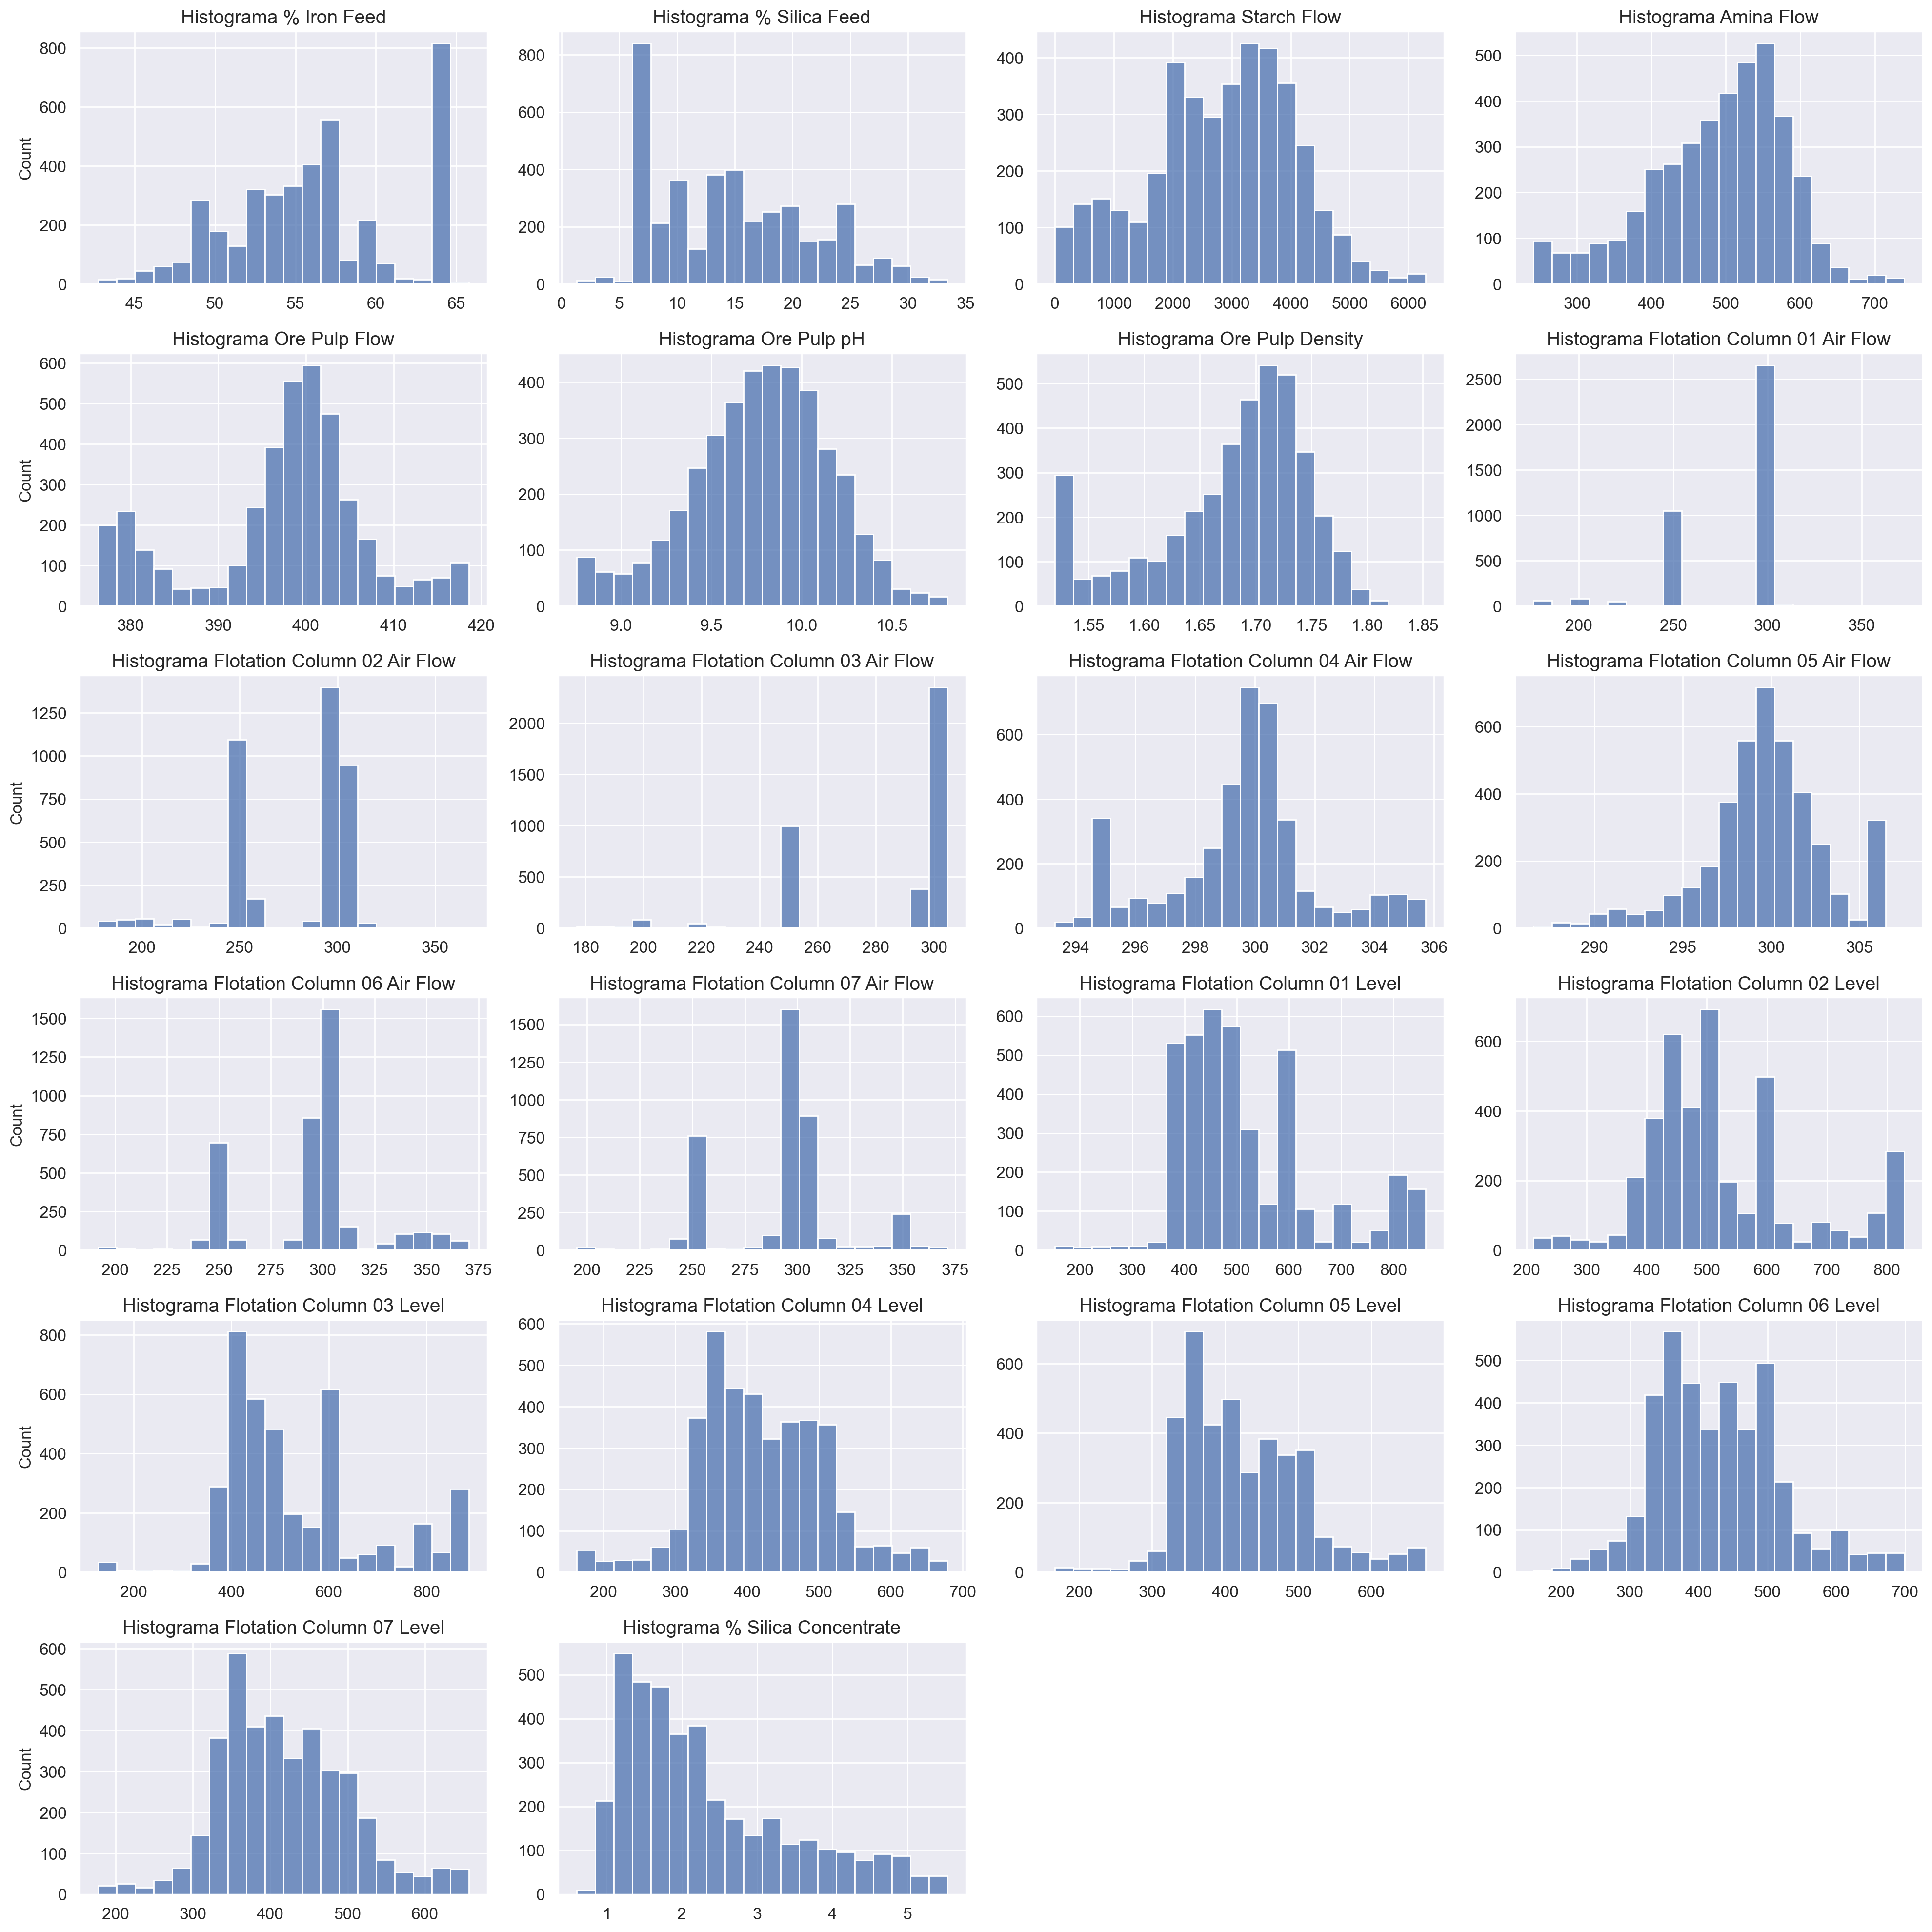

In [44]:
a = df_h.drop(feat_eng_vars,axis=1)

plt.figure(figsize=(20,20),dpi=200)
for i , n in enumerate(a.columns.to_list()):
    plt.subplot(6,4,i+1)
    ax = sns.histplot(data=a,x=n, kde=False, bins=20)#, multiple="stack")
    plt.title(f"Histograma {n}", fontdict={"fontsize":14})
    plt.xlabel("")
    plt.ylabel(ax.get_ylabel(), fontdict={"fontsize":12})
    if i not in [0,4,8,12,16,20,24]:
        plt.ylabel("")
    

plt.tight_layout();

**Visually, through the univariate boxplots, it is observed that most of my variables do not have outliers or have very few, with the exception of some columns of Flotation Columns Air Flow and perhaps a little Ore Pulp Flow.**

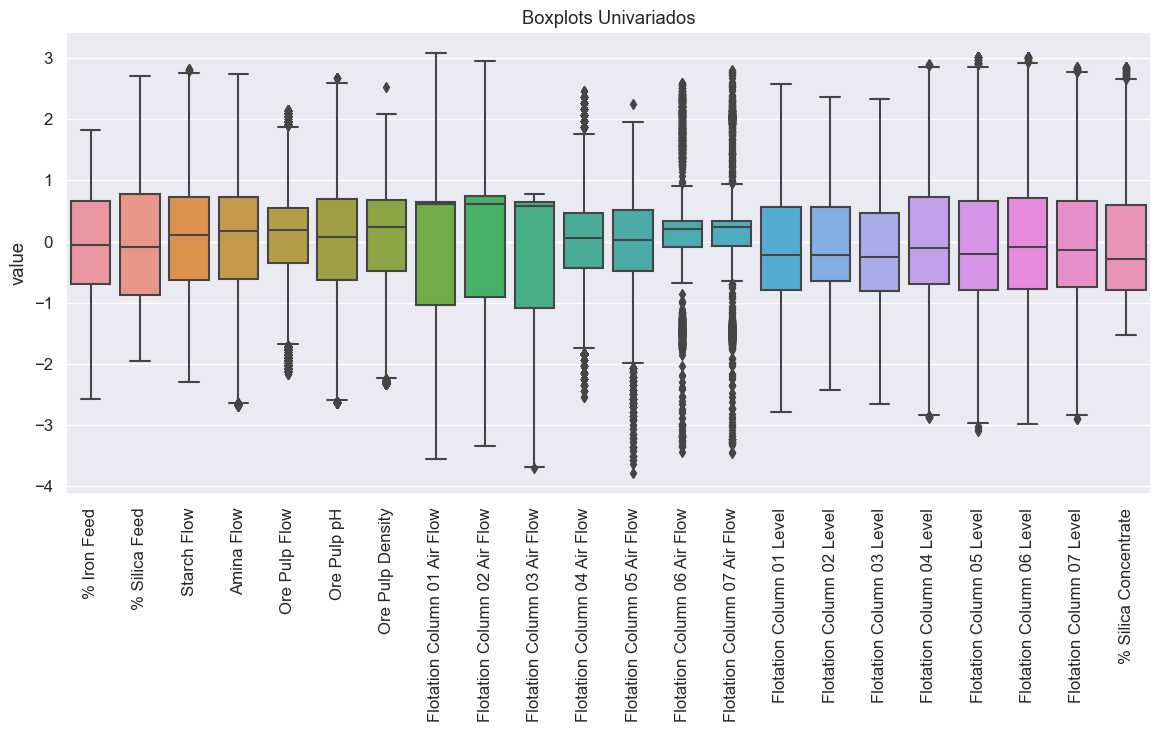

In [41]:
z = df_h.drop(feat_eng_vars,axis=1)
scaler = StandardScaler()
#scaler = MinMaxScaler()
z = pd.DataFrame(scaler.fit_transform(z), columns=z.columns, index=z.index)
z = z.melt()

plt.figure(figsize=(14,6),dpi=100)
sns.boxplot(x=z["variable"], y=z["value"]);
plt.xticks(rotation=90);
plt.xlabel("");
plt.title("Boxplots Univariados");

**I will decompose my target variable into its components of trend, seasonality, and residuals. (We observe that it does not have seasonality or trend changes** (the seasonality pseudo seasonality we see in the graph is a fluke)

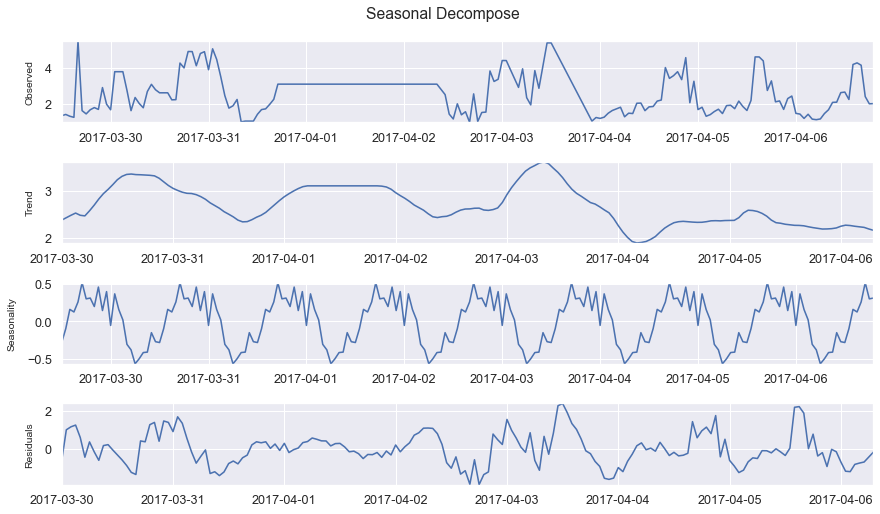

In [48]:
result = seasonal_decompose(df_h["% Silica Concentrate"][:200])

def decompose_plot(result):

    fig,axes = plt.subplots(ncols=1,nrows=4,figsize=(12,7))

    axes[0].plot(result.observed.index, result.observed.values)
    axes[0].set_ylabel("Observed",fontdict={"size":10,},labelpad=10)

    axes[1].plot(result.trend.index, result.trend.values)
    axes[1].set_ylabel("Trend",fontdict={"size":10,},labelpad=10)

    axes[2].plot(result.seasonal.index, result.seasonal.values)
    axes[2].set_ylabel("Seasonality",fontdict={"size":10,},labelpad=10)

    axes[3].plot(result.resid.index, result.resid.values)
    axes[3].set_ylabel("Residuals",fontdict={"size":10,},labelpad=10)
    
    for n in range(0,4):
        axes[n].autoscale(axis="both",tight=True)

    fig.suptitle("Seasonal Decompose",fontsize=15)
    plt.tight_layout()

decompose_plot(result)

To confirm the above, I will perform the Dickey-Fuller test to determine whether my variable is stationary or not.

A time series is stationary when its statistical properties such as mean, variance, and autocovariance are constant over time. In other words, the time series does not have a trend, seasonal effect, or any other structure that depends on the time index.

In [50]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if out["p-value"] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

**We confirm its stationary**

In [51]:
adf_test(df_h["% Silica Concentrate"])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.734785e+00
p-value                 1.101028e-11
# lags used             2.400000e+01
# observations          3.923000e+03
critical value (1%)    -3.432018e+00
critical value (5%)    -2.862277e+00
critical value (10%)   -2.567162e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


**Here I will quickly create scatterplots between my process variables (mainly reagents and feed characteristics to my flotation cells) and color them by my target variable % Silica Concentrate. I will exclude the "flotation column air flow (1-7) and flotation column Level (1-7)" mainly because I would end up with a giant and difficult to see PairPlot.**

**The only clear and distinguishable pattern is that % Silica Feed and % Iron Feed have a strong inverse linear relationship.**

**There is also no clear evidence that any of these combinations of variables (bivariate analysis) are good in separating the resulting concentrate with greater or lesser presence of silica.**

<Figure size 1500x1500 with 0 Axes>

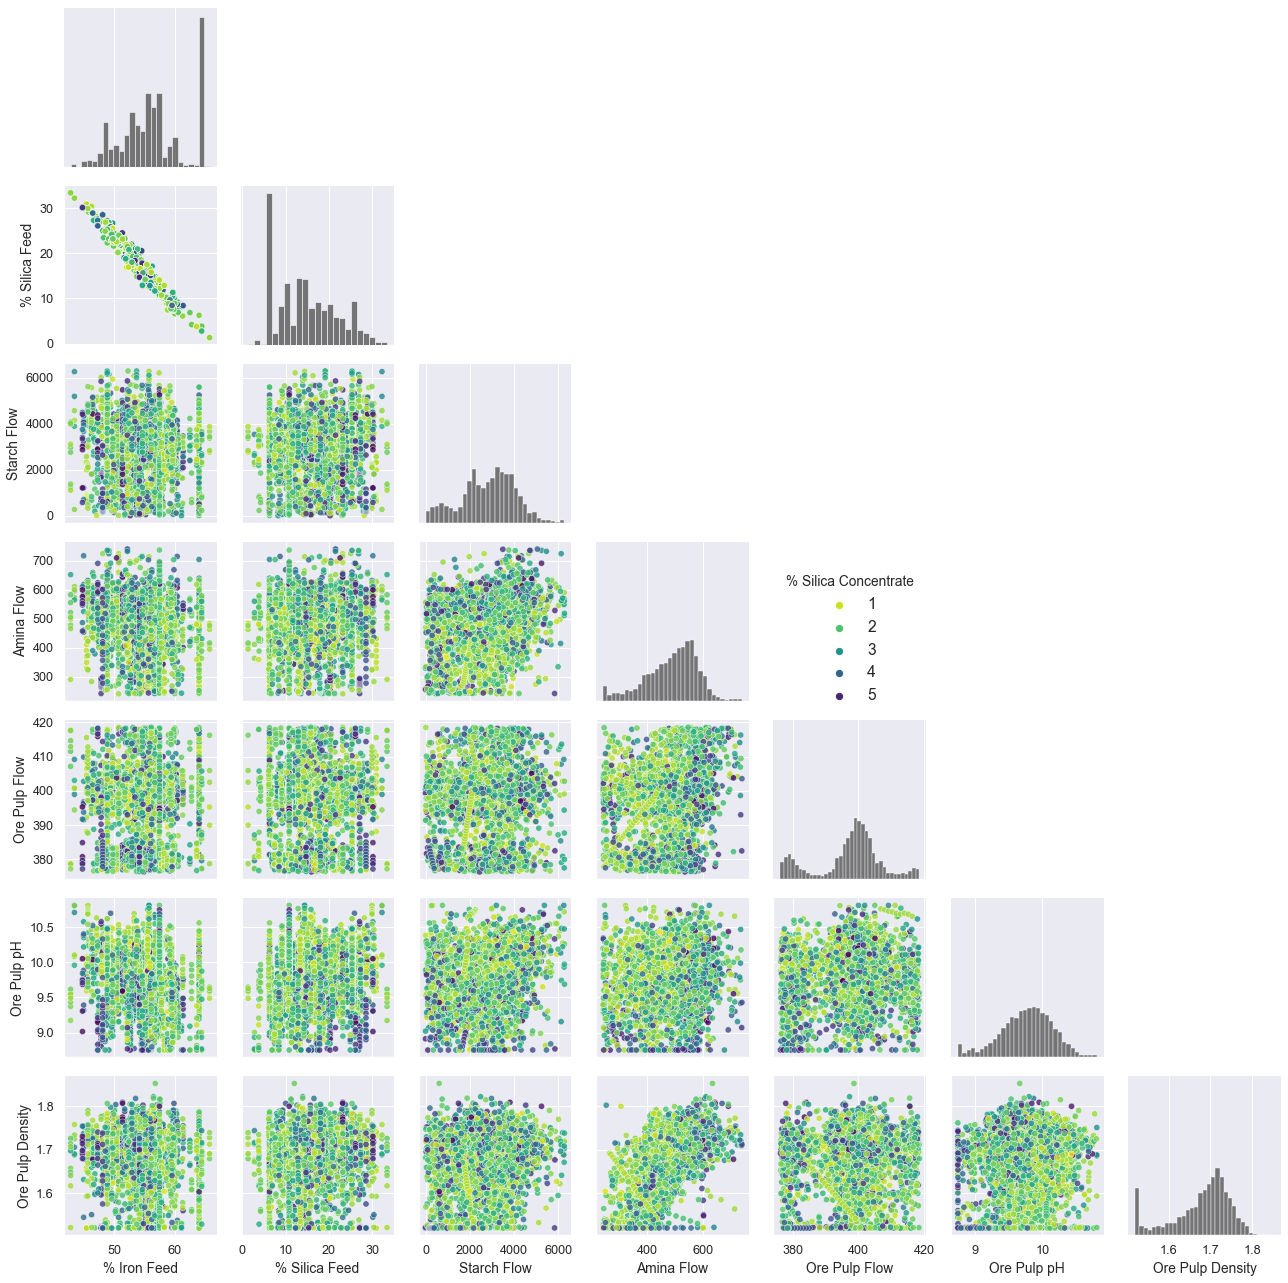

In [52]:
warnings.filterwarnings("ignore")
#sns.set(font_scale=1.2)

flotation_col_var = []

for n in df_h.columns:
    if "Flotation" in n:
        flotation_col_var.append(n)

a = df_h.drop(feat_eng_vars,axis=1)
a = a.drop(flotation_col_var,axis=1)

plt.figure(figsize=(15,15),dpi=100)

g = sns.PairGrid(data=a, hue="% Silica Concentrate", palette="viridis_r", corner=True)
g.map_diag(sns.histplot, hue=None, color=".3");
g.map_offdiag(sns.scatterplot, **{"alpha":0.8});
g.add_legend(**{"bbox_to_anchor":[0.65,0.5,0,0], "fontsize":15});

warnings.filterwarnings("default");
#sns.set(font_scale=1)

In the following chart and table, we observe the behavior of the % of Silica present in the feed and the % of Silica present in the resulting concentrate, and we can verify the overall effectiveness of the flotation process in reducing silica impurities.

On average and percentage-wise, we observe that the flotation process reduces silica impurities by 84.26%.

In [53]:
str(round(100 - df_h["% Silica Concentrate"].mean()/df_h["% Silica Feed"].mean()*100,2)) + "%"

'84.26%'

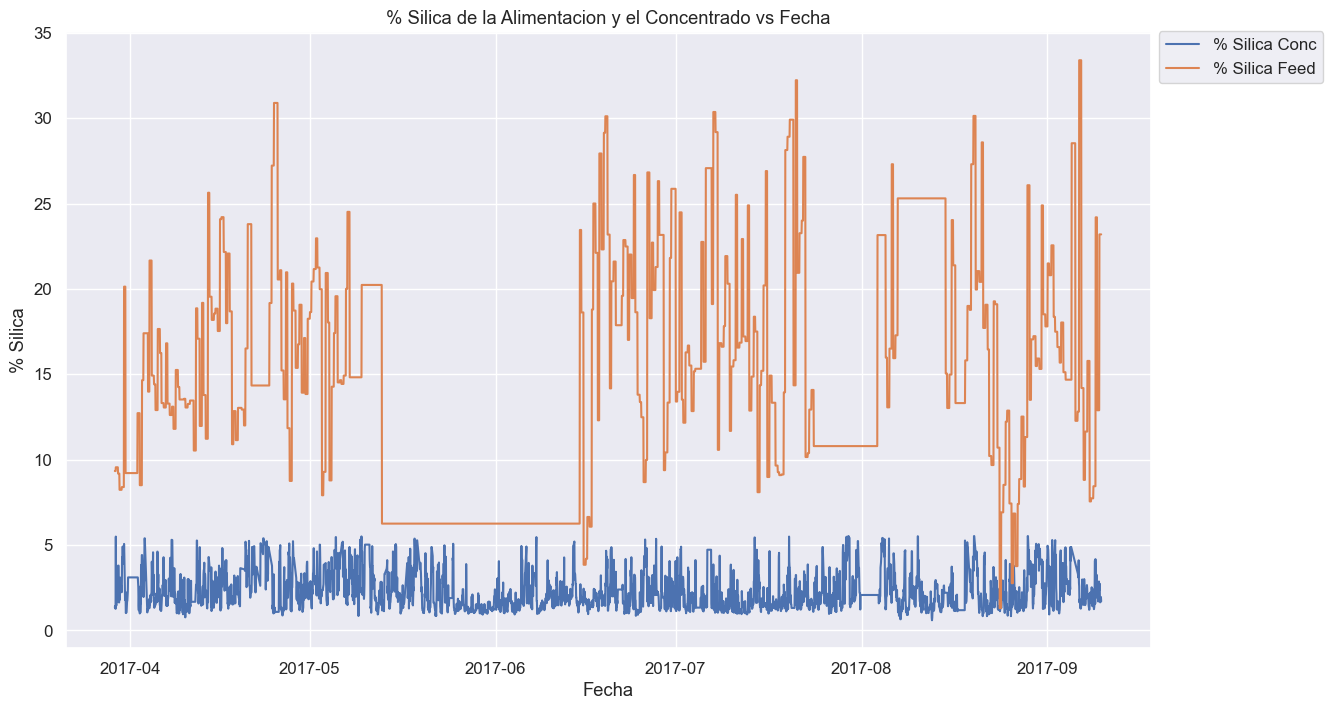

In [54]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,8),dpi=100)
sns.lineplot(data=df_h,x=df_h.index,y=df_h["% Silica Concentrate"],ax=ax,label="% Silica Conc")
sns.lineplot(data=df_h,x=df_h.index,y=df_h["% Silica Feed"],ax=ax,label="% Silica Feed")
plt.ylabel("% Silica")
plt.xlabel("Fecha")
plt.title("% Silica de la Alimentacion y el Concentrado vs Fecha")

ax.legend(bbox_to_anchor=[1,1.015,0,0]);

Linear correlation heatmap

No significant strong linear correlation is observed between the explanatory variables and my target variable % Silica Concentrate. None of them exceed +-0.25. However, this does not mean that these variables do not have explanatory power. They may have non-linear relationships or relationships that are relevant when combined with others. (although this low correlations is worrying)

Most of the linear correlations between the explanatory variables are also weak.

There are a few explanatory variables that have strong linear correlations among themselves, such as the % of iron and silica in the feed (% Iron feed and % Silica Feed). We also observe that some variables of Flotation column XX airflow and flotation column XX level have high linear correlations with others of the same name but different number.

Finally, there is a high correlation between the density of the ore pulp feed (ore pulp density) and the flow of amine (reactive)

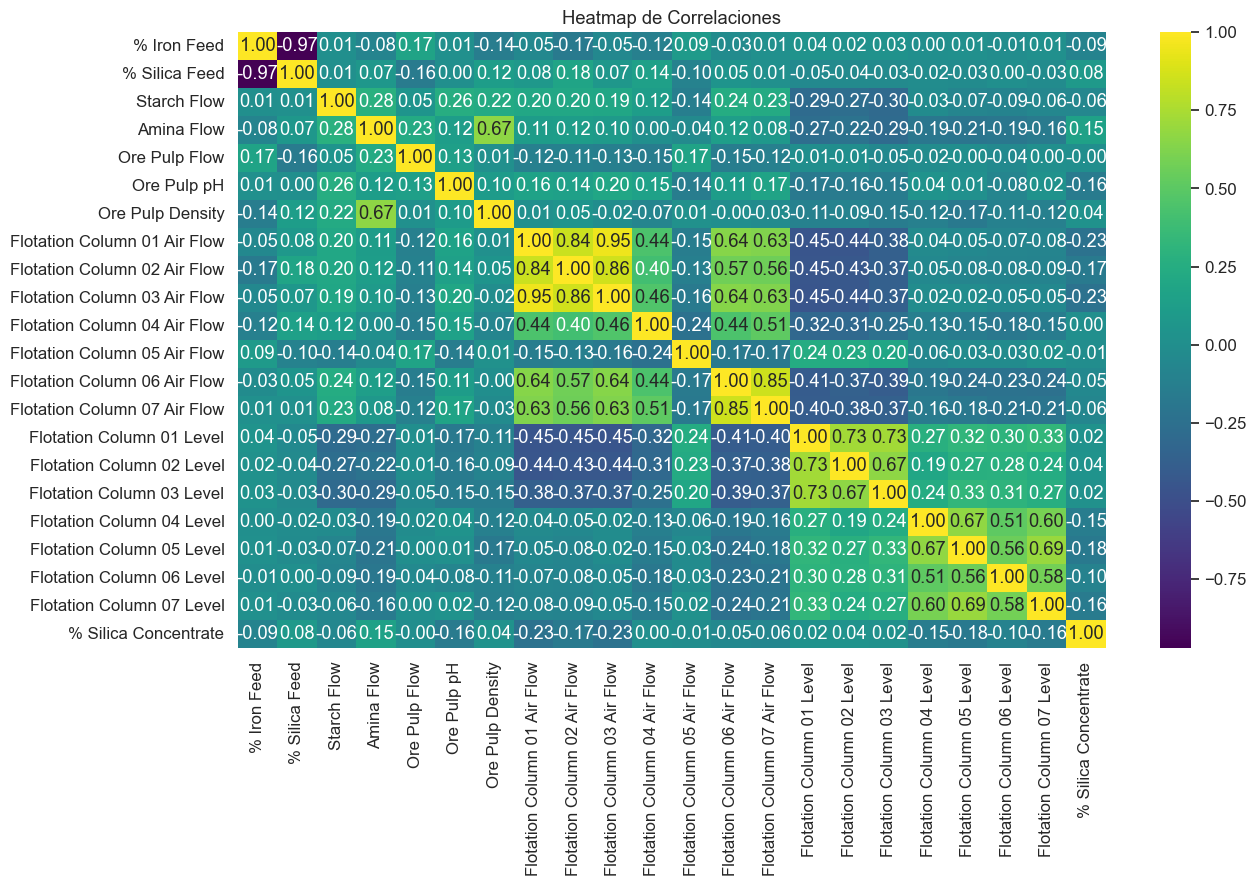

In [55]:
x = df_h.drop(feat_eng_vars,axis=1)

plt.figure(figsize=(14,8),dpi=100)
sns.heatmap(data=x.corr(),annot=True,cmap="viridis",fmt=".2f");
plt.title("Heatmap de Correlaciones");


Here I am only using the variable % Silica Concentrate as a value within the heatmap. I standardized the data in order to use a divergent cmap.

In the following heatmap, I tried to see if there is any recognizable pattern between the silica percentages of the concentrate (my target variable), and the time and day of the week they were measured. Visually, no significant pattern can be appreciated, but it gives the slight impression that on average the plant would be achieving lower % silica in the concentrate in the early morning or in the evening/night, rather than during the day.

Visually, I cannot distinguish anything clear with the days of the week either.

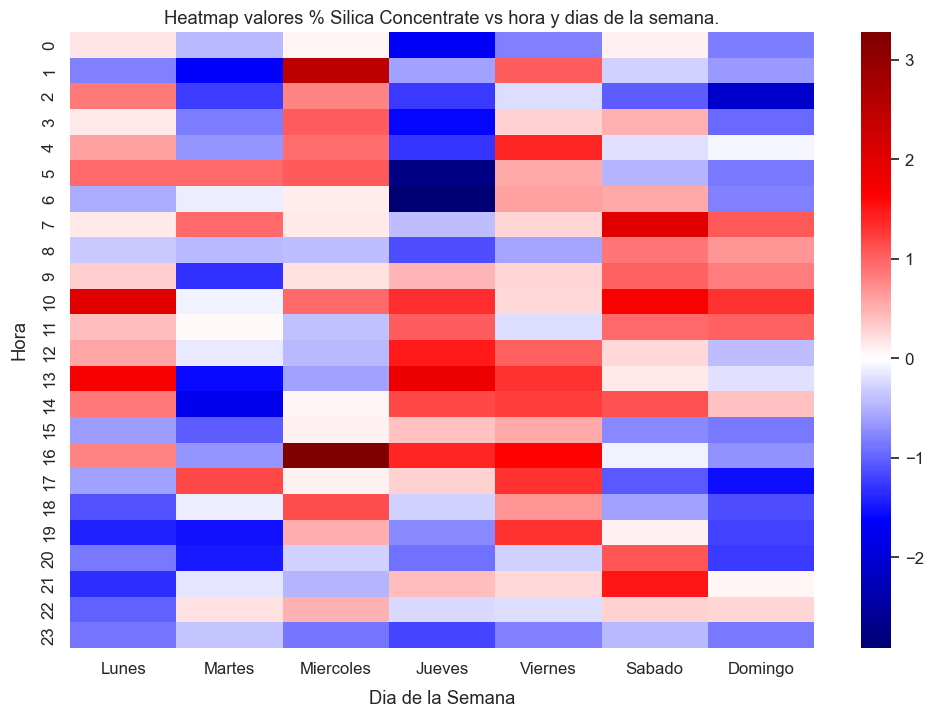

In [56]:
x = df_h.drop(feat_eng_vars,axis=1)

x = x.groupby([x.index.hour,x.index.day_name()])["% Silica Concentrate"].mean()
x.index.names = ["Hora","Dia de la Semana"]
x = x.reset_index()
x["Dia de la Semana"] = x["Dia de la Semana"].replace(dict(zip(["Monday","Tuesday","Wednesday","Thursday",
                                                              "Friday","Saturday", "Sunday"],["Lunes","Martes","Miercoles","Jueves",
                                                                                             "Viernes","Sabado","Domingo"])))

scaler = StandardScaler()
x["% Silica Concentrate"] = scaler.fit_transform(x["% Silica Concentrate"].values.reshape(-1, 1))
#x = pd.DataFrame(new_scaled, index=x.index, columns=["% Silica Concentrate"])

x = pd.pivot_table(data=x, columns="Dia de la Semana", index="Hora", values="% Silica Concentrate", aggfunc="mean")
x = x[["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]]

plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(x, cmap="seismic", center=0);
plt.title("Heatmap valores % Silica Concentrate vs hora y dias de la semana.");
plt.xlabel("Dia de la Semana",labelpad=10);
plt.ylabel("Hora", labelpad=10);


# Unsupervised learning

Now I will use DBSCAN as an UNSUPERVISED clustering and outlier detection algorithm. DBSCAN is a density-based clustering algorithm. Although I do not intend to remove outliers as that would break the temporal continuity of my data, I think it is relevant to visually analyze which points the algorithm identifies as outliers.

The clusters themselves are not of much interest to me, so I will only focus on visualizing and identifying the rows that DBSCAN flags as outliers.

It is known that distance- and density-based algorithms suffer from the "curse of dimensionality," which, in simple terms, means that distance metrics such as Euclidean distance perform poorly on datasets that have a high number of features (columns) and few samples compared (rows).

According to the definition below, my dataset would not be suffering from "high dimensionality," so it would not be necessary to perform dimensionality reduction before running DBSCAN.

"High dimensionality" has a very rigorous meaning: it means a data set whenever p (features) > n (samples), no matter what p is or n is. Because in statistics, you will never have a deterministic answer when p>n unless you introduce your own assumption.

Useful links to keep:

[High Dimensional data](https://www.quora.com/What-do-we-mean-by-high-dimensional-data)<br>
[High Dimensional data link 2](https://www.statology.org/high-dimensional-data/)<br>
[Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)<br>
[Curse of dimensionality Link 2](https://towardsdatascience.com/the-curse-of-dimensionality-5673118fe6d2)<br>
[PCA vs TSNE](https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/)<br>
[PCA vs TSNE link2](https://medium.com/analytics-vidhya/t-sne-intuition-7d373819088c)<br>
[PCA vs TSNE link3](https://www.thekerneltrip.com/statistics/tsne-vs-pca/)<br>
[Preserving Global structure vs Local Structure](https://datascience.stackexchange.com/questions/109276/what-is-the-meaning-of-preserving-local-or-global-structure-of-the-data)<br>
[Preserving Global structures vs local structure link 2](https://datascience.stackexchange.com/questions/36889/what-does-it-mean-by-t-sne-retains-the-structure-of-the-data)<br>
[How to use T-SNE](https://distill.pub/2016/misread-tsne/)<br>
[how to use t-sne](https://opentsne.readthedocs.io/en/latest/parameters.html#perplexity)<br>
[T-sne Degrades to PCA at high perplexity](https://towardsdatascience.com/tsne-degrades-to-pca-d4abf9ef51d3)<br>
[UMAP vs T-SNE](https://pair-code.github.io/understanding-umap/)

Afterwards, I will apply TSNE to my data. TSNE is a non-linear dimensionality reduction technique, its main virtue is having visualization capabilities different from those of PCA, although information such as explained variance cannot be obtained from this algorithm, unlike PCA.

TSNE mainly retains the local structure, meaning that the "data points" that appear together in TSNE embeddings are likely to be similar to each other in the original high-dimensional space. However, inter-cluster distances are not interpretable, meaning that two clusters appearing very close or far apart in the embeddings does not necessarily mean that this is the case in the original high-dimensional space. On the other hand, PCA retains the global structure (global variance) of the dataset, but performs poorly in terms of local structure for visualization purposes.

I will not remove my target variable before running DBSCAN since my goal is to detect outliers, but I will remove it before running TSNE.

In [95]:
scaler = StandardScaler()

z = df_h.copy()
z = z.drop("% Silica Concentrate",axis=1)
z = pd.DataFrame(scaler.fit_transform(z), columns=z.columns, index=z.index)

outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.2,8,40):
    
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(z)
    
    #Numero total de outliers encontrados.
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = np.sum(dbscan.labels_ == -1) * 100/ len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

**4 looks like a good option for the epsilon parameter</font>**

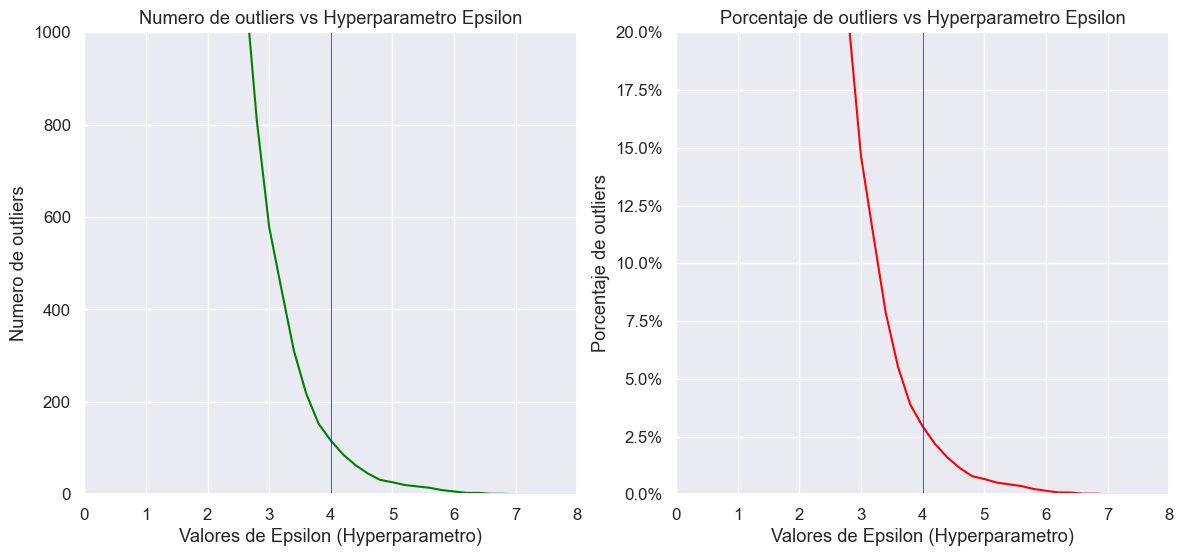

In [82]:
plt.figure(figsize=(14,6),dpi=100)

plt.subplot(1,2,1)
ax = sns.lineplot(x=np.linspace(0.2,8,40),y=number_of_outliers, color="green")
plt.xlabel("Valores de Epsilon (Hyperparametro)")
plt.ylabel("Numero de outliers");
plt.xlim([0,8])
plt.ylim([0,1000])
plt.axvline(x=4, ymin=0, ymax=1.2, color="blue", lw=0.5);
plt.title("Numero de outliers vs Hyperparametro Epsilon")

plt.subplot(1,2,2)
ax = sns.lineplot(x=np.linspace(0.2,8,40),y=outlier_percent, color="red")
plt.xlabel("Valores de Epsilon (Hyperparametro)")
plt.ylabel("Porcentaje de outliers")
plt.xlim([0,8])
plt.ylim([0,20])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axvline(x=4, ymin=0, ymax=1.2, color="blue",lw=0.5);
plt.title("Porcentaje de outliers vs Hyperparametro Epsilon");

C:\Users\56976\anaconda3\envs\TimeSeriesDarts\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


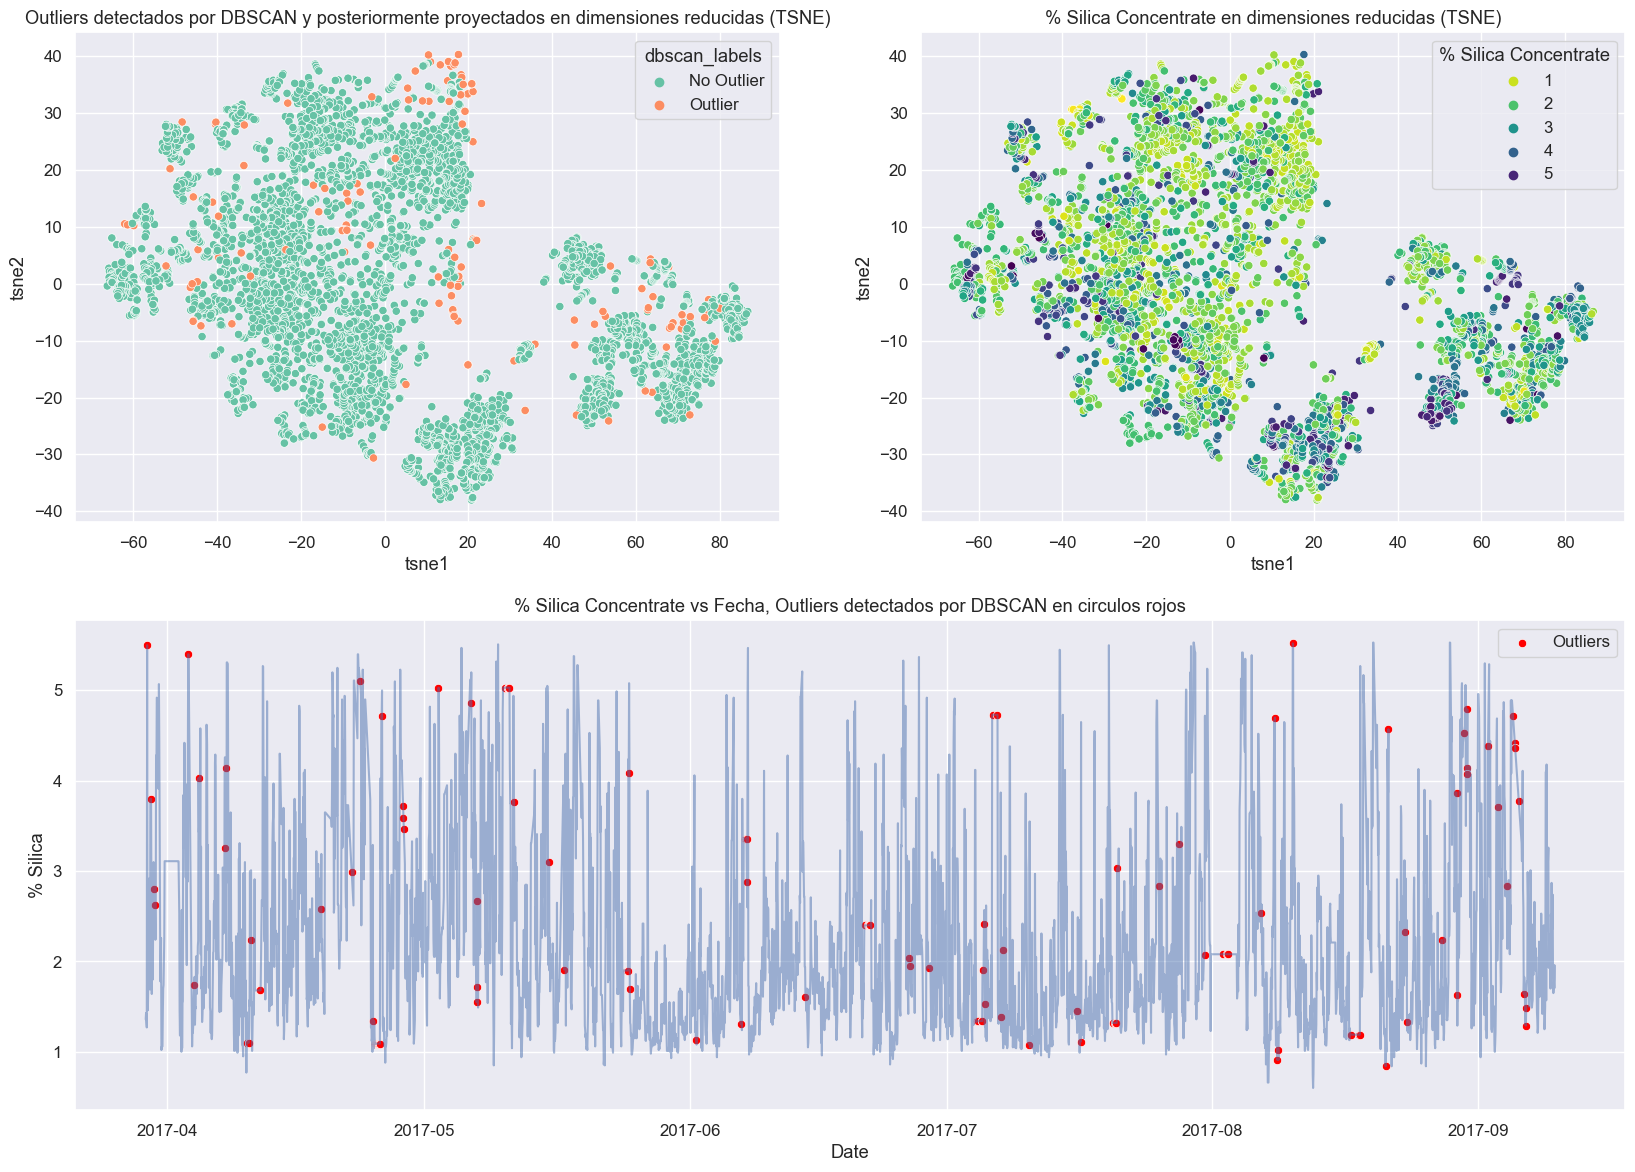

In [46]:
scaler = StandardScaler()

z = df_h.copy()
#z = z.drop("% Silica Concentrate",axis=1)
z = pd.DataFrame(scaler.fit_transform(z), columns=z.columns, index=z.index)

dbscan = DBSCAN(eps=4, min_samples=5)
dbscan.fit(z)

tsne = TSNE(n_components=2, init="pca", perplexity=100, learning_rate="auto", n_iter=4000, random_state=42, n_jobs=-1)
tsne.fit(z.drop("% Silica Concentrate",axis=1)) 

tsne_df = pd.DataFrame(tsne.embedding_, columns=["tsne1","tsne2"], index=df_h.index)

z["dbscan_labels"] = dbscan.labels_
z["dbscan_labels"] = z["dbscan_labels"].apply(lambda x: "Outlier" if x < 0 else "No Outlier")
z["% Silica Concentrate"] = df_h["% Silica Concentrate"]

tsne_df["dbscan_labels"] = dbscan.labels_
tsne_df["dbscan_labels"] = tsne_df["dbscan_labels"].apply(lambda x: "Outlier" if x < 0 else "No Outlier")
tsne_df["% Silica Concentrate"] = df_h["% Silica Concentrate"]

sns.set(font_scale=1.1)

b = z[z["dbscan_labels"]=="Outlier"]

fig = plt.figure(figsize=(20,14),dpi=100)

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(x=tsne_df["tsne1"], y = tsne_df["tsne2"], hue=tsne_df["dbscan_labels"], palette="Set2", ax=ax1)
plt.title("Outliers detectados por DBSCAN y posteriormente proyectados en dimensiones reducidas (TSNE)")
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(x=tsne_df["tsne1"], y = tsne_df["tsne2"], hue=tsne_df["% Silica Concentrate"], palette="viridis_r",ax=ax2);
plt.title("% Silica Concentrate en dimensiones reducidas (TSNE)")
ax3 = fig.add_subplot(gs[1, :])
sns.lineplot(x=z.index,y=z["% Silica Concentrate"], alpha=0.5, ax=ax3)
sns.scatterplot(x=b.index,y=b["% Silica Concentrate"], label="Outliers", color="red", ax=ax3)
plt.ylabel("% Silica")
plt.xlabel("Fecha")
plt.title("% Silica Concentrate vs Fecha, Outliers detectados por DBSCAN en circulos rojos");

sns.set(font_scale=1)

**The histograms below show that the outliers are much more heavily concentrated towards both ends of my target variable, compared to the distribution of non-outlier values..**

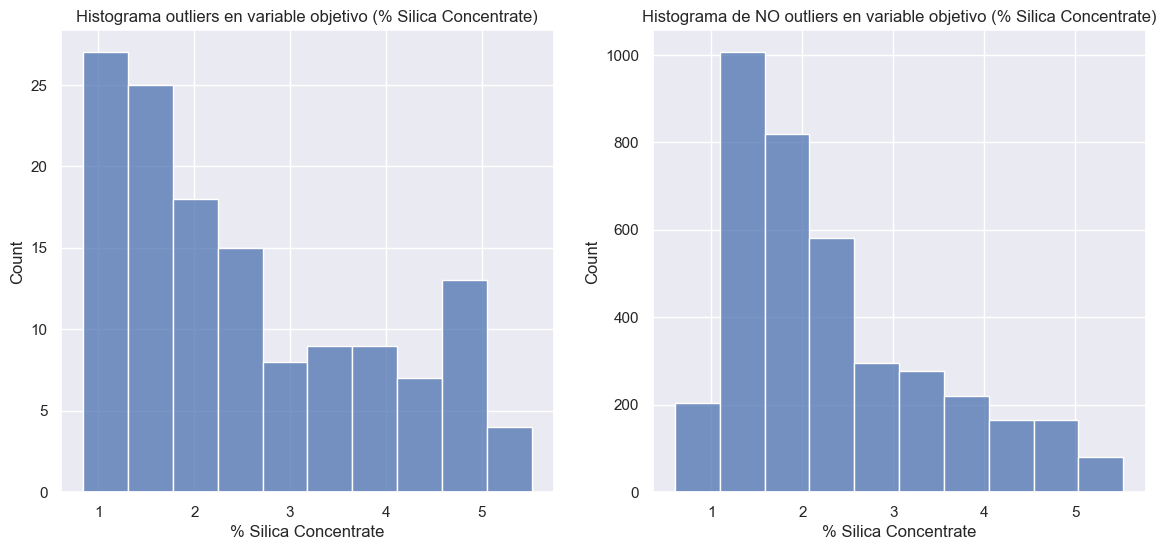

In [260]:
plt.figure(figsize=(14,6),dpi=100)

plt.subplot(1,2,1)
sns.histplot(x=z[z["dbscan_labels"]=="Outlier"]["% Silica Concentrate"], bins=10)
plt.title("Histograma outliers en variable objetivo (% Silica Concentrate)")

plt.subplot(1,2,2)
sns.histplot(x=z[z["dbscan_labels"]=="No Outlier"]["% Silica Concentrate"], bins=10)
plt.title("Histograma de NO outliers en variable objetivo (% Silica Concentrate)");

I would like to try TSNE with a higher perplexity value. According to what I have read, TSNE retains more global structure of the data and less local structure with a high perplexity hyperparameter.


C:\Users\56976\anaconda3\envs\TimeSeriesDarts\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


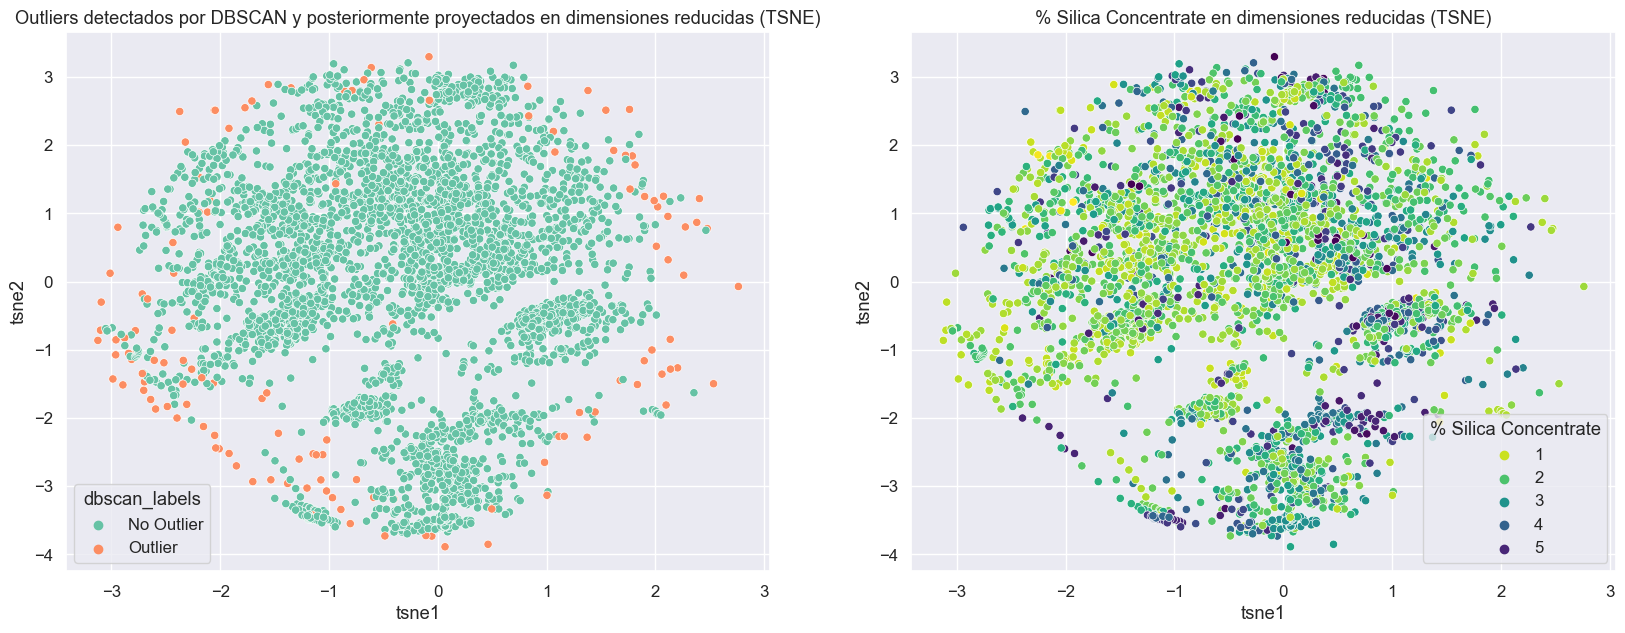

In [100]:
scaler = StandardScaler()
z = df_h.copy()
#z = z.drop("% Silica Concentrate",axis=1)
z = pd.DataFrame(scaler.fit_transform(z), columns=z.columns, index=z.index)


dbscan = DBSCAN(eps=4, min_samples=5)
dbscan.fit(z)

tsne = TSNE(n_components=2, init="pca", perplexity=2000, learning_rate="auto", n_iter=4000, random_state=42, n_jobs=-1)
tsne.fit(z.drop("% Silica Concentrate",axis=1))

tsne_df_2 = pd.DataFrame(tsne.embedding_, columns=["tsne1","tsne2"], index=df_h.index)

z["dbscan_labels"] = dbscan.labels_
z["dbscan_labels"] = z["dbscan_labels"].apply(lambda x: "Outlier" if x < 0 else "No Outlier")
z["% Silica Concentrate"] = df_h["% Silica Concentrate"]

tsne_df_2["dbscan_labels"] = dbscan.labels_
tsne_df_2["dbscan_labels"] = tsne_df_2["dbscan_labels"].apply(lambda x: "Outlier" if x < 0 else "No Outlier")
tsne_df_2["% Silica Concentrate"] = df_h["% Silica Concentrate"]


sns.set(font_scale=1.1)

b = z[z["dbscan_labels"]=="Outlier"]

fig = plt.figure(figsize=(20,7),dpi=100)

gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(x=tsne_df_2["tsne1"], y = tsne_df_2["tsne2"], hue=tsne_df_2["dbscan_labels"], palette="Set2", ax=ax1)
plt.title("Outliers detectados por DBSCAN y posteriormente proyectados en dimensiones reducidas (TSNE)")
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(x=tsne_df_2["tsne1"], y = tsne_df_2["tsne2"], hue=tsne_df_2["% Silica Concentrate"], palette="viridis_r",ax=ax2);
plt.title("% Silica Concentrate en dimensiones reducidas (TSNE)");

**Out of curiosity, I applied PCA and found that it performs quite poorly in terms of explained variance. It takes 11 principal components just to explain 80% of the total variance of the dataset (I have 25 original explanatory columns and 1 objective). This may be due to the fact that the variables in my dataset do not have very linear behaviors among them, and there are not many strongly correlated original variables that PCA can simplify into a few principal components. We also observe that the visualization of the first two principal components is not the best, as they only explain 34% of the variance.**

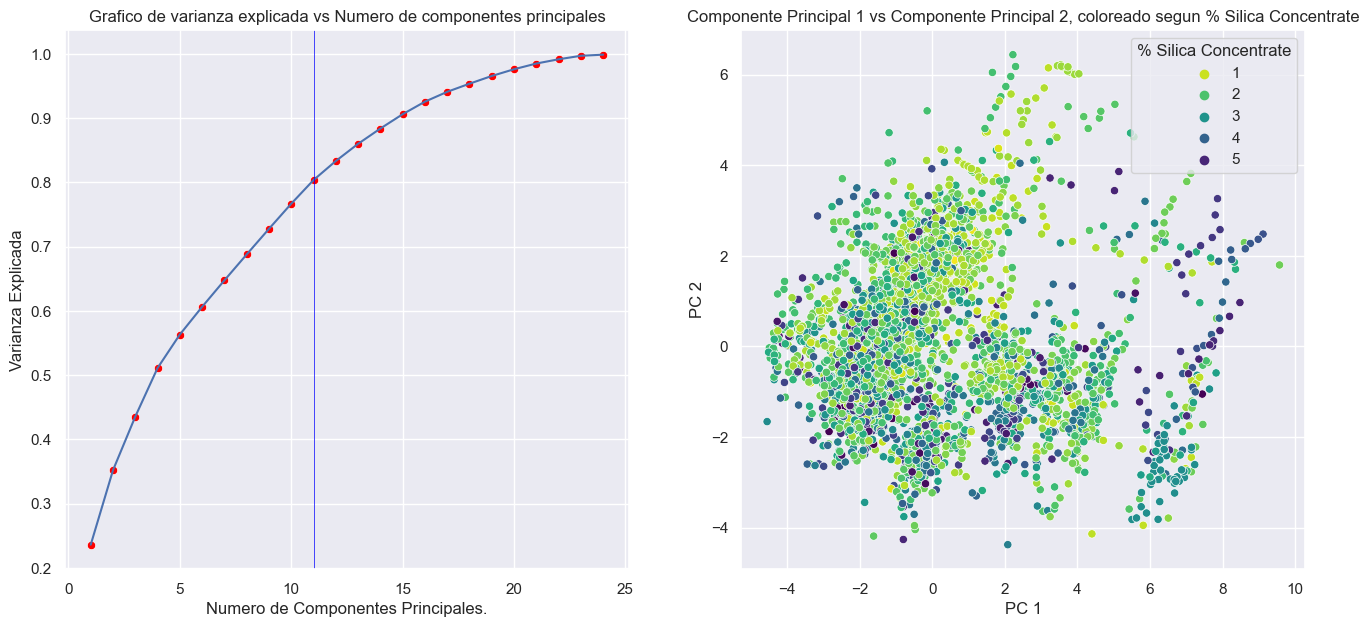

In [47]:
scaler = StandardScaler()
z = df_h.copy()
z = z.drop("% Silica Concentrate",axis=1)
z = pd.DataFrame(scaler.fit_transform(z), columns=z.columns, index=z.index)



explained_variance = []

for n in range(1,len(z.columns)):
    pca = PCA(n_components=n, random_state=42)
    pca.fit(z)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    

    
pca_model = PCA(n_components=2, random_state=42)
pca_results = pca_model.fit_transform(z)    
    
z["dbscan_labels"] = dbscan.labels_
z["dbscan_labels"] = z["dbscan_labels"].apply(lambda x: "Outlier" if x < 0 else "No Outlier")
z["% Silica Concentrate"] = df_h["% Silica Concentrate"]    

plt.figure(figsize=(16,7),dpi=100)

plt.subplot(1,2,1)
sns.lineplot(x=range(1,len(z.columns)-2), y = explained_variance)
sns.scatterplot(x=range(1,len(z.columns)-2), y = explained_variance, color="red")
plt.xlabel("Numero de Componentes Principales.")
plt.ylabel("Varianza Explicada");
plt.axvline(x=11, ymin=0, ymax=1.2, color="blue",lw=0.5);
plt.title("Grafico de varianza explicada vs Numero de componentes principales");

plt.subplot(1,2,2)
sns.scatterplot(x= pca_results[:,0], y = pca_results[:,1] ,hue=df_h["% Silica Concentrate"], palette="viridis_r");
plt.xlabel("PC 1");
plt.ylabel("PC 2");
plt.title("Componente Principal 1 vs Componente Principal 2, coloreado segun % Silica Concentrate");

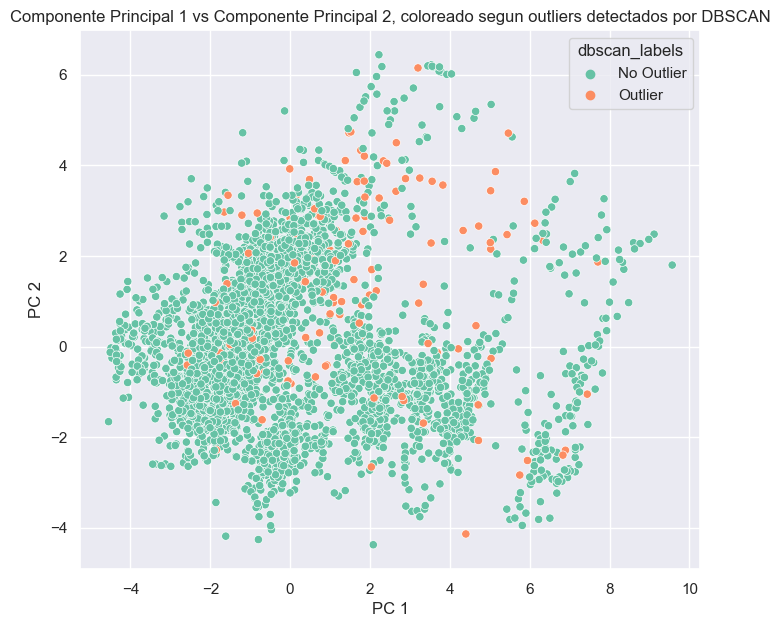

In [48]:
plt.figure(figsize=(8,7),dpi=100)

sns.scatterplot(x= pca_results[:,0], y = pca_results[:,1] ,hue=z["dbscan_labels"], palette="Set2")
plt.xlabel("PC 1");
plt.ylabel("PC 2");
plt.title("Componente Principal 1 vs Componente Principal 2, coloreado segun outliers detectados por DBSCAN");

# Supervised Learning

Preparing data for supervised learning. (I manipulate the same explanatory variables a bit).

In [57]:
list_cols = [col for col in df.columns.to_list()]  # Use this if I want to include all explanatory variables.

# list_cols = [col for col in df.columns.to_list() if "Flotation" not in col]  # Use this to exclude flotation air/level variables.
# flotation_cols = [col for col in df.columns.to_list() if "Flotation" in col] # Use this to exclude flotation air/level variables.

list_cols.remove("% Silica Concentrate")
list_cols.remove("% Iron Concentrate")

# Resample the original df every 15 minutes.
df_15 = df.resample("15min").first()
df_15 = df_15.drop("% Iron Concentrate", axis=1)

# df_15 = df_15.drop(flotation_cols, axis=1)  # Use this only if I do not want to include flotation air/level variables.

window_size = 3

# Taking advantage of the time factor, I add lagged explanatory variables at 15min, 30min, and 45min, respectively
# (these are the ones that were updated every 20s)

for col_name in list_cols:
    for i in range(window_size):
        df_15[f"{col_name} ({-15*(i+1)}mins)"] = df_15[f"{col_name}"].shift(periods=i+1)

# Resample from 15min to 1hour
df_h = df_15.resample('H').first()

# Here I change the name of my index.
df_h.index.names = ['Date']


In [58]:
# Add lagged values of the target variable as explanatory variables, lagged by 1, 2, and 3 hours respectively.
col_name = "% Silica Concentrate"
window_size = 3

for i in range(window_size):
    df_h[f"{col_name} ({-i-1}h)"] = df_h[f"{col_name}"].shift(periods=i+1)

# Add the columns of hour and day of the week created previously in the preprocessing stage.
df_h = pd.concat([df_h, feat_eng_df], axis=1)

# Make the target variable the first column.
x = df_h.columns.to_list()
x.remove("% Silica Concentrate")
x.insert(0, "% Silica Concentrate")
df_h = df_h[x]

df_h = df_h.dropna()  # Remove rows with missing values due to the shift().
df_h = df_h.astype("float32")  # Convert data to float32 for faster computation.
print(df_h.shape)

(3945, 92)


I remove rows if the value of the target variable is repeated more than 3 times in a row, keeping only the first row where the value starts to repeat. I do this due to the temporal problems previously mentioned in the preprocessing stage (the target variable is not updated in certain intervals), which logically affects the temporal continuity of the data. **I am doing this as an experimentation**. I will resample the index with new dates to appear in consecutive order, while respecting the last original date in the dataset. This could have been done in the preprocessing stage, but since it is an experimental option, I prefer to have it here to play with it. After playing with this processing option, enabled and disabled, the dilemma does not change much; the naive model becomes slightly stronger with this option disabled, so I will enable it. However, the metrics of the models remain very similar in general.

In [59]:
x = df_h[(df_h["% Silica Concentrate"].diff(3) != 0) & (df_h["% Silica Concentrate"].diff(2) != 0) & (
    df_h["% Silica Concentrate"].diff(3) != 0) & (df_h["% Silica Concentrate"].diff(1) != 0)].copy()

z = pd.date_range(end=df_h.index[-1], freq="H", periods=x.shape[0])
x["date"] = z
df_h = x.set_index("date",drop=True)
df_h.shape

(3472, 92)

In [60]:
df_h.head()

% Silica Concentrate  % Iron Feed  % Silica Feed  \
date                                                                    
2017-04-18 08:00:00                  1.27    60.180000           9.34   
2017-04-18 09:00:00                  5.50    59.540001           9.56   
2017-04-18 10:00:00                  1.64    59.540001           9.56   
2017-04-18 11:00:00                  1.46    59.540001           9.56   
2017-04-18 12:00:00                  1.69    59.540001           9.56   

                     Starch Flow  Amina Flow  Ore Pulp Flow  Ore Pulp pH  \
date                                                                       
2017-04-18 08:00:00   458.079010  476.877991     400.173004      9.75149   
2017-04-18 09:00:00   145.349625  252.087997     399.484009      9.96978   
2017-04-18 10:00:00   461.197601  421.216003     394.962006      9.54853   
2017-04-18 11:00:00  1918.969971  439.572998     397.855011      9.46510   
2017-04-18 12:00:00  2110.870117  460.845001     407.431000      9.67227   

                     Ore Pulp Density  Flotation Column 01 Air Flow  \
date                                                                  
2017-04-18 08:00:00           1.63844                    199.951004   
2017-04-18 09:00:00           1.52108                    199.072006   
2017-04-18 10:00:00           1.57168                    199.440002   
2017-04-18 11:00:00           1.59947                    198.677002   
2017-04-18 12:00:00           1.63288                    198.746002   

                     Flotation Column 02 Air Flow  \
date                                                
2017-04-18 08:00:00                    191.455994   
2017-04-18 09:00:00                    182.429993   
2017-04-18 10:00:00                    196.330002   
2017-04-18 11:00:00                    195.169006   
2017-04-18 12:00:00                    195.337006   

                     Flotation Column 03 Air Flow  \
date                                                
2017-04-18 08:00:00                    199.264999   
2017-04-18 09:00:00                    201.251007   
2017-04-18 10:00:00                    198.925003   
2017-04-18 11:00:00                    200.789993   
2017-04-18 12:00:00                    198.800995   

                     Flotation Column 04 Air Flow  \
date                                                
2017-04-18 08:00:00                    295.096008   
2017-04-18 09:00:00                    295.096008   
2017-04-18 10:00:00                    295.096008   
2017-04-18 11:00:00                    295.096008   
2017-04-18 12:00:00                    295.096008   

                     Flotation Column 05 Air Flow  \
date                                                
2017-04-18 08:00:00                    306.399994   
2017-04-18 09:00:00                    306.399994   
2017-04-18 10:00:00                    306.399994   
2017-04-18 11:00:00                    306.399994   
2017-04-18 12:00:00                    306.399994   

                     Flotation Column 06 Air Flow  \
date                                                
2017-04-18 08:00:00                    247.809006   
2017-04-18 09:00:00                    250.488007   
2017-04-18 10:00:00                    250.268997   
2017-04-18 11:00:00                    249.662994   
2017-04-18 12:00:00                    249.893997   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date                                                                           
2017-04-18 08:00:00                    249.582001                 858.052246   
2017-04-18 09:00:00                    250.759995                 853.745117   
2017-04-18 10:00:00                    249.703995                 849.437988   
2017-04-18 11:00:00                    251.416000                 856.106995   
2017-04-18 12:00:00                    252.962997                 855.944214   

                     Flotation Column 02 Level  Flotation

limit_output extension: Maximum message size of 12000 exceeded with 30579 characters

Erasing stuff to save memory

In [54]:
import gc

del x
del df_after
del df_before
del df_cut
#del df
del z
del mask
del a
del all_hours
del df_15
del result

gc.collect()

163798

## Experiment 0, Naive model

It is crucial to have a simple, yet strong baseline model to compare any more complex models to.

In the case of time series data, the naive model par excellence is the one that predicts that the next value is equal to the previous (temporal) value. When the dataset has no seasonality, the previous value is immediately used, and if the dataset has seasonality, a lagged value based on the seasonality is used.

In my experience, the naive model is quite strong (depending on the dataset) in time series problems.

The naive model in time-series forecasting is a simple forecasting method that assumes that the next value in a time-series will be the same as the previous value. This method is also known as the "persistence model" or "last-value model." It is often used as a baseline for comparison against more complex forecasting methods. It is particularly useful when there is no trend or seasonal component in the data

In [157]:
y_true = df_h["% Silica Concentrate"]

The last 10% of the dataset will be my test set, that's why the performance metrics of the naive model will be based on the final 10% of the data.

In [158]:
split_size = int(len(y_true) * (1-0.1)) 
y_true = y_true[split_size:]

**I create performance reporting functions for my model, a tracker to keep track of metrics, and also add a function to perform a time series split (where temporal order is respected).**

In [57]:
def timeseries_models_tracker_df():
    reg_models_scores_df = pd.DataFrame(
        columns=["model_name", "MAE", "RMSE", "MASE", "R2", "MAPE"])

    return reg_models_scores_df

def timeseries_report_model(y_test, model_preds, tracker_df="none", model_name="model_unknown", seasonality=1, naive=False):
    mae = round(mean_absolute_error(y_test, model_preds), 4)
    rmse = round(mean_squared_error(y_test, model_preds) ** 0.5, 4)
    mase = round(mean_absolute_scaled_error(y_test, model_preds, seasonality, naive),4)
    r2 = round(r2_score(y_test, model_preds), 4)
    mape = round(mean_absolute_percentage_error(y_test, model_preds), 4)

    print("MAE: ", mae)
    print("RMSE :", rmse)
    print("MASE :", mase)
    print("R2 :", r2)
    print("MAPE :", mape)

    if isinstance(tracker_df, pd.core.frame.DataFrame):
        tracker_df.loc[tracker_df.shape[0]] = [
            model_name, mae, rmse, mase, r2, mape]
    else:
        pass
    
def mean_absolute_scaled_error(y_true, y_pred, seasonality=1, naive=False):
    """
    Implement MASE (assuming no seasonality of data).
    """
    y_true = np.array(y_true)
    #y_pred = np.array(y_pred)

    mae = np.mean(np.abs(y_true-y_pred))

    # Find MAE of naive forecast (no seasonality)
    if naive:
        mae_naive_no_season = np.mean(np.abs(y_true - y_pred))
        
    else :
        mae_naive_no_season = np.mean(np.abs(y_true[seasonality:] - y_true[:-seasonality])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season


# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of winodws and labels into train and test splits.
    """
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

**I make a function to easily plot timeseries and zoom inside**

In [58]:
def plot_time_series(timesteps, values, start=0, end=None, label=None):#, #color="blue"):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (similar to start but for the end)
    label : label to show on plot about values, default None 
    """
  # Plot the series
    sns.lineplot(x=timesteps[start:end], y=values[start:end], label=label)
    plt.xlabel("Date")
    plt.ylabel("% Silica Concentrate")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

In [59]:
len(y_true[1:]), len( y_true[:-1])

(343, 343)

In [60]:
tracker = timeseries_models_tracker_df()

The main metric I aim to beat is the **MASE**. Values below 1 mean that my model is explaining the behavior of the target variable better than the naive model. However, I am also interested in the RMSE, as it over-penalizes large errors (high % Silica Concentrate values that the model does not predict well).

In [61]:
timeseries_report_model(y_true[1:], y_true[:-1], tracker, model_name="Modelo Ingenuo", seasonality=1, naive=True)

MAE:  0.5299
RMSE : 0.8021
MASE : 1.0
R2 : 0.5396
MAPE : 0.2216


In [163]:
tracker

model_name     MAE    RMSE  MASE      R2    MAPE
0  Modelo Ingenuo  0.5299  0.8021   1.0  0.5396  0.2216

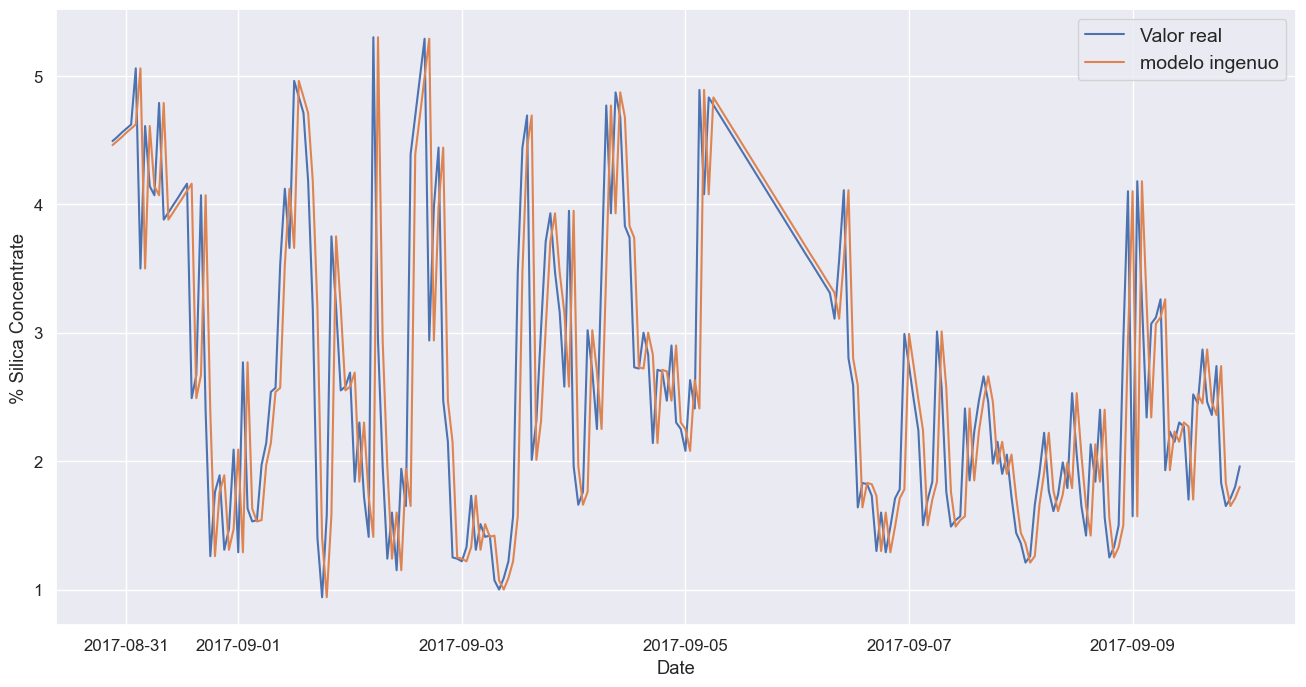

In [164]:
plt.figure(figsize=(16,8),dpi=100)
plot_time_series(y_true[1:].index, y_true[1:], label="Valor real", start=100)
plot_time_series(y_true[1:].index, y_true[:-1],label="modelo ingenuo", start=100)

## Experimento 1.

I will perform the first experiment using a tree model with gradient boosting, LIGHTGBM, without explanatory variables beyond the target variable lagged 1, 2, 3 periods, respectively.

Tree models do not require the data to be scaled.

In [64]:
df_h.shape

(3439, 92)

In [65]:
df_forecast = df_h.copy()

for col in df_forecast.columns:
    if "% Silica Conc" not in col:
        #df_forecast[f"{col} (-1h)"] = df_forecast[f"{col}"].shift(periods=1)
        df_forecast.drop(f"{col}",axis=1,inplace=True)
        


In [66]:
df_forecast

% Silica Concentrate  % Silica Concentrate (-1h)  \
date                                                                    
2017-04-19 17:00:00              1.269531                    1.330078   
2017-04-19 18:00:00              5.500000                    1.269531   
2017-04-19 19:00:00              1.639648                    5.500000   
2017-04-19 20:00:00              1.459961                    1.639648   
2017-04-19 21:00:00              1.690430                    1.459961   
...                                   ...                         ...   
2017-09-09 19:00:00              1.830078                    2.740234   
2017-09-09 20:00:00              1.650391                    1.830078   
2017-09-09 21:00:00              1.709961                    1.650391   
2017-09-09 22:00:00              1.799805                    1.709961   
2017-09-09 23:00:00              1.959961                    1.799805   

                     % Silica Concentrate (-2h)  % Silica Concentrate (-3h)  
date                                                                         
2017-04-19 17:00:00                    1.429688                    1.360352  
2017-04-19 18:00:00                    1.330078                    1.429688  
2017-04-19 19:00:00                    1.269531                    1.330078  
2017-04-19 20:00:00                    5.500000                    1.269531  
2017-04-19 21:00:00                    1.639648                    5.500000  
...                                         ...                         ...  
2017-09-09 19:00:00                    2.359375                    2.460938  
2017-09-09 20:00:00                    2.740234                    2.359375  
2017-09-09 21:00:00                    1.830078                    2.740234  
2017-09-09 22:00:00                    1.650391                    1.830078  
2017-09-09 23:00:00                    1.709961                    1.650391  

[3439 rows x 4 columns]

In [67]:
X = df_forecast.drop("% Silica Concentrate",axis=1)
y = df_forecast["% Silica Concentrate"]

In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X,y,test_split=0.1)

**inside optuna i do timesplit cross-validation**

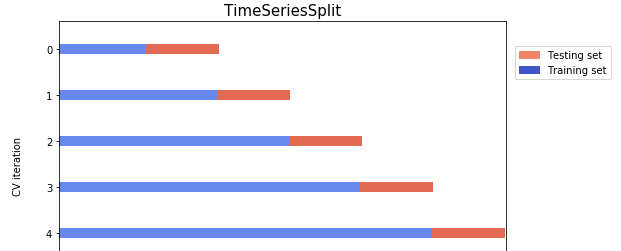

In [69]:
warnings.filterwarnings("ignore")
def objective(trial, X, y):


    
    param_grid = {
        "random_state": 123,
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ['gbdt']),#,"goss"]),
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 25, 2025,step=100), #for large datasets this should be very high
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 10, 190), # Also change this for large datasets, should be small to avoid overfitting
        "max_depth": trial.suggest_int("max_depth", 2, 80),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 800, step=20), #modify this for large datasets, causes overfittin if too low
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0001, 1000, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0001, 1000, log=True),
        #"min_split_gain": trial.suggest_float("min_split_gain", 0, 3),
        "subsample": trial.suggest_float("subsample", 0.3, 1, step=0.1),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [0,1]), #[0,1] bagging
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 1, step=0.1),
    }
    
    #min_data_in_leaf # min_child_samples
    
    # Aqui defino funcion a minimizar, usare el RMSE (Root Mean Squared Error)
    def rmse(y_val,y_pred):
        is_higher_better = False
        value = mean_squared_error(y_val,y_pred, squared=False)
        name = "l2"
        return name, value, is_higher_better
    
    cv_scores = np.empty(5)
    
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=None)
    
    for idx , (train_index, val_index) in enumerate(tscv.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        #print(y_train.shape, y_val.shape)

        model = LGBMRegressor(objective="regression", silent=True,**param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric=rmse,
            early_stopping_rounds=100,
            categorical_feature="auto",   # cat_idx, #specifiy categorial features.
            callbacks=[LightGBMPruningCallback(trial, "l2", report_interval=20)],  # Add a pruning callback
            verbose=0)

        preds =  model.predict(X_val)
        rmse = mean_squared_error(y_val,preds, squared=False)

        cv_scores[idx] = rmse

    
    return np.mean(cv_scores)

In [70]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor",sampler=TPESampler(),)
                            #pruner=optuna.pruners.PercentilePruner(50, n_startup_trials=5, n_warmup_steps=50))

#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, train_windows, train_labels)
study.optimize(func, n_trials=100)

[I 2023-02-06 00:33:02,148] A new study created in memory with name: LGBM Regressor
[I 2023-02-06 00:33:03,644] Trial 0 finished with value: 1.1153832921271636 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 2025, 'learning_rate': 0.06677737446539171, 'num_leaves': 132, 'max_depth': 37, 'min_child_samples': 750, 'reg_alpha': 12.743492395304878, 'reg_lambda': 448.51655726360303, 'subsample': 0.3, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 0 with value: 1.1153832921271636.
[I 2023-02-06 00:33:05,004] Trial 1 finished with value: 0.828291415048465 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 425, 'learning_rate': 0.04332050085525211, 'num_leaves': 100, 'max_depth': 55, 'min_child_samples': 370, 'reg_alpha': 0.0002932561593766769, 'reg_lambda': 0.1709047007574897, 'subsample': 1.0, 'subsample_freq': 1, 'colsample_bytree': 0.4}. Best is trial 1 with value: 0.828291415048465.
[I 2023-02-06 00:33:06,154] Tria

[I 2023-02-06 00:33:24,840] Trial 36 finished with value: 0.8095583641742913 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 25, 'learning_rate': 0.2175331244682522, 'num_leaves': 106, 'max_depth': 58, 'min_child_samples': 270, 'reg_alpha': 0.000109785138540181, 'reg_lambda': 0.00029432642987226704, 'subsample': 0.7, 'subsample_freq': 0, 'colsample_bytree': 0.9000000000000001}. Best is trial 27 with value: 0.8067905287541823.
[I 2023-02-06 00:33:25,458] Trial 37 finished with value: 0.7667902642993963 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 25, 'learning_rate': 0.22025781968945427, 'num_leaves': 108, 'max_depth': 59, 'min_child_samples': 170, 'reg_alpha': 0.00017677423232599556, 'reg_lambda': 0.00017978431122892127, 'subsample': 0.7, 'subsample_freq': 0, 'colsample_bytree': 0.8}. Best is trial 37 with value: 0.7667902642993963.
[I 2023-02-06 00:33:26,075] Trial 38 finished with value: 0.8210132116580464 and paramet

[I 2023-02-06 00:33:50,938] Trial 57 finished with value: 0.7383801527691307 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 425, 'learning_rate': 0.2920327627298493, 'num_leaves': 25, 'max_depth': 77, 'min_child_samples': 90, 'reg_alpha': 0.014706060103537994, 'reg_lambda': 0.011215141706680407, 'subsample': 0.3, 'subsample_freq': 0, 'colsample_bytree': 1.0}. Best is trial 57 with value: 0.7383801527691307.
[I 2023-02-06 00:33:52,167] Trial 58 finished with value: 0.7416919256179121 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 525, 'learning_rate': 0.2998873819541674, 'num_leaves': 30, 'max_depth': 77, 'min_child_samples': 110, 'reg_alpha': 0.013722425048151346, 'reg_lambda': 0.011249943890052419, 'subsample': 0.3, 'subsample_freq': 0, 'colsample_bytree': 1.0}. Best is trial 57 with value: 0.7383801527691307.
[I 2023-02-06 00:33:54,269] Trial 59 finished with value: 0.7481072956794947 and parameters: {'boosting_type': 

[I 2023-02-06 00:34:16,095] Trial 83 pruned. Trial was pruned at iteration 19.
[I 2023-02-06 00:34:16,243] Trial 84 pruned. Trial was pruned at iteration 19.
[I 2023-02-06 00:34:16,492] Trial 85 pruned. Trial was pruned at iteration 119.
[I 2023-02-06 00:34:16,707] Trial 86 pruned. Trial was pruned at iteration 19.
[I 2023-02-06 00:34:16,962] Trial 87 pruned. Trial was pruned at iteration 119.
[I 2023-02-06 00:34:18,469] Trial 88 finished with value: 0.7380266544121835 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 225, 'learning_rate': 0.25761935673126724, 'num_leaves': 24, 'max_depth': 66, 'min_child_samples': 90, 'reg_alpha': 0.008941160677643226, 'reg_lambda': 0.00038136439005222444, 'subsample': 0.4, 'subsample_freq': 0, 'colsample_bytree': 0.9000000000000001}. Best is trial 82 with value: 0.7370493309280748.
[I 2023-02-06 00:34:20,005] Trial 89 finished with value: 0.7378394969597627 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 

In [71]:
#mejores hyperparametros, sin variables explicativas mas alla de variable objetivo retrasada.
params = study.best_params
model = LGBMRegressor(objective="regression",random_state=123,**params)
model.fit(train_windows, train_labels)

LGBMRegressor(colsample_bytree=0.9000000000000001, device_type='gpu',
              learning_rate=0.26834876068005625, max_depth=73,
              min_child_samples=90, n_estimators=625, num_leaves=36,
              objective='regression', random_state=123,
              reg_alpha=0.006526939229238426, reg_lambda=0.004927352222710186,
              subsample=0.3)

In [72]:
preds = model.predict(test_windows)

"We observe with sadness that the model from experiment 1 is unable to beat the naive model (experiment 0) in several metrics. It loses in terms of MAE, MASE, and MAPE, but outperforms it in terms of RMSE and R2."

In [73]:
timeseries_report_model(test_labels, preds, tracker, model_name="Experimento 1, LightGBM",
                        seasonality=1, naive=False)

MAE:  0.6194
RMSE : 0.8355
MASE : 1.1689
R2 : 0.4991
MAPE : 0.2652


In [74]:
tracker

model_name     MAE    RMSE    MASE      R2    MAPE
0           Modelo Ingenuo  0.5299  0.8021  1.0000  0.5396  0.2216
1  Experimento 1, LightGBM  0.6194  0.8355  1.1689  0.4991  0.2652

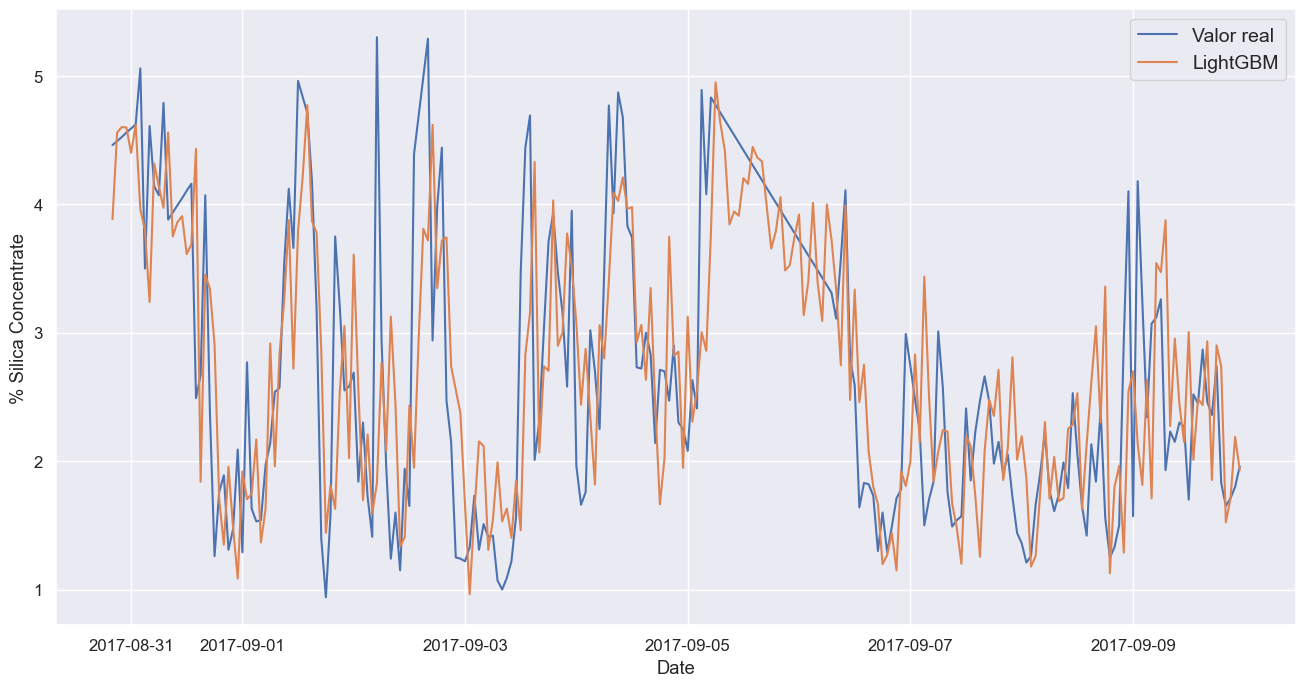

In [75]:
plt.figure(figsize=(16,8),dpi=100)
plot_time_series(test_labels.index, test_labels, label="Valor real", start=100)
plot_time_series(test_labels.index, preds,label="LightGBM", start=100)

"While it doesn't make much sense to plot the feature importances because our model performed worse than the naive model in several metrics, I will add them to complete the experiment."

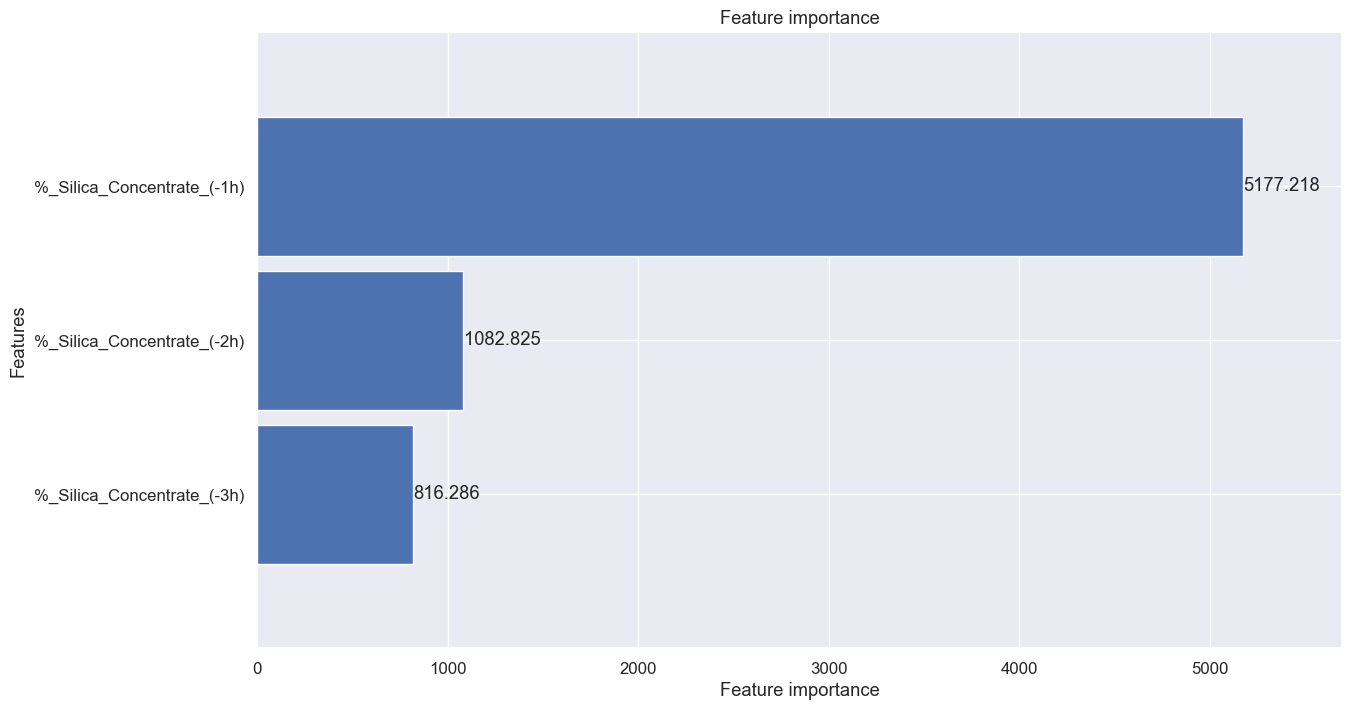

In [76]:
from lightgbm import plot_importance
#If "split", result contains numbers of times the feature is used in a model.
#plt.figure(figsize=(14,10),dpi=100)
plot_importance(model, max_num_features = 20, height=.9, importance_type="gain", figsize=(14,8)); # puedo usar tambien importance_type = "split"
                                                                                                  # pero "gain" es el mas relevante.

In [77]:
shap_values = shap.TreeExplainer(model).shap_values(test_windows)

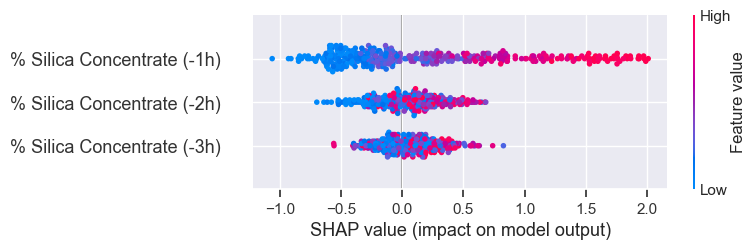

In [78]:
shap.summary_plot(shap_values, test_windows)

## Experimento 2, LSTM

I will use a neural network with a layer of "Long Short-Term Memory" (LSTM), which are known to be quite good at univariate and **multivariate** time series problems. They have the benefit of retaining information from past time steps, whose information may be relevant for predicting the current time step accurately.

An LSTM (Long Short-Term Memory) neural network is a type of recurrent neural network that is capable of processing sequential data, such as time series or natural language. It is particularly useful for tasks that involve long-term dependencies, where information from earlier time steps is still relevant to the current time step.

The key feature of an LSTM network is the use of "memory cells," which are units that can retain information for a prolonged period of time. These cells are controlled by three types of gates: the input gate, the forget gate, and the output gate. The input gate controls the flow of new information into the cell, the forget gate controls the flow of information out of the cell, and the output gate controls the flow of information out of the cell and into the rest of the network.

I'm going to scale the data, as neural networks perform better when the different variables move in similar magnitudes.

I will use MinMaxScaler.

In [79]:
df_forecast = df_h.copy()

for col in df_forecast.columns:
    if "% Silica Conc" not in col:
        df_forecast.drop(f"{col}",axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df_forecast)
df_lstm_simple = pd.DataFrame(scaler.transform(df_forecast), index= df_forecast.index, columns=df_forecast.columns)

X = df_lstm_simple.drop("% Silica Concentrate",axis=1).astype("float32")
y = df_lstm_simple["% Silica Concentrate"].astype("float32")


print(X.shape, y.shape)

(3439, 3) (3439,)


In [80]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X,y,test_split=0.1)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3095, 344, 3095, 344)

I use different callbacks during training. I am using "loss" instead of "val_loss" for the callbacks, as it can theoretically cause data leakage since the validation set I used is actually the test set.

In [81]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="loss",restore_best_weights=True,patience=20,)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("weights_checkpoints/timeseries_model_lstm/cp",
                                                      monitor="loss",save_weights_only=True,
                                                     verbose=1, save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",patience=10,verbose=1, factor=0.2)

Creating the structure of the model, compiling and training it.

In [82]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
horizon = 1 #remember this

# 1. Construct model
inputs = tf.keras.layers.Input(shape=(train_windows.shape[1],))
x = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation="relu")(x)#(inputs)
#x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
x = tf.keras.layers.Dense(16,activation="relu")(x)
output = tf.keras.layers.Dense(horizon, activation="linear")(x)

model = tf.keras.Model(inputs,output, name="model_lstm_1h_forecast")


# 2. Compile
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["mae"])

# 3. Fit the model
model.fit(x=train_windows,
            y=train_labels,
            epochs=120,
            verbose=1,
            batch_size=32,
            validation_data=(test_windows, test_labels),
            callbacks=[model_checkpoint,earlystopping, reduce_lr])

Epoch 1/120
94/97 [============================>.] - ETA: 0s - loss: 0.1775 - mae: 0.1775
Epoch 1: loss improved from inf to 0.17692, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 2s 8ms/step - loss: 0.1769 - mae: 0.1769 - val_loss: 0.1470 - val_mae: 0.1470 - lr: 5.0000e-04
Epoch 2/120
91/97 [===========================>..] - ETA: 0s - loss: 0.1099 - mae: 0.1099
Epoch 2: loss improved from 0.17692 to 0.11024, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - loss: 0.1102 - mae: 0.1102 - val_loss: 0.1066 - val_mae: 0.1066 - lr: 5.0000e-04
Epoch 3/120
88/97 [==========================>...] - ETA: 0s - loss: 0.1018 - mae: 0.1018
Epoch 3: loss improved from 0.11024 to 0.10228, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 0s 5ms/step - loss: 0.1023 - mae: 0.1023 - val_loss: 0.1058 - val_mae: 0.1058 - lr: 5.0000e-04

92/97 [===========================>..] - ETA: 0s - loss: 0.0985 - mae: 0.0985
Epoch 27: loss did not improve from 0.09844
97/97 [==============================] - 0s 4ms/step - loss: 0.0985 - mae: 0.0985 - val_loss: 0.1023 - val_mae: 0.1023 - lr: 1.0000e-04
Epoch 28/120
97/97 [==============================] - ETA: 0s - loss: 0.0985 - mae: 0.0985
Epoch 28: loss did not improve from 0.09844
97/97 [==============================] - 0s 5ms/step - loss: 0.0985 - mae: 0.0985 - val_loss: 0.1012 - val_mae: 0.1012 - lr: 1.0000e-04
Epoch 29/120
91/97 [===========================>..] - ETA: 0s - loss: 0.0990 - mae: 0.0990
Epoch 29: loss did not improve from 0.09844
97/97 [==============================] - 0s 5ms/step - loss: 0.0985 - mae: 0.0985 - val_loss: 0.1014 - val_mae: 0.1014 - lr: 1.0000e-04
Epoch 30/120
86/97 [=========================>....] - ETA: 0s - loss: 0.0987 - mae: 0.0987
Epoch 30: loss did not improve from 0.09844
97/97 [==============================] - 1s 5ms/step - loss: 0.09

Epoch 55/120
90/97 [==========================>...] - ETA: 0s - loss: 0.0983 - mae: 0.0983
Epoch 55: loss did not improve from 0.09821

Epoch 55: ReduceLROnPlateau reducing learning rate to 8.000000889296644e-07.
97/97 [==============================] - 0s 5ms/step - loss: 0.0982 - mae: 0.0982 - val_loss: 0.1023 - val_mae: 0.1023 - lr: 4.0000e-06
Epoch 56/120
94/97 [============================>.] - ETA: 0s - loss: 0.0978 - mae: 0.0978
Epoch 56: loss improved from 0.09821 to 0.09820, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - loss: 0.0982 - mae: 0.0982 - val_loss: 0.1023 - val_mae: 0.1023 - lr: 8.0000e-07
Epoch 57/120
86/97 [=========================>....] - ETA: 0s - loss: 0.0985 - mae: 0.0985
Epoch 57: loss improved from 0.09820 to 0.09820, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 0s 5ms/step - loss: 0.0982 - mae: 0.0982 - val_loss: 0.1024 - val_mae: 0

Epoch 82/120
91/97 [===========================>..] - ETA: 0s - loss: 0.0985 - mae: 0.0985
Epoch 82: loss did not improve from 0.09820
97/97 [==============================] - 0s 5ms/step - loss: 0.0982 - mae: 0.0982 - val_loss: 0.1024 - val_mae: 0.1024 - lr: 3.2000e-08
Epoch 83/120
89/97 [==========================>...] - ETA: 0s - loss: 0.0979 - mae: 0.0979
Epoch 83: loss did not improve from 0.09820
97/97 [==============================] - 0s 5ms/step - loss: 0.0982 - mae: 0.0982 - val_loss: 0.1024 - val_mae: 0.1024 - lr: 3.2000e-08
Epoch 84/120
90/97 [==========================>...] - ETA: 0s - loss: 0.0985 - mae: 0.0985
Epoch 84: loss did not improve from 0.09820
97/97 [==============================] - 0s 5ms/step - loss: 0.0982 - mae: 0.0982 - val_loss: 0.1024 - val_mae: 0.1024 - lr: 3.2000e-08
Epoch 85/120
97/97 [==============================] - ETA: 0s - loss: 0.0982 - mae: 0.0982
Epoch 85: loss did not improve from 0.09820

Epoch 85: ReduceLROnPlateau reducing learning rate 

In [83]:
model.load_weights("weights_checkpoints/timeseries_model_lstm/cp")

In [84]:
preds = pd.Series(model.predict(test_windows).reshape(-1), index=test_windows.index)

11/11 [==============================] - 0s 1ms/step


In [85]:
y_real = pd.concat((test_labels, test_windows), axis=1)
y_real = scaler.inverse_transform(y_real)

y_pred = pd.concat((preds,test_windows), axis=1)
y_pred = scaler.inverse_transform(y_pred)

test_labelss = y_real[:,0]
preds = y_pred[:,0]

We see that our recurrent neural network model (LSTM) outperforms the naive model in all metrics (although by a small margin).

In [86]:
timeseries_report_model(test_labelss,preds, tracker, model_name="Experimento 2, LSTM (pocas variables)", seasonality=1, naive=False)


MAE:  0.505
RMSE : 0.7683
MASE : 0.953
R2 : 0.5764
MAPE : 0.2006


In [87]:
tracker

model_name     MAE    RMSE    MASE      R2  \
0                         Modelo Ingenuo  0.5299  0.8021  1.0000  0.5396   
1                Experimento 1, LightGBM  0.6194  0.8355  1.1689  0.4991   
2  Experimento 2, LSTM (pocas variables)  0.5050  0.7683  0.9530  0.5764   

     MAPE  
0  0.2216  
1  0.2652  
2  0.2006

In [88]:
explainer = shap.KernelExplainer(model, shap.sample(train_windows, 100))

In [89]:
shap_values = explainer.shap_values(test_windows, nsamples=100)

  0%|          | 0/344 [00:00<?, ?it/s]

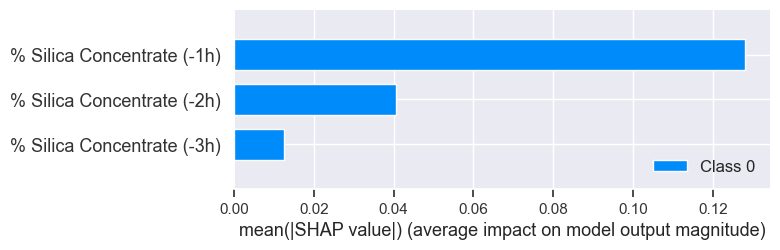

In [90]:
shap.summary_plot(shap_values, test_windows) #,feature_names=features)

According to the impact of explanatory variables shown by SHAP, we see that our model is largely learning from the previous lag, as it often replicates it in the graph. That's why a delay is observed in the graph. It's clear that the model made some minor modifications and was able to beat the naive model.

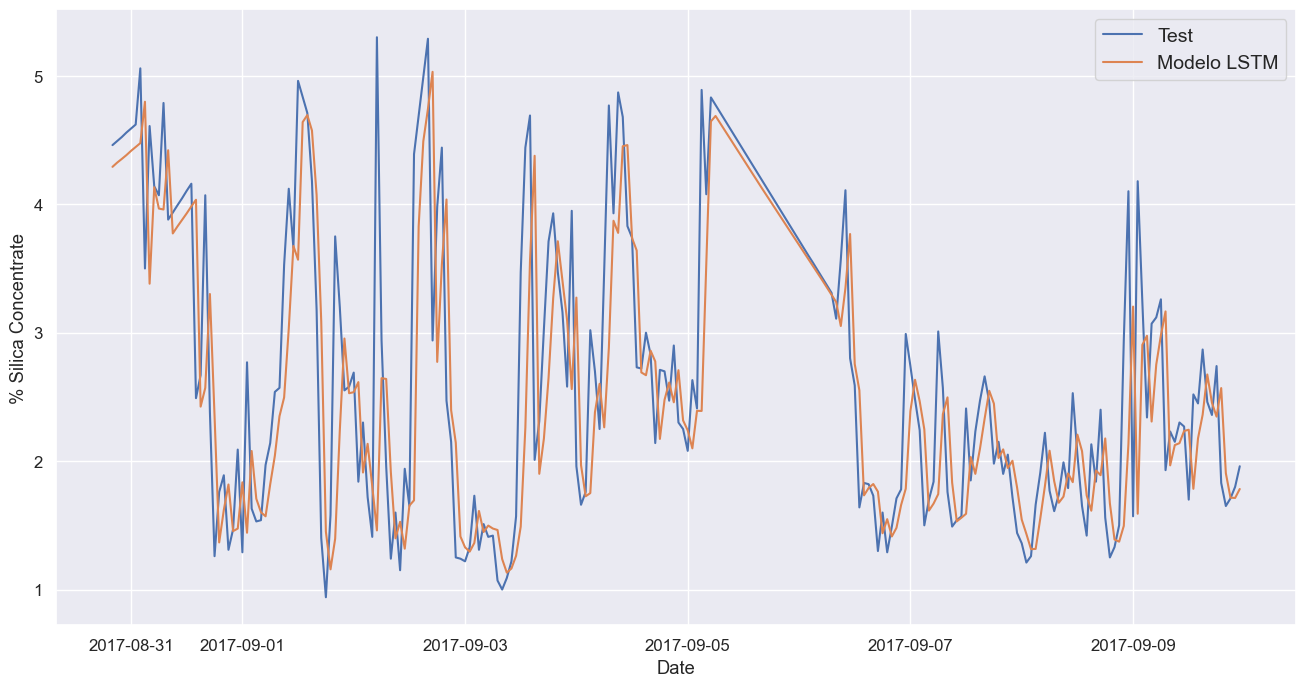

In [91]:
plt.figure(figsize=(16,8),dpi=100)
#plot_time_series(df.index[window_size:2224+window_size],y_train.reshape(-1),label="Train", start=1500)
plot_time_series(test_labels.index[-len(test_windows):],test_labelss, label="Test", start=100)
plot_time_series(test_labels.index[-len(test_windows):],preds.reshape(-1),label="Modelo LSTM", start=100)

##  Experiemento 3: Lasso multiple Linear Regression
Running lasso with all the explanatory variables (91).

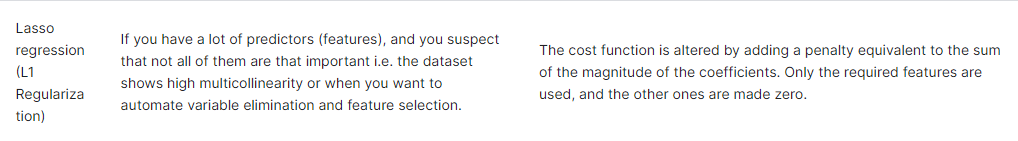

In [165]:
df_forecast = df_h

In [166]:
X = df_forecast.drop("% Silica Concentrate", axis=1)
#X = X.drop(["% Silica Concentrate (-1h)","% Silica Concentrate (-2h)", "% Silica Concentrate (-3h)"], axis=1)
y = df_forecast["% Silica Concentrate"]

In [167]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.special import inv_boxcox

We know that linear regression prefers its input variables to be normally distributed (or at least close to it), so we will use the BoxCox transformation to normalize these variables when their skewness is greater than 0.5.

The Box-Cox transformation is a method to transform non-normal dependent variables into a normal shape. This can be useful for linear models and other statistical methods that assume normality. The Box-Cox transformation can be applied using the scipy.stats.boxcox function, which returns the transformed data and the lambda value used in the transformation.

**"I deactivated the normalization. Apparently, the model performs slightly better without explanatory variable normalization, which is curious."**.

In [168]:
# # Normalizando data.
# numeric = X.select_dtypes("number").columns
# skew_features = X[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

# high_skew = skew_features[skew_features > 0.5]
# skew_index = high_skew.index


# lambd_list = []
# for i in skew_index:
#     lambd = boxcox_normmax(X[i] + 1) 
#     X[i] = boxcox1p(X[i], lambd)
#     lambd_list.append(lambd)

**i revert boxcox with this (if needed)**

In [169]:
# x = dict(zip(skew_index,lambd_list))

# for i, v in x.items():
#     X[i] = inv_boxcox(X[i], v) - 1

**Scaling the data (only explanatory variables)**

In [170]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [171]:
X_scaled.shape

(3439, 91)

In [172]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X_scaled,y,test_split=0.1)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3095, 344, 3095, 344)

In [173]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
#elastic_net = ElasticNet()

In [174]:
def objective(trial, X,y):
    params = {
            'random_state':42,
            'alpha': trial.suggest_float("alpha", 0.001, 1000, log=True),}
           # "l1_ratio": trial.suggest_float("l1_ratio", 0, 1)}    
    
    
#     cv = KFold(n_splits=10, shuffle=True, random_state=12)#, random_state=123)
#     #y = y.values
#     cv_scores = []

#     for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
#         X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
#         y_train, y_val = y[train_idx], y[test_idx]
    cv_scores = np.empty(5)
    
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=None)
    
    for idx , (train_index, val_index) in enumerate(tscv.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model = Lasso(**params) 
        #model = ElasticNet(**params)

        model.fit(X_train,y_train)

        preds =  model.predict(X_val)
        rmse =  mean_squared_error(y_val , preds, squared=False)

        cv_scores[idx] = rmse

    
    return np.mean(cv_scores)

In [175]:
study = optuna.create_study(direction='minimize', sampler=TPESampler(),
                            pruner=optuna.pruners.PercentilePruner(50, n_startup_trials=5, n_warmup_steps=2))
#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, train_windows, train_labels)
study.optimize(func, n_trials=100)

[I 2023-02-06 01:31:48,262] A new study created in memory with name: no-name-c3c9cd88-cdbb-45a5-bb1d-736bf03a20ca
[I 2023-02-06 01:31:48,291] Trial 0 finished with value: 1.115383243560791 and parameters: {'alpha': 22.995562854485627}. Best is trial 0 with value: 1.115383243560791.
[I 2023-02-06 01:31:48,317] Trial 1 finished with value: 1.115383243560791 and parameters: {'alpha': 1.4128144078966096}. Best is trial 0 with value: 1.115383243560791.
[I 2023-02-06 01:31:48,343] Trial 2 finished with value: 0.9764642357826233 and parameters: {'alpha': 0.6110710770828437}. Best is trial 2 with value: 0.9764642357826233.
[I 2023-02-06 01:31:48,369] Trial 3 finished with value: 1.115383243560791 and parameters: {'alpha': 9.339768897538512}. Best is trial 2 with value: 0.9764642357826233.
[I 2023-02-06 01:31:48,412] Trial 4 finished with value: 0.7529370665550232 and parameters: {'alpha': 0.005894755739336994}. Best is trial 4 with value: 0.7529370665550232.
[I 2023-02-06 01:31:48,451] Trial 5

[I 2023-02-06 01:31:49,930] Trial 44 finished with value: 0.7462771773338318 and parameters: {'alpha': 0.10254666040478382}. Best is trial 18 with value: 0.737919282913208.
[I 2023-02-06 01:31:49,976] Trial 45 finished with value: 0.7512306213378906 and parameters: {'alpha': 0.006641050171930713}. Best is trial 18 with value: 0.737919282913208.
[I 2023-02-06 01:31:50,003] Trial 46 finished with value: 1.115383243560791 and parameters: {'alpha': 21.190774937700155}. Best is trial 18 with value: 0.737919282913208.
[I 2023-02-06 01:31:50,036] Trial 47 finished with value: 0.7431810855865478 and parameters: {'alpha': 0.016051717103957648}. Best is trial 18 with value: 0.737919282913208.
[I 2023-02-06 01:31:50,066] Trial 48 finished with value: 0.739942193031311 and parameters: {'alpha': 0.06102032111173686}. Best is trial 18 with value: 0.737919282913208.
[I 2023-02-06 01:31:50,113] Trial 49 finished with value: 0.752151894569397 and parameters: {'alpha': 0.0062163165699985565}. Best is tr

[I 2023-02-06 01:31:51,415] Trial 88 finished with value: 0.7436434149742126 and parameters: {'alpha': 0.01532720903920792}. Best is trial 59 with value: 0.7379136919975281.
[I 2023-02-06 01:31:51,454] Trial 89 finished with value: 0.7490318655967713 and parameters: {'alpha': 0.008102945837944157}. Best is trial 59 with value: 0.7379136919975281.
[I 2023-02-06 01:31:51,481] Trial 90 finished with value: 0.7462531805038453 and parameters: {'alpha': 0.10242399915695292}. Best is trial 59 with value: 0.7379136919975281.
[I 2023-02-06 01:31:51,508] Trial 91 finished with value: 0.7379150748252868 and parameters: {'alpha': 0.03702698423134651}. Best is trial 59 with value: 0.7379136919975281.
[I 2023-02-06 01:31:51,535] Trial 92 finished with value: 0.7380139589309692 and parameters: {'alpha': 0.034630984763198855}. Best is trial 59 with value: 0.7379136919975281.
[I 2023-02-06 01:31:51,565] Trial 93 finished with value: 0.741368317604065 and parameters: {'alpha': 0.01953078925009529}. Best

In [176]:
params = study.best_params

model = Lasso(**params)
#model = ElasticNet(**params)

model.fit(train_windows, train_labels)

Lasso(alpha=0.03680718325534337)

It is possible that the features selected by Lasso as significant may not be significant in other machine learning models. Lasso only selects a subset of features, and it may not capture all the important features of the data set. Additionally, Lasso is a linear model, so it may not be able to capture non-linear relationships between the features and the target variable.

We observe that Lasso eliminated a large number of explanatory variables, from 91 down to 5. Let's remember that we scaled the explanatory variables with Standard Scaler, so all the explanatory variables move between the same magnitudes.

In [177]:
coeficients = pd.DataFrame(model.coef_.reshape(1,len(X.columns)), columns=model.feature_names_in_).transpose()
coefs = coeficients[coeficients != 0].dropna().sort_values(by=0, ascending=False)
coefs = coefs.rename(columns={0:"Valores"})
print(coefs.shape)
coefs

(5, 1)


Valores
% Silica Concentrate (-1h)           0.625229
% Silica Concentrate (-2h)           0.145222
% Silica Concentrate (-3h)           0.062978
Flotation Column 05 Level (-15mins) -0.002351
Flotation Column 01 Air Flow        -0.031177

In [178]:
coefs.index

Index(['% Silica Concentrate (-1h)', '% Silica Concentrate (-2h)',
       '% Silica Concentrate (-3h)', 'Flotation Column 05 Level (-15mins)',
       'Flotation Column 01 Air Flow'],
      dtype='object')

In [179]:
preds = model.predict(test_windows)

In [180]:
timeseries_report_model(test_labels ,preds, tracker, model_name="Experimento 3, Lasso_lin_reg", seasonality=1, naive=False)

MAE:  0.5482
RMSE : 0.7532
MASE : 1.0346
R2 : 0.5929
MAPE : 0.2243


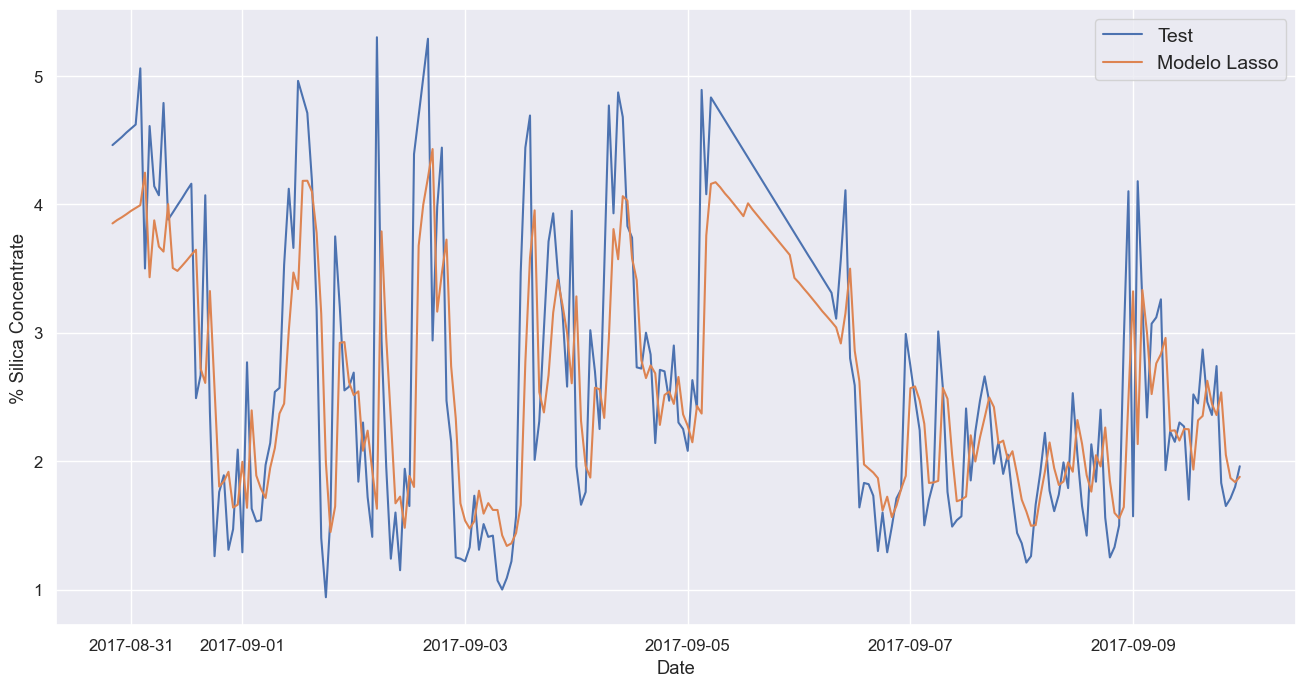

In [182]:
plt.figure(figsize=(16,8),dpi=100)
#plot_time_series(df.index[window_size:2224+window_size],y_train.reshape(-1),label="Train", start=1500)
plot_time_series(test_labels.index[-len(test_windows):],test_labels, label="Test", start=100)
plot_time_series(test_labels.index[-len(test_windows):],preds,label="Modelo Lasso", start=100)

"We observe that the assumption of homoscedasticity is not met properly (marked patterns and asymmetries are observed in different sections)"

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

0.111111805


Text(0, 0.5, 'residuos')

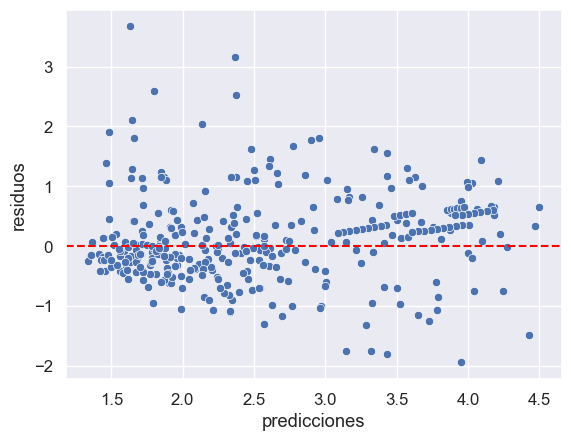

In [110]:
residuos = test_labels - preds
print(residuos.mean())  # la media de los residuos deberia ser 0.
sns.scatterplot(x=preds , y = residuos)
plt.axhline(y=0,color="red",ls="--");
plt.xlabel("predicciones")
plt.ylabel("residuos")

residuals look somewhat normally distributed

0.111111805


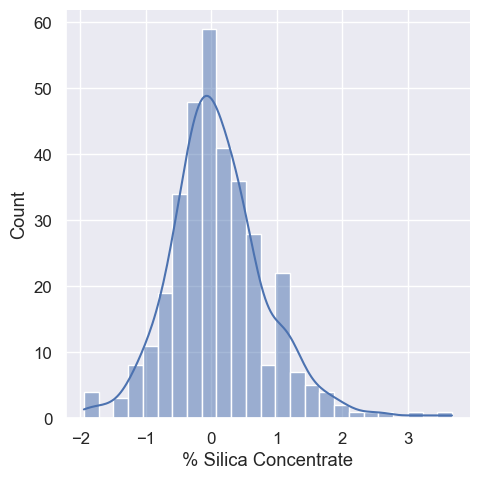

In [111]:
print(residuos.mean())
sns.displot(residuos,bins=25,kde=True);

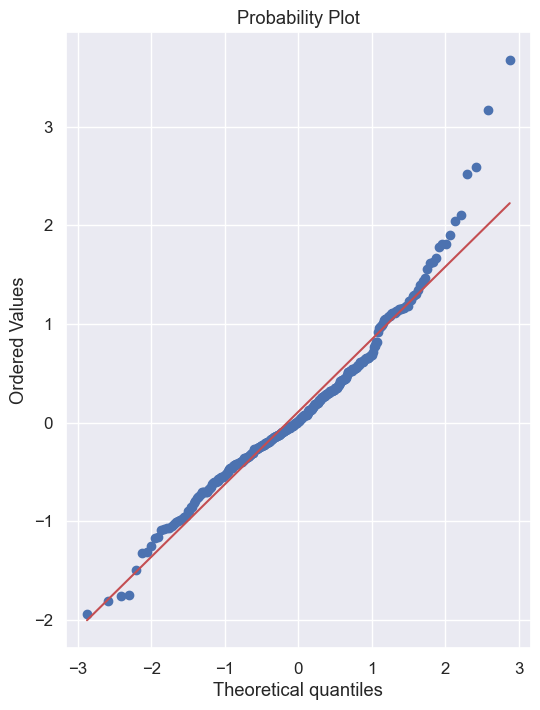

In [112]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(residuos,plot=ax)

## Experimento 4: LightGBM (ALL EXPLANATORY VARIABLES).

In [113]:
df_forecast = df_h.copy()
df_forecast.shape

(3439, 92)

In [114]:
X = df_forecast.drop("% Silica Concentrate", axis=1)
y = df_forecast["% Silica Concentrate"]

In [115]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X,y,test_split=0.1)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3095, 344, 3095, 344)

In [116]:
warnings.filterwarnings("ignore")
def objective(trial, X,y):


    
    param_grid = {
        "random_state": 123,
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ['gbdt']),#,"goss"]),
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 25, 10000,step=100), #for large datasets this should be very high
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 10, 190), # Also change this for large datasets, should be small to avoid overfitting
        "max_depth": trial.suggest_int("max_depth", 2, 80),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 800, step=20), #modify this for large datasets, causes overfittin if too low
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0001, 1000, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0001, 1000, log=True),
        #"min_split_gain": trial.suggest_float("min_split_gain", 0, 3),
        "subsample": trial.suggest_float("subsample", 0.05, 1, step=0.05),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [0,1]), #[0,1] bagging
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 1, step=0.1),
    }
    
    #min_data_in_leaf # min_child_samples
    
    # Aqui defino funcion a minimizar, usare el RMSE (Root Mean Squared Error)
    def rmse(y_val,y_pred):
        is_higher_better = False
        name = "rmse"
        value = mean_squared_error(y_val,y_pred, squared=False)
        return name, value, is_higher_better
    
    cv_scores = np.empty(5)
    
    tscv = TimeSeriesSplit(n_splits=5, max_train_size=None)
    
    for idx , (train_index, val_index) in enumerate(tscv.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        #print(y_train.shape, y_val.shape)

        model = LGBMRegressor(objective="regression", silent=True,**param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric=rmse,
            early_stopping_rounds=100,
            categorical_feature="auto",   # cat_idx, #specifiy categorial features.
            callbacks=[LightGBMPruningCallback(trial, "l2", report_interval=20)],  # Add a pruning callback
            verbose=0)

        preds =  model.predict(X_val)
        rmse = mean_squared_error(y_val,preds, squared=False)

        cv_scores[idx] = rmse

    
    return np.mean(cv_scores)

In [117]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor",sampler=TPESampler(),
                            pruner=optuna.pruners.PercentilePruner(50, n_startup_trials=5, n_warmup_steps=50))

#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, train_windows, train_labels)
study.optimize(func, n_trials=100)

[I 2023-02-06 00:35:50,321] A new study created in memory with name: LGBM Regressor
[I 2023-02-06 00:35:51,455] Trial 0 finished with value: 0.7708118265859446 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 3325, 'learning_rate': 0.2584937312542155, 'num_leaves': 28, 'max_depth': 69, 'min_child_samples': 230, 'reg_alpha': 0.002114865597840608, 'reg_lambda': 10.383159933744963, 'subsample': 1.0, 'subsample_freq': 0, 'colsample_bytree': 0.6000000000000001}. Best is trial 0 with value: 0.7708118265859446.
[I 2023-02-06 00:35:52,363] Trial 1 finished with value: 1.0052454190429647 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 3625, 'learning_rate': 0.08272382526793756, 'num_leaves': 126, 'max_depth': 23, 'min_child_samples': 550, 'reg_alpha': 56.33452788342576, 'reg_lambda': 0.012344936167187778, 'subsample': 0.6500000000000001, 'subsample_freq': 1, 'colsample_bytree': 0.9000000000000001}. Best is trial 0 with value: 0.7708

[I 2023-02-06 00:36:29,043] Trial 30 pruned. Trial was pruned at iteration 59.
[I 2023-02-06 00:36:29,485] Trial 31 pruned. Trial was pruned at iteration 119.
[I 2023-02-06 00:36:29,704] Trial 32 pruned. Trial was pruned at iteration 119.
[I 2023-02-06 00:36:29,926] Trial 33 pruned. Trial was pruned at iteration 119.
[I 2023-02-06 00:36:30,073] Trial 34 pruned. Trial was pruned at iteration 59.
[I 2023-02-06 00:36:30,222] Trial 35 pruned. Trial was pruned at iteration 59.
[I 2023-02-06 00:36:30,493] Trial 36 pruned. Trial was pruned at iteration 119.
[I 2023-02-06 00:36:30,646] Trial 37 pruned. Trial was pruned at iteration 59.
[I 2023-02-06 00:36:30,808] Trial 38 pruned. Trial was pruned at iteration 59.
[I 2023-02-06 00:36:31,301] Trial 39 pruned. Trial was pruned at iteration 119.
[I 2023-02-06 00:36:31,458] Trial 40 pruned. Trial was pruned at iteration 59.
[I 2023-02-06 00:36:32,660] Trial 41 finished with value: 0.771479991315165 and parameters: {'boosting_type': 'gbdt', 'device_

[I 2023-02-06 00:36:59,328] Trial 72 finished with value: 0.7571488750477157 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 5325, 'learning_rate': 0.29042646585732207, 'num_leaves': 182, 'max_depth': 66, 'min_child_samples': 150, 'reg_alpha': 0.45089935701560013, 'reg_lambda': 0.16377537855330318, 'subsample': 0.2, 'subsample_freq': 0, 'colsample_bytree': 0.7}. Best is trial 52 with value: 0.7536188708791995.
[I 2023-02-06 00:37:00,735] Trial 73 finished with value: 0.7540932256169819 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 5425, 'learning_rate': 0.2928108538807972, 'num_leaves': 179, 'max_depth': 65, 'min_child_samples': 170, 'reg_alpha': 0.11299290995352532, 'reg_lambda': 0.23362446730879802, 'subsample': 0.25, 'subsample_freq': 0, 'colsample_bytree': 1.0}. Best is trial 52 with value: 0.7536188708791995.
[I 2023-02-06 00:37:02,264] Trial 74 finished with value: 0.7540981352696214 and parameters: {'boosting_type

In [118]:
#mejores hyperparametros, sin variables explicativas mas alla de variable objetivo retrasada.
params = study.best_params
model = LGBMRegressor(objective="regression",random_state=123,**params)
model.fit(train_windows, train_labels)

LGBMRegressor(device_type='gpu', learning_rate=0.24689317475074082,
              max_depth=74, min_child_samples=70, n_estimators=8725,
              num_leaves=187, objective='regression', random_state=123,
              reg_alpha=0.05429291868820756, reg_lambda=0.01350489929094208,
              subsample=0.1)

Surprisingly, LightGBM performs worse when all explanatory variables are added (the worst model so far). It could be that many of these variables are not relevant when predicting the target variable. It is also possible that the dataset is in a "corrupt" state due to irregularities detected during EDA and preprocessing.

In [119]:
preds = model.predict(test_windows)
timeseries_report_model(test_labels, preds, tracker, model_name="Experimento 4, LightGBM",
                        seasonality=1, naive=False)

MAE:  0.632
RMSE : 0.8404
MASE : 1.1928
R2 : 0.4932
MAPE : 0.2775


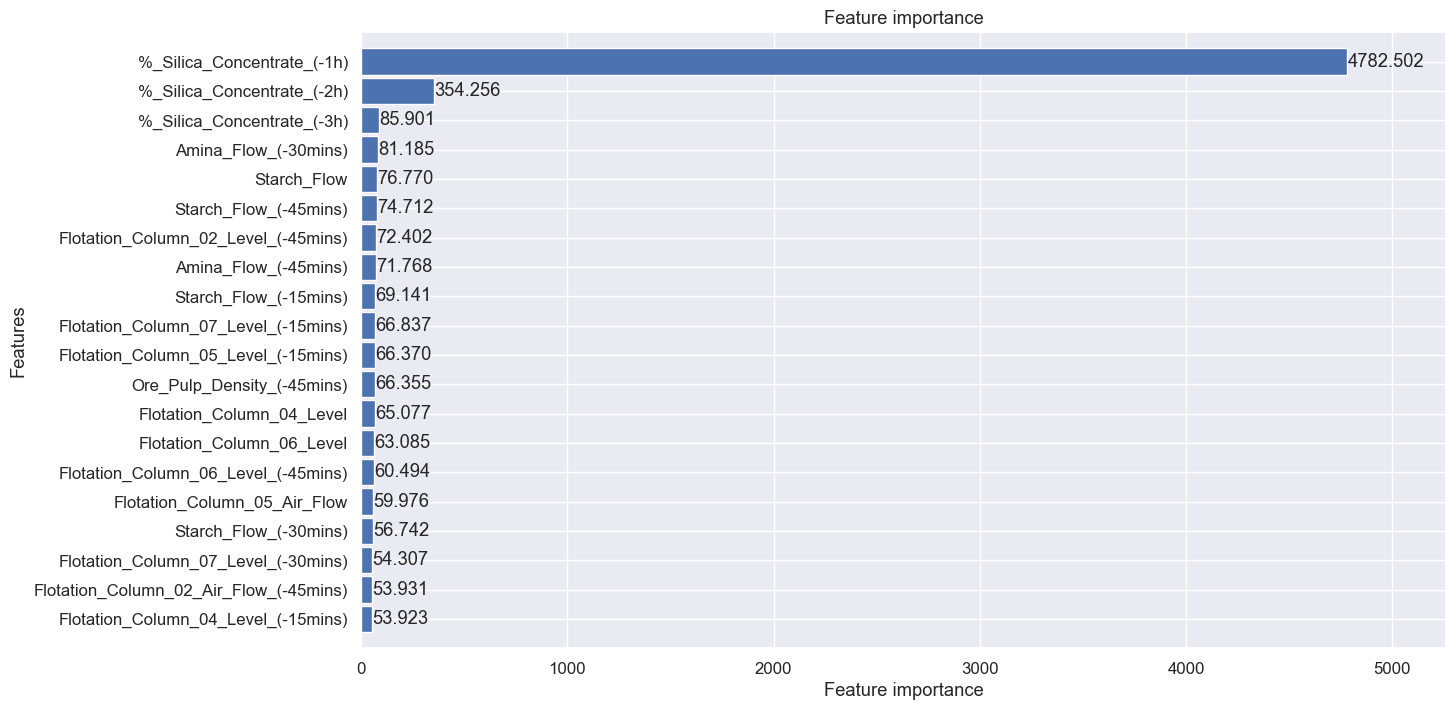

In [120]:
plot_importance(model, max_num_features = 20, height=.9, importance_type="gain", figsize=(14,8));

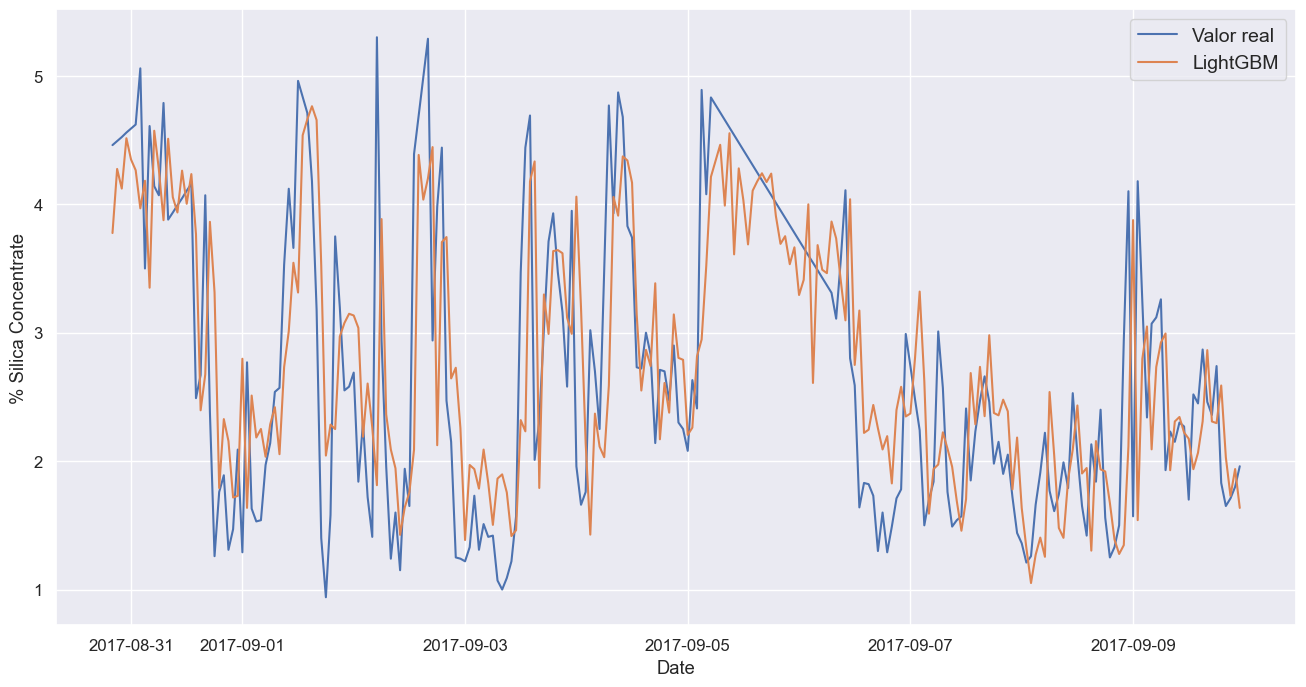

In [121]:
plt.figure(figsize=(16,8),dpi=100)
plot_time_series(test_labels.index, test_labels, label="Valor real", start=100)
plot_time_series(test_labels.index, preds,label="LightGBM", start=100)

## Experimento 5: LSTM only with variables selected with LASSO.

In [122]:
df_forecast = df_h.copy()

for col in df_forecast.columns:
    if col not in coefs.index.to_list() and col != "% Silica Concentrate":
        df_forecast.drop(f"{col}",axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df_forecast)
df_lstm_simple = pd.DataFrame(scaler.transform(df_forecast), index= df_forecast.index, columns=df_forecast.columns)

X = df_lstm_simple.drop("% Silica Concentrate",axis=1).astype("float32")
y = df_lstm_simple["% Silica Concentrate"].astype("float32")


print(X.shape, y.shape)

(3439, 5) (3439,)


In [123]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X,y,test_split=0.1)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3095, 344, 3095, 344)

In [124]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="loss",restore_best_weights=True,patience=20,)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("weights_checkpoints/timeseries_model_lstm/cp",
                                                      monitor="loss",save_weights_only=True,
                                                     verbose=1, save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",patience=10,verbose=1, factor=0.2)

In [125]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
horizon = 1 #remember this

# 1. Construct model
inputs = tf.keras.layers.Input(shape=(train_windows.shape[1],))
x = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation="relu")(x)#(inputs)
#x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
x = tf.keras.layers.Dense(16,activation="relu")(x)
output = tf.keras.layers.Dense(horizon, activation="linear")(x)

model = tf.keras.Model(inputs,output, name="model_lstm_1h_forecast")


# 2. Compile
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["mae"])

# 3. Fit the model
model.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=32,
            validation_data=(test_windows, test_labels),
            callbacks=[model_checkpoint,earlystopping, reduce_lr])

Epoch 1/500
96/97 [============================>.] - ETA: 0s - loss: 0.2090 - mae: 0.2090
Epoch 1: loss improved from inf to 0.20841, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 2s 8ms/step - loss: 0.2084 - mae: 0.2084 - val_loss: 0.1635 - val_mae: 0.1635 - lr: 5.0000e-04
Epoch 2/500
87/97 [=========================>....] - ETA: 0s - loss: 0.1164 - mae: 0.1164
Epoch 2: loss improved from 0.20841 to 0.11567, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 0s 5ms/step - loss: 0.1157 - mae: 0.1157 - val_loss: 0.1096 - val_mae: 0.1096 - lr: 5.0000e-04
Epoch 3/500
89/97 [==========================>...] - ETA: 0s - loss: 0.1034 - mae: 0.1034
Epoch 3: loss improved from 0.11567 to 0.10395, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 6ms/step - loss: 0.1040 - mae: 0.1040 - val_loss: 0.1099 - val_mae: 0.1099 - lr: 5.0000e-04

Epoch 27/500
89/97 [==========================>...] - ETA: 0s - loss: 0.0987 - mae: 0.0987
Epoch 27: loss improved from 0.09866 to 0.09863, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 6ms/step - loss: 0.0986 - mae: 0.0986 - val_loss: 0.1014 - val_mae: 0.1014 - lr: 5.0000e-04
Epoch 28/500
89/97 [==========================>...] - ETA: 0s - loss: 0.0999 - mae: 0.0999
Epoch 28: loss did not improve from 0.09863
97/97 [==============================] - 0s 5ms/step - loss: 0.0989 - mae: 0.0989 - val_loss: 0.1046 - val_mae: 0.1046 - lr: 5.0000e-04
Epoch 29/500
95/97 [============================>.] - ETA: 0s - loss: 0.0988 - mae: 0.0988
Epoch 29: loss did not improve from 0.09863
97/97 [==============================] - 0s 4ms/step - loss: 0.0987 - mae: 0.0987 - val_loss: 0.1026 - val_mae: 0.1026 - lr: 5.0000e-04
Epoch 30/500
90/97 [==========================>...] - ETA: 0s - loss: 0.0988 - mae: 0.0988
Epoch 30: loss improved from 0

93/97 [===========================>..] - ETA: 0s - loss: 0.0980 - mae: 0.0980
Epoch 55: loss did not improve from 0.09787
97/97 [==============================] - 0s 5ms/step - loss: 0.0982 - mae: 0.0982 - val_loss: 0.1024 - val_mae: 0.1024 - lr: 5.0000e-04
Epoch 56/500
92/97 [===========================>..] - ETA: 0s - loss: 0.0977 - mae: 0.0977
Epoch 56: loss improved from 0.09787 to 0.09783, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - loss: 0.0978 - mae: 0.0978 - val_loss: 0.1052 - val_mae: 0.1052 - lr: 5.0000e-04
Epoch 57/500
96/97 [============================>.] - ETA: 0s - loss: 0.0980 - mae: 0.0980
Epoch 57: loss did not improve from 0.09783
97/97 [==============================] - 0s 4ms/step - loss: 0.0980 - mae: 0.0980 - val_loss: 0.1029 - val_mae: 0.1029 - lr: 5.0000e-04
Epoch 58/500
92/97 [===========================>..] - ETA: 0s - loss: 0.0985 - mae: 0.0985
Epoch 58: loss did not improve from 0.09783

Epoch 83/500
91/97 [===========================>..] - ETA: 0s - loss: 0.0968 - mae: 0.0968
Epoch 83: loss did not improve from 0.09678

Epoch 83: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.
97/97 [==============================] - 0s 5ms/step - loss: 0.0968 - mae: 0.0968 - val_loss: 0.1023 - val_mae: 0.1023 - lr: 1.0000e-04
Epoch 84/500
96/97 [============================>.] - ETA: 0s - loss: 0.0966 - mae: 0.0966
Epoch 84: loss improved from 0.09678 to 0.09663, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 6ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1023 - val_mae: 0.1023 - lr: 2.0000e-05
Epoch 85/500
97/97 [==============================] - ETA: 0s - loss: 0.0967 - mae: 0.0967
Epoch 85: loss did not improve from 0.09663
97/97 [==============================] - 0s 5ms/step - loss: 0.0967 - mae: 0.0967 - val_loss: 0.1024 - val_mae: 0.1024 - lr: 2.0000e-05
Epoch 86/500
97/97 [======================

Epoch 109/500
89/97 [==========================>...] - ETA: 0s - loss: 0.0964 - mae: 0.0964
Epoch 109: loss did not improve from 0.09656
97/97 [==============================] - 1s 5ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1023 - val_mae: 0.1023 - lr: 8.0000e-07
Epoch 110/500
87/97 [=========================>....] - ETA: 0s - loss: 0.0966 - mae: 0.0966
Epoch 110: loss improved from 0.09656 to 0.09656, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 0s 5ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1022 - val_mae: 0.1022 - lr: 8.0000e-07
Epoch 111/500
89/97 [==========================>...] - ETA: 0s - loss: 0.0965 - mae: 0.0965
Epoch 111: loss did not improve from 0.09656
97/97 [==============================] - 1s 5ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1022 - val_mae: 0.1022 - lr: 8.0000e-07
Epoch 112/500
93/97 [===========================>..] - ETA: 0s - loss: 0.0971 - mae: 0.0971
Epoch 112: loss did not

Epoch 136/500
88/97 [==========================>...] - ETA: 0s - loss: 0.0963 - mae: 0.0963
Epoch 136: loss improved from 0.09655 to 0.09655, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 0s 5ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1022 - val_mae: 0.1022 - lr: 6.4000e-09
Epoch 137/500
97/97 [==============================] - ETA: 0s - loss: 0.0966 - mae: 0.0966
Epoch 137: loss did not improve from 0.09655
97/97 [==============================] - 1s 6ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1022 - val_mae: 0.1022 - lr: 6.4000e-09
Epoch 138/500
95/97 [============================>.] - ETA: 0s - loss: 0.0954 - mae: 0.0954
Epoch 138: loss did not improve from 0.09655
97/97 [==============================] - 1s 5ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1022 - val_mae: 0.1022 - lr: 6.4000e-09
Epoch 139/500
87/97 [=========================>....] - ETA: 0s - loss: 0.0966 - mae: 0.0966
Epoch 139: loss did not

Epoch 165/500
88/97 [==========================>...] - ETA: 0s - loss: 0.0966 - mae: 0.0966
Epoch 165: loss did not improve from 0.09655
97/97 [==============================] - 0s 5ms/step - loss: 0.0966 - mae: 0.0966 - val_loss: 0.1022 - val_mae: 0.1022 - lr: 5.1200e-11


In [126]:
model.load_weights("weights_checkpoints/timeseries_model_lstm/cp")

In [127]:
preds = pd.Series(model.predict(test_windows).reshape(-1), index=test_windows.index)
y_real = pd.concat((test_labels, test_windows), axis=1)
y_real = scaler.inverse_transform(y_real)

y_pred = pd.concat((preds,test_windows), axis=1)
y_pred = scaler.inverse_transform(y_pred)

test_labelss = y_real[:,0]
preds = y_pred[:,0]

11/11 [==============================] - 0s 1ms/step


In [128]:
timeseries_report_model(test_labelss,preds, tracker, model_name="Experimento 5, LSTM", 
                        seasonality=1, naive=False)


MAE:  0.5041
RMSE : 0.7732
MASE : 0.9514
R2 : 0.571
MAPE : 0.1988


  0%|          | 0/344 [00:00<?, ?it/s]

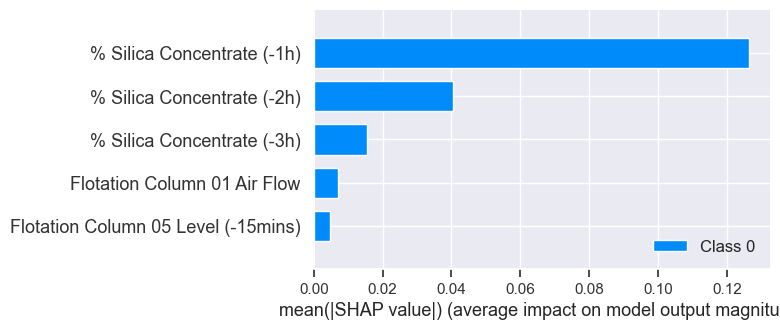

In [129]:
explainer = shap.KernelExplainer(model, shap.sample(train_windows, 100))

shap_values = explainer.shap_values(test_windows, nsamples=100)

shap.summary_plot(shap_values, test_windows) #,feature_names=features)

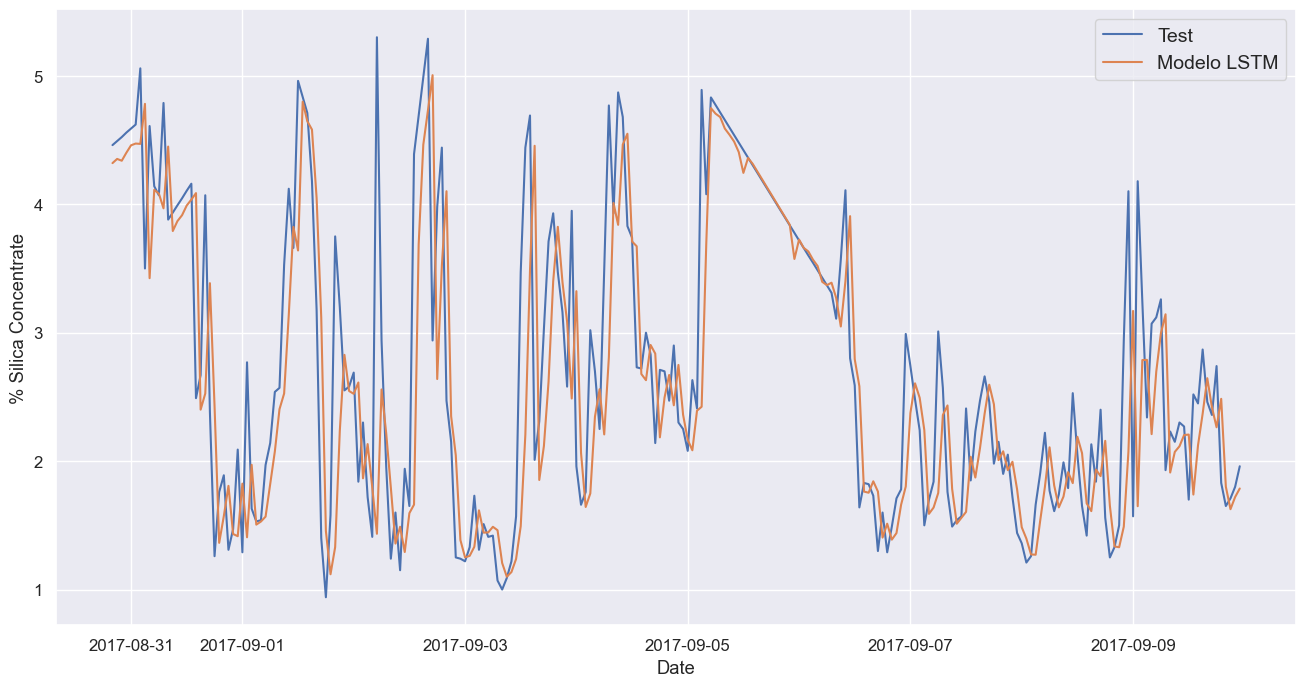

In [130]:
plt.figure(figsize=(16,8),dpi=100)
#plot_time_series(df.index[window_size:2224+window_size],y_train.reshape(-1),label="Train", start=1500)
plot_time_series(test_labels.index[-len(test_windows):],test_labelss, label="Test", start=100)
plot_time_series(test_labels.index[-len(test_windows):],preds.reshape(-1),label="Modelo LSTM", start=100)

## Experimento 6 LSTM (all explanatory variables).

"All explanatory variables in the dataset were included, including those related to hour and day of the week used in feature engineering."

In [192]:
df_forecast = df_h.copy()

scaler = MinMaxScaler()
scaler.fit(df_forecast)
df_lstm_simple = pd.DataFrame(scaler.transform(df_forecast), index= df_forecast.index, columns=df_forecast.columns)

X = df_lstm_simple.drop("% Silica Concentrate",axis=1).astype("float32")
y = df_lstm_simple["% Silica Concentrate"].astype("float32")


print(X.shape, y.shape)

(3439, 91) (3439,)


In [193]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X,y,test_split=0.1)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3095, 344, 3095, 344)

In [194]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="loss",restore_best_weights=True,patience=20,)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("weights_checkpoints/timeseries_model_lstm/cp",
                                                      monitor="loss",save_weights_only=True,
                                                     verbose=1, save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",patience=10,verbose=1, factor=0.2)

In [195]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)
horizon = 1 #remember this

# 1. Construct model
inputs = tf.keras.layers.Input(shape=(train_windows.shape[1],))
x = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation="relu")(x)#(inputs)
#x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
x = tf.keras.layers.Dense(16,activation="relu")(x)
output = tf.keras.layers.Dense(horizon, activation="linear")(x)

model = tf.keras.Model(inputs,output, name="model_lstm_1h_forecast")


# 2. Compile
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["mae"])

# 3. Fit the model
model.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=32,
            validation_data=(test_windows, test_labels),
            callbacks=[model_checkpoint,earlystopping, reduce_lr])

Epoch 1/100
88/97 [==========================>...] - ETA: 0s - loss: 0.2100 - mae: 0.2100
Epoch 1: loss improved from inf to 0.20791, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 2s 9ms/step - loss: 0.2079 - mae: 0.2079 - val_loss: 0.2158 - val_mae: 0.2158 - lr: 1.0000e-04
Epoch 2/100
90/97 [==========================>...] - ETA: 0s - loss: 0.1665 - mae: 0.1665
Epoch 2: loss improved from 0.20791 to 0.16756, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - loss: 0.1676 - mae: 0.1676 - val_loss: 0.1978 - val_mae: 0.1978 - lr: 1.0000e-04
Epoch 3/100
91/97 [===========================>..] - ETA: 0s - loss: 0.1549 - mae: 0.1549
Epoch 3: loss improved from 0.16756 to 0.15505, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - loss: 0.1551 - mae: 0.1551 - val_loss: 0.1859 - val_mae: 0.1859 - lr: 1.0000e-04

97/97 [==============================] - 1s 5ms/step - loss: 0.0997 - mae: 0.0997 - val_loss: 0.1170 - val_mae: 0.1170 - lr: 1.0000e-04
Epoch 27/100
92/97 [===========================>..] - ETA: 0s - loss: 0.1004 - mae: 0.1004
Epoch 27: loss did not improve from 0.09972
97/97 [==============================] - 0s 5ms/step - loss: 0.0999 - mae: 0.0999 - val_loss: 0.1103 - val_mae: 0.1103 - lr: 1.0000e-04
Epoch 28/100
94/97 [============================>.] - ETA: 0s - loss: 0.0997 - mae: 0.0997
Epoch 28: loss improved from 0.09972 to 0.09918, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 6ms/step - loss: 0.0992 - mae: 0.0992 - val_loss: 0.1119 - val_mae: 0.1119 - lr: 1.0000e-04
Epoch 29/100
92/97 [===========================>..] - ETA: 0s - loss: 0.0986 - mae: 0.0986
Epoch 29: loss improved from 0.09918 to 0.09854, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - 

97/97 [==============================] - 1s 6ms/step - loss: 0.0926 - mae: 0.0926 - val_loss: 0.1138 - val_mae: 0.1138 - lr: 1.0000e-04
Epoch 82/100
91/97 [===========================>..] - ETA: 0s - loss: 0.0933 - mae: 0.0933
Epoch 82: loss did not improve from 0.09264
97/97 [==============================] - 0s 5ms/step - loss: 0.0933 - mae: 0.0933 - val_loss: 0.1127 - val_mae: 0.1127 - lr: 1.0000e-04
Epoch 83/100
97/97 [==============================] - ETA: 0s - loss: 0.0923 - mae: 0.0923
Epoch 83: loss improved from 0.09264 to 0.09230, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - loss: 0.0923 - mae: 0.0923 - val_loss: 0.1126 - val_mae: 0.1126 - lr: 1.0000e-04
Epoch 84/100
89/97 [==========================>...] - ETA: 0s - loss: 0.0926 - mae: 0.0926
Epoch 84: loss improved from 0.09230 to 0.09225, saving model to weights_checkpoints/timeseries_model_lstm\cp
97/97 [==============================] - 1s 5ms/step - 

In [196]:
model.load_weights("weights_checkpoints/timeseries_model_lstm/cp")

In [197]:
preds = pd.Series(model.predict(test_windows).reshape(-1), index=test_windows.index)
y_real = pd.concat((test_labels, test_windows), axis=1)
y_real = scaler.inverse_transform(y_real)

y_pred = pd.concat((preds,test_windows), axis=1)
y_pred = scaler.inverse_transform(y_pred)

test_labelss = y_real[:,0]
preds = y_pred[:,0]

11/11 [==============================] - 0s 2ms/step


In [202]:
timeseries_report_model(test_labelss,preds, tracker, model_name="Experimento 6, LSTM", 
                        seasonality=1, naive=False)


MAE:  0.5776
RMSE : 0.79
MASE : 1.0901
R2 : 0.5522
MAPE : 0.2547


  0%|          | 0/344 [00:00<?, ?it/s]

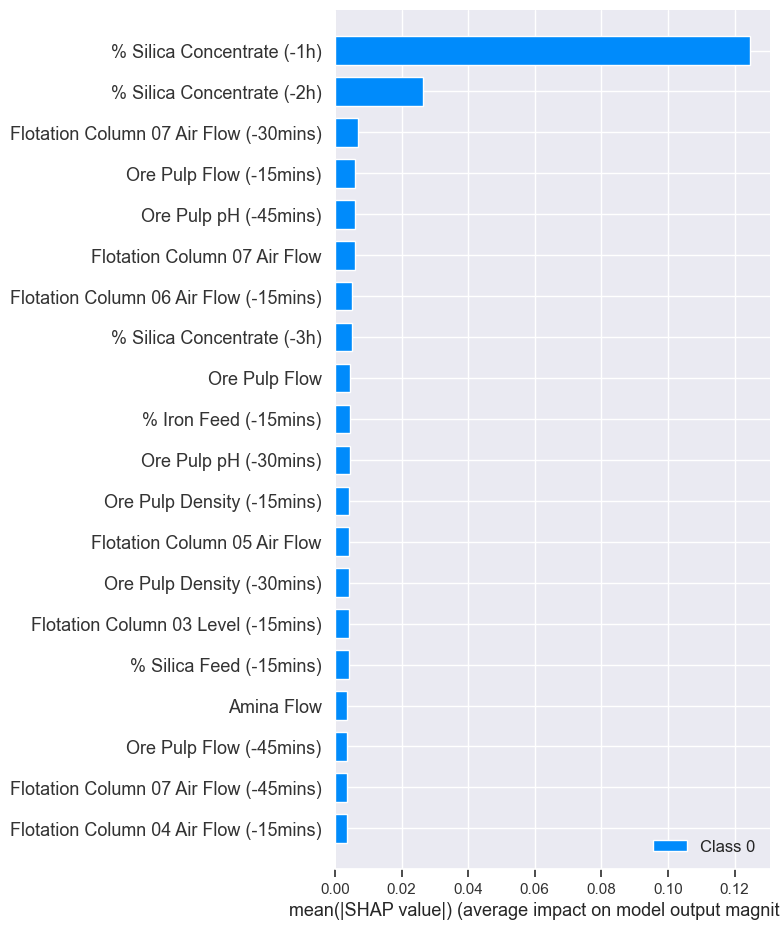

In [199]:
explainer = shap.KernelExplainer(model, shap.sample(train_windows, 100))

shap_values = explainer.shap_values(test_windows, nsamples=100)

shap.summary_plot(shap_values, test_windows) #,feature_names=features)

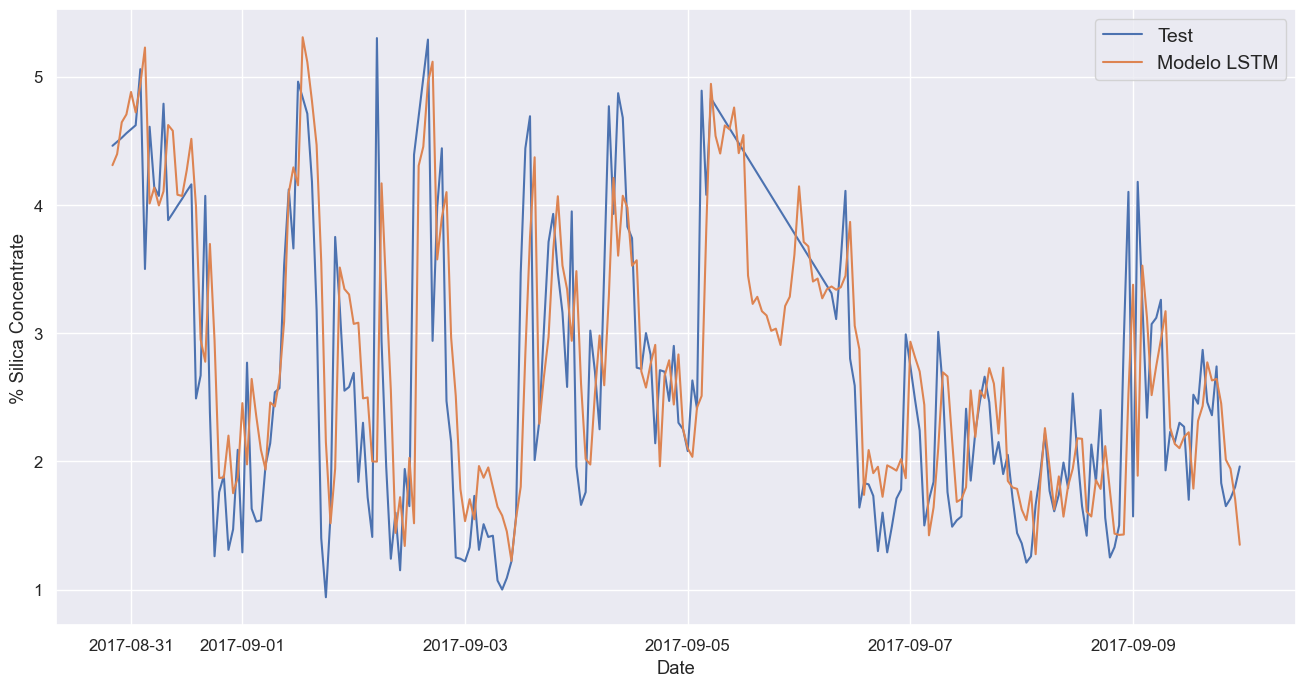

In [200]:
plt.figure(figsize=(16,8),dpi=100)
#plot_time_series(df.index[window_size:2224+window_size],y_train.reshape(-1),label="Train", start=1500)
plot_time_series(test_labels.index[-len(test_windows):],test_labelss, label="Test", start=100)
plot_time_series(test_labels.index[-len(test_windows):],preds.reshape(-1),label="Modelo LSTM", start=100)

In [205]:
tracker

model_name     MAE    RMSE    MASE      R2  \
0                         Modelo Ingenuo  0.5299  0.8021  1.0000  0.5396   
1                Experimento 1, LightGBM  0.6194  0.8355  1.1689  0.4991   
2  Experimento 2, LSTM (pocas variables)  0.5050  0.7683  0.9530  0.5764   
3           Experimento 3, Lasso_lin_reg  0.5482  0.7532  1.0346  0.5929   
4                Experimento 4, LightGBM  0.6320  0.8404  1.1928  0.4932   
5                    Experimento 5, LSTM  0.5041  0.7732  0.9514  0.5710   
6                    Experimento 6, LSTM  0.5776  0.7900  1.0901  0.5522   

     MAPE  
0  0.2216  
1  0.2652  
2  0.2006  
3  0.2243  
4  0.2775  
5  0.1988  
6  0.2547

**We observe that the only experiments that outperform the naive model in practically all metrics are the recurrent neural networks with LSTM layer (experiments 2 and 5), including MASE. The Lasso regression (experiment 3) had the best RMSE and R2, although it loses in the other metrics compared to experiments 2, 5, and the naive model. It is observed that the experiments give little importance to almost ALL explanatory variables and only focus on the lagged target variable as the most relevant explanatory variable, as evidenced in the different interpretability graphics. In fact, the models that do not include or discard the rest of the variables such as experiments 2, 3, or 5, are the ones that have performed the best. They probably suppress noise.
This confirms to me that the dataset is corrupted and useful information cannot be obtained from the explanatory variables to predict the target variable.
We believe (based on the evidence presented in the preprocessing) that the target variable itself is the main source of corruption and the failure of explanatory variables to provide predictive value to the different models to predict it.**

It's a bit disappointing that this is the conclusion of this work, but in my opinion, it is the correct conclusion. The dataset is corrupt and no analysis can be performed on it to answer the different questions of value. It's curious that nobody in Kaggle realized this, even though it's a very little-known/used dataset, nobody thought of using a naive model to compare the more complex models they developed. Most of them didn't even consider the temporal factor to perform their analysis, and almost nobody detected the different problems found in the preprocessing stage of this work. The same person who posted the dataset innocently and mistakenly commented that an MAE of 1.0 +- 0.2 would be a satisfactory result, but as we have shown, a simple naive model is capable of beating that by far. The only ones who have come to a more or less similar (although different) conclusion to mine about the low quality of this dataset are the people who made the following article. https://techlabs-aachen.medium.com/quality-prediction-in-a-mining-process-1a2b70b51303

In [140]:
# import pacmap

# scaler = StandardScaler()
# z = df_h.copy()
# z = z.drop("% Silica Concentrate",axis=1)
# z = pd.DataFrame(scaler.fit_transform(z), columns=z.columns, index=z.index)

# pacmap_embedding = pacmap.PaCMAP(n_components=2, n_neighbors=200, MN_ratio=1, FP_ratio=3, lr=1) 
# results = pacmap_embedding.fit_transform(z.values, init="pca")

# results = pd.DataFrame(results, columns=["pacmap1","pacmap2"], index=df_h.index)
# dbscan = DBSCAN(eps=4, min_samples=5)
# dbscan.fit(z)

# results["dbscan_labels"] = dbscan.labels_
# results["dbscan_labels"] = results["dbscan_labels"].apply(lambda x: "Outlier" if x < 0 else "No Outlier")
# results["% Silica Concentrate"] = df_h["% Silica Concentrate"]   


# plt.figure(figsize=(10,6),dpi=100)
# sns.scatterplot(x=results["pacmap1"], y=results["pacmap2"], hue=results["dbscan_labels"]);

# plt.figure(figsize=(10,6),dpi=100)
# sns.scatterplot(x=results["pacmap1"], y=results["pacmap2"], hue=results["% Silica Concentrate"], palette="viridis_r");

# dbscan = DBSCAN(eps=1)
# dbscan.fit(results[["pacmap1","pacmap2"]])

# plt.figure(figsize=(10,6),dpi=100)
# sns.scatterplot(x=results["pacmap1"], y=results["pacmap2"], hue=dbscan.labels_, palette="Set2");

# plt.figure(figsize=(15,7),dpi=100)

# sns.scatterplot(x=df_h.index, y=df_h["% Silica Concentrate"], hue=dbscan.labels_, palette="Set2");

In [141]:
# from pytorch_lightning.callbacks.early_stopping import EarlyStopping
# from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint

# earlystop = EarlyStopping(
#             monitor="val_loss",
#             patience=30,
#             min_delta=0.05,
#             mode='min',
#             verbose=True)

# checkpoint_callback = ModelCheckpoint(save_top_k=1, save_weights_only=True,
#                                      monitor='val_loss',
#                                      dirpath='darts_logs',
#                                      filename='nbeats/model_1',
#                                      verbose=True)

# N_EPOCHS = 200
# N_NEURONS = 256
# N_LAYERS = 4 
# N_STACKS = 10
# HORIZON = 1
# WINDOW_SIZE = 3

# model_nbeats = NBEATSModel(
#     input_chunk_length= WINDOW_SIZE,
#     output_chunk_length= HORIZON,
#     generic_architecture=True,
#     num_stacks= N_STACKS,
#     num_blocks= 4,
#     num_layers= N_LAYERS,
#     layer_widths= N_NEURONS,
#     n_epochs= 500,
#     batch_size=1024,
#     model_name="nbeats_run",
#     loss_fn=torch.nn.L1Loss(),
#     force_reset=False,
#     optimizer_cls = torch.optim.Adam,
#     optimizer_kwargs = {'lr': 1e-3},
#     lr_scheduler_kwargs= {"optimizer": torch.optim.Adam, "factor": 0.2, "verbose": True, "patience":30},
#     lr_scheduler_cls = torch.optim.lr_scheduler.ReduceLROnPlateau,
#     pl_trainer_kwargs = {"accelerator": "gpu", "devices": -1, "auto_select_gpus": True, "callbacks":[checkpoint_callback, earlystop],
#                          "enable_checkpointing":True, "enable_progress_bar":False}
#     #save_checkpoints=True
# )

# model_nbeats.fit(series=train,val_series=val, past_covariates=cov1_train, val_past_covariates=cov1_val)

# checkpoint = model_nbeats.load("darts_logs/nbeats/model_1.ckpt")
# checkpoint.keys()

# model_nbeats.model.load_state_dict(checkpoint['state_dict'])

# import logging
# logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)



# x = model_nbeats.predict(1, series=train, past_covariates=cov1_train, verbose=False)

# for n in range(1,len(val)):

#         pred = model_nbeats.predict(1, series=train.append(val[:n]), past_covariates=cov1_train.append(cov1_val[:n]), verbose=False)
        
#         x = x.append(pred)

# from darts.metrics import mae
# mae(val,x)

# plt.figure(figsize=(10,6),dpi=100)
# x[400:].plot(label="preds")
# val[400:].plot()

In [142]:
# from darts import TimeSeries
# #from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
# from darts.models import LightGBMModel#, NHiTSModel, NBEATSModel, NaiveSeasonal
# #from darts.metrics import mape, smape, rmse, rmsle, mae
# #from darts.dataprocessing import Pipeline
# #from darts.dataprocessing.transformers import Scaler, StaticCovariatesTransformer, MissingValuesFiller, InvertibleMapper
# #from darts.utils.timeseries_generation import datetime_attribute_timeseries
# #from darts.utils.statistics import check_seasonality#, plot_acf, plot_residuals_analysis, plot_hist
# #from darts.utils.likelihood_models import QuantileRegression
# #from darts.utils.missing_values import fill_missing_values
# #from darts.models import MovingAverage
# #import torch

# scaler = MinMaxScaler()
# scaler.fit(df_no_gap)
# df_transformed = scaler.transform(df_no_gap)
# df_transformed = pd.DataFrame(df_transformed, index=df_no_gap.index, columns=df_no_gap.columns)

# y = df_transformed["% Silica Concentrate"]
# y_darts = TimeSeries.from_series(y)

# X = df_transformed.drop(["% Silica Concentrate"], axis=1)
# X_darts = TimeSeries.from_dataframe(X)

# train, val = y_darts.split_before(0.8)
# cov1_train , cov1_val = X_darts.split_before(0.8)

# train, val = y_darts.split_before(0.8)
# cov1_train , cov1_val = X_darts.split_before(0.8)

# future_covariates = df_transformed[['sin_hora', 'cos_hora', 'sin_dia_de_la_semana','cos_dia_de_la_semana']]
# future_covariates = TimeSeries.from_dataframe(future_covariates)

# LGBM_Model = LightGBMModel(lags = 1,
#                            lags_future_covariates = [0],
#                            lags_past_covariates = [-1],
#                            output_chunk_length=1, #horizon
#                            random_state=2022,
#                            #max_bin= [63],
#                            gpu_use_dp= "false")

# LGBM_Model.fit(series=[train] ,
#                past_covariates=[cov1_train],
#                future_covariates=[future_covariates])

# forecast_horizon = 1

# x = LGBM_Model.predict(forecast_horizon, series=train, past_covariates=cov1_train, future_covariates=future_covariates)
# x = x[0]
# for n in range(1,len(val), forecast_horizon):  #use this for horizon = 1
# #for n in range(forecast_horizon, len(val), forecast_horizon):
#     pred = LGBM_Model.predict(forecast_horizon, series=train.append(val[:n]), past_covariates=cov1_train.append(cov1_val[:n]),
#                               future_covariates=future_covariates)
    
#     x = x.append(pred)

# y_real = np.concatenate((val.values(),cov1_val.values()), axis=1)
# y_real = scaler.inverse_transform(y_real)

# y_pred = np.concatenate((x.values(),cov1_val.values()), axis=1)
# y_pred = scaler.inverse_transform(y_pred)

# y_real = y_real[:,0]
# y_pred = y_pred[:,0]

# def mean_absolute_scaled_error(y_true, y_pred, seasonality=1): # Non seasonal version
#     """
#     Implement MASE (assuming no seasonality of data).
#     """
#     y_true = np.array(y_true)
#     #y_pred = np.array(y_pred)
    
#     mae = np.mean(np.abs(y_true-y_pred))

#     # Find MAE of naive forecast (no seasonality)
#     mae_naive_no_season = np.mean(np.abs(y_true[seasonality:] - y_true[:-seasonality])) # our seasonality is 1 day (hence the shift of 1)

#     return mae / mae_naive_no_season

# def time_series_report(y_real,y_pred):
#     print(f"MAE: {mean_absolute_error(y_real, y_pred)}")
#     print(f"RMSE: {mean_squared_error(y_real, y_pred, squared=False)}")
#     print(f"MASE {mean_absolute_scaled_error(y_real,y_pred, seasonality=1)}")
#     print(f"R2 score: {r2_score(y_real,y_pred)}")

# time_series_report(y_real,y_pred)

# val_date = pd.date_range(start=val.start_time(), freq="H", periods=len(val))

# plt.figure(figsize=(14,7),dpi=125)
# zoom = 200

# sns.lineplot(x = val_date[-zoom:], y=y_real[-zoom:], lw=2, label="Data real", color="red");
# sns.lineplot(x = val_date[-zoom:], y=y_pred[-zoom:], lw=1.5 ,label="LGBM model", color="blue");
# #sns.lineplot(x = val_date[1:][-zoom:], y= y_real[:-1][-zoom:], label="Modelo Ingenuo", lw=0.5, color="green");